# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [3]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,  StackingClassifier)
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, make_scorer, classification_report)

warnings.filterwarnings("ignore")

In [6]:
raw_df = pd.read_csv('EasyVisa.csv')

In [7]:
raw_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
raw_df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Data Overview

- Observations
- Sanity checks

In [10]:
raw_df.shape

(25480, 12)

The raw dataset as imported has 12 columns and 25,480 rows.

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The raw dataset has two features that are inbtegers, and one that is a float. The remaining 9 are objects. We will drop case_id since it add no value to the models. 

In [14]:
raw_df.drop('case_id', axis=1, inplace=True)

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [16]:
raw_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.04,22877.93,-26.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.0,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.0,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27


A couple of items of concern here. First, the minimum number of employees at one company was negative 26. Is it a going concern with negative employees, and not certain how that would work in any case. I will need to check on this one a bit more. Under prevailing wage, I am assuming this is US dollars, since it is comparing by implication to the US job market, and that it is an hourly wage. In which case 2.14 seems like it might be an error. This would be the minimum wage in about 1975. Is this data point correct? It looks other observations in this feature are annual slaries.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Functions

In [20]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
def make_confusion_matrix(model,y_actual,labels=['Certified', 'Denied']):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Units of Wage

In [23]:
unit_of_wage_unique_values = raw_df['unit_of_wage'].value_counts()
print(unit_of_wage_unique_values)

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64


With the different units of wage we will need to get them to common units. Additionally, we must assume that all non-hourly paid employees are salaried. Non-hourly = exempt and hourly = non-exempt.

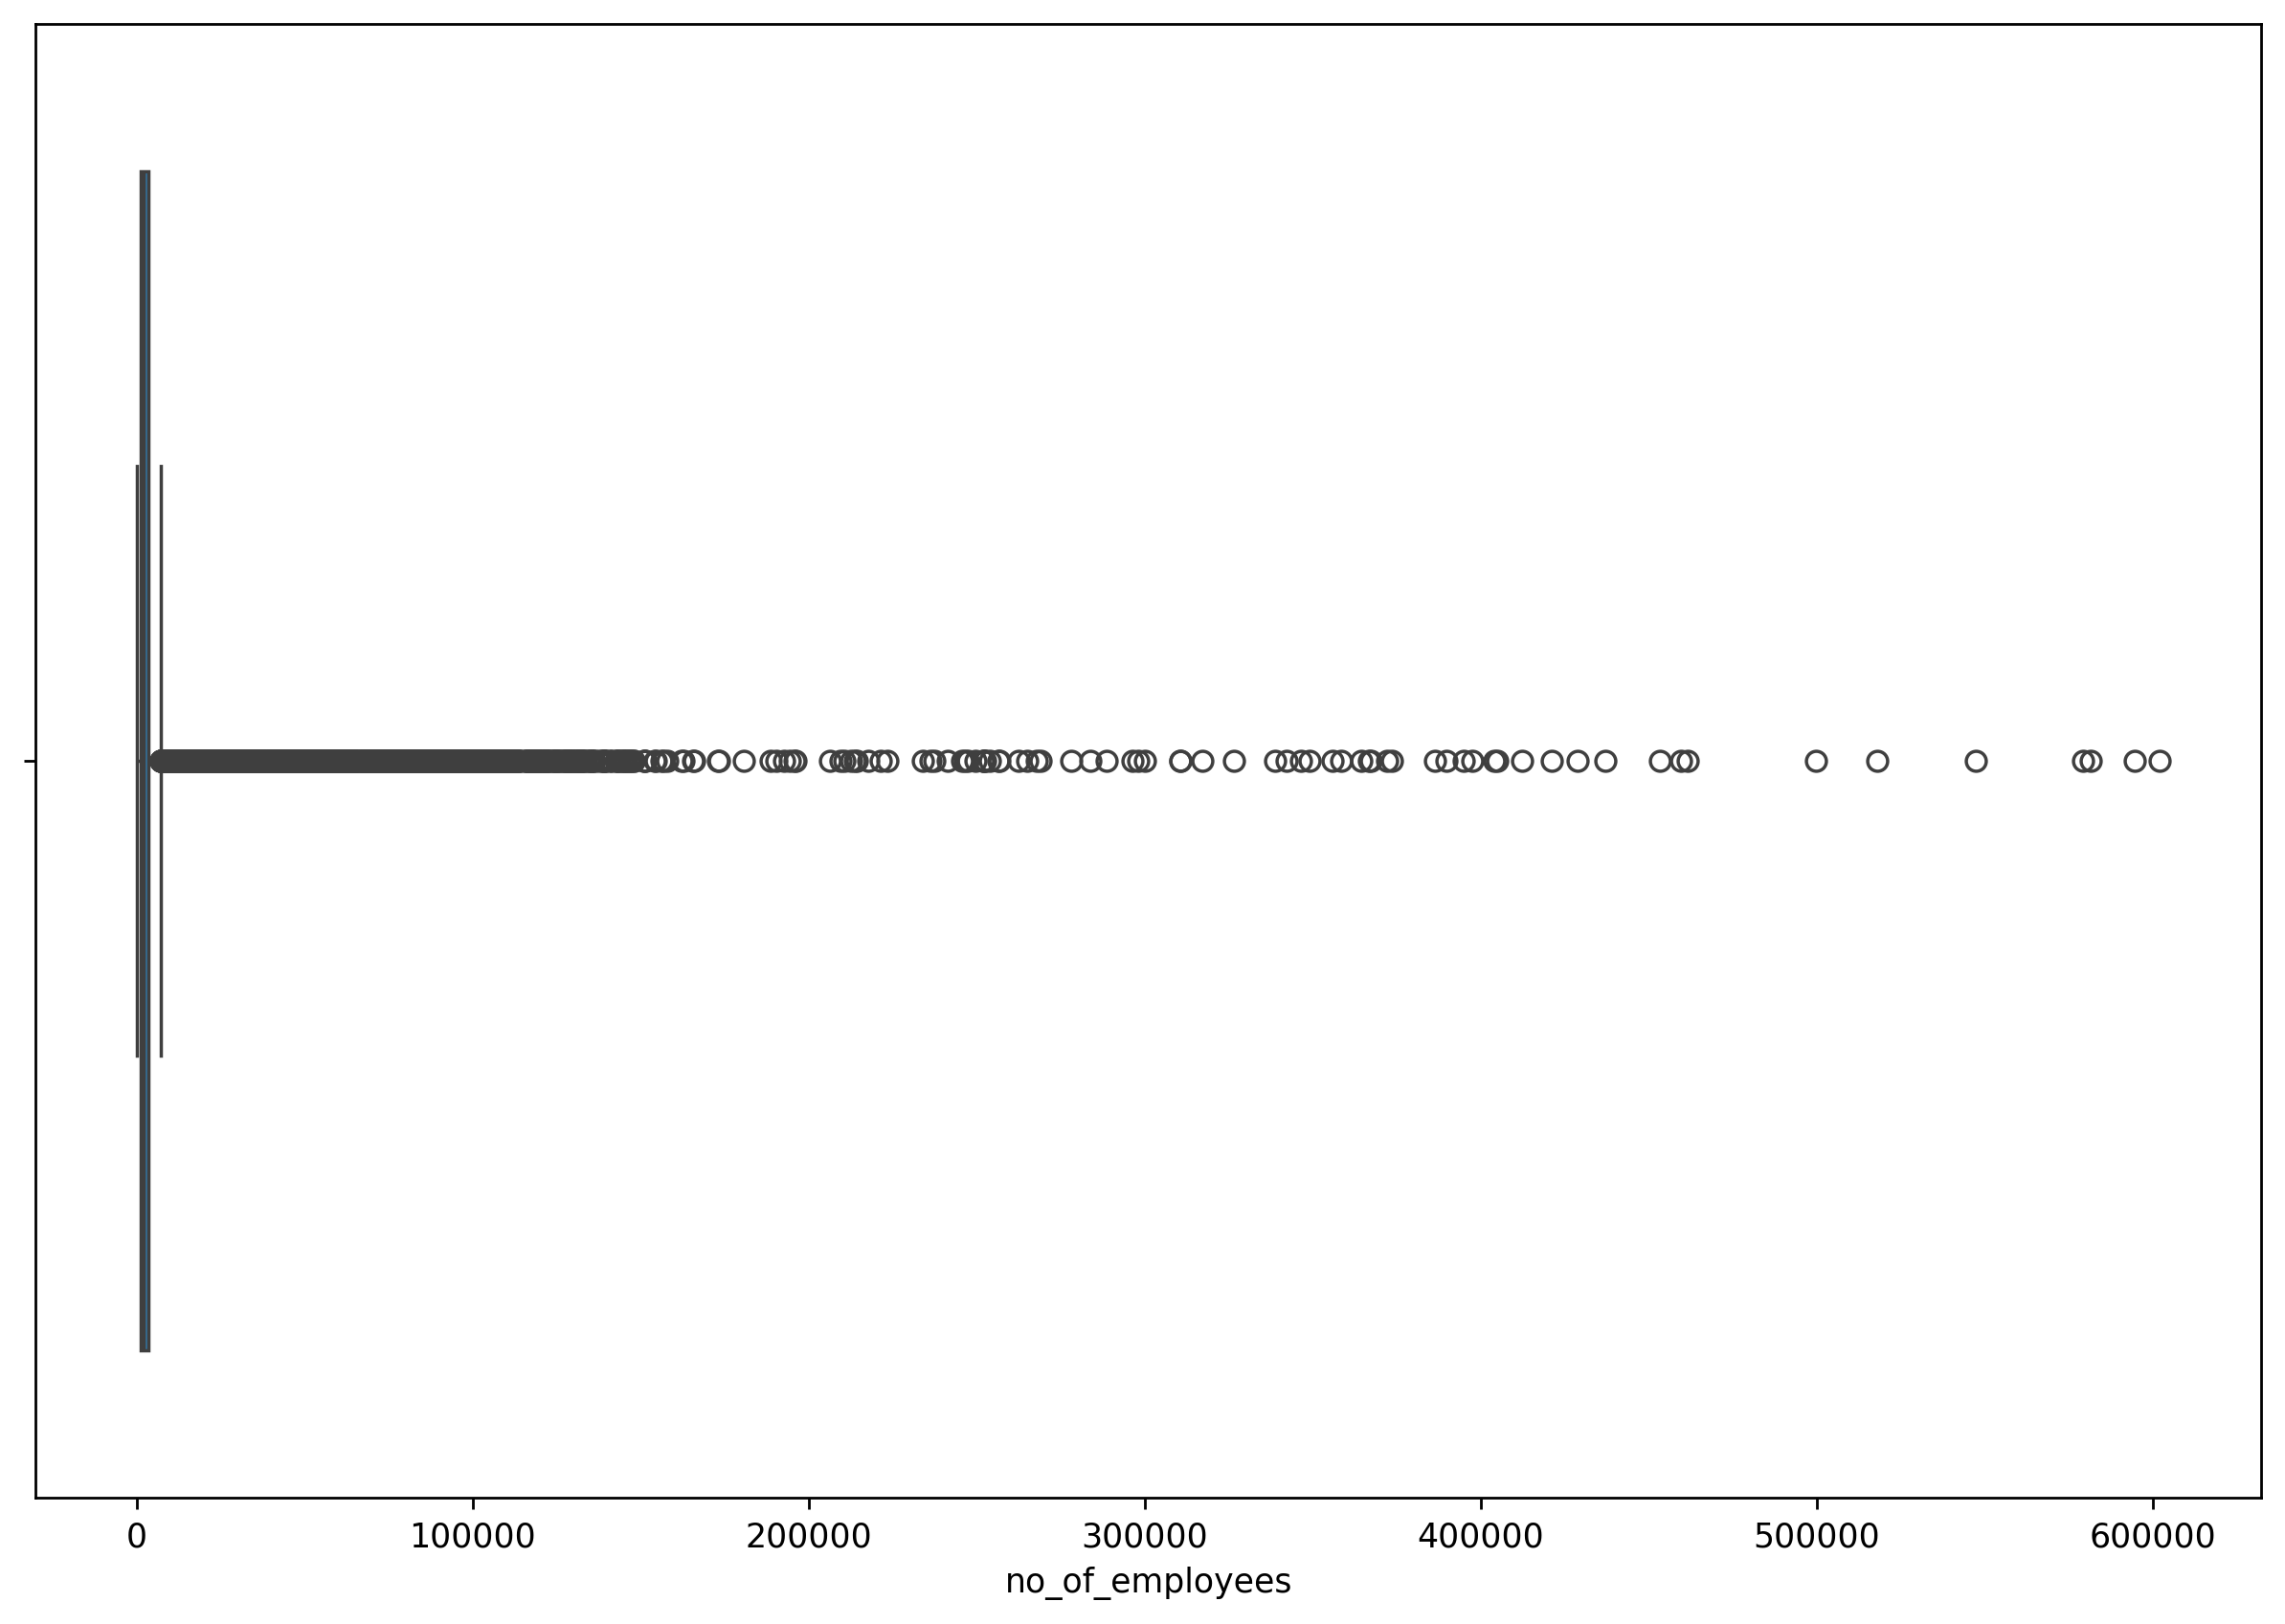

In [25]:
plt.figure(figsize=(12,8), dpi=250)
sns.boxplot(data=raw_df, x='no_of_employees');

While XGBoost is robust to outliers model performance can still benefit from preprocessing. We will need to consider capping these values at three standard deviations. The 75th percentile is 3,504 with the max value 620,609. There also negative values in this feature that seem like a mistake so will cap both ends.

<Axes: xlabel='no_of_employees', ylabel='Count'>

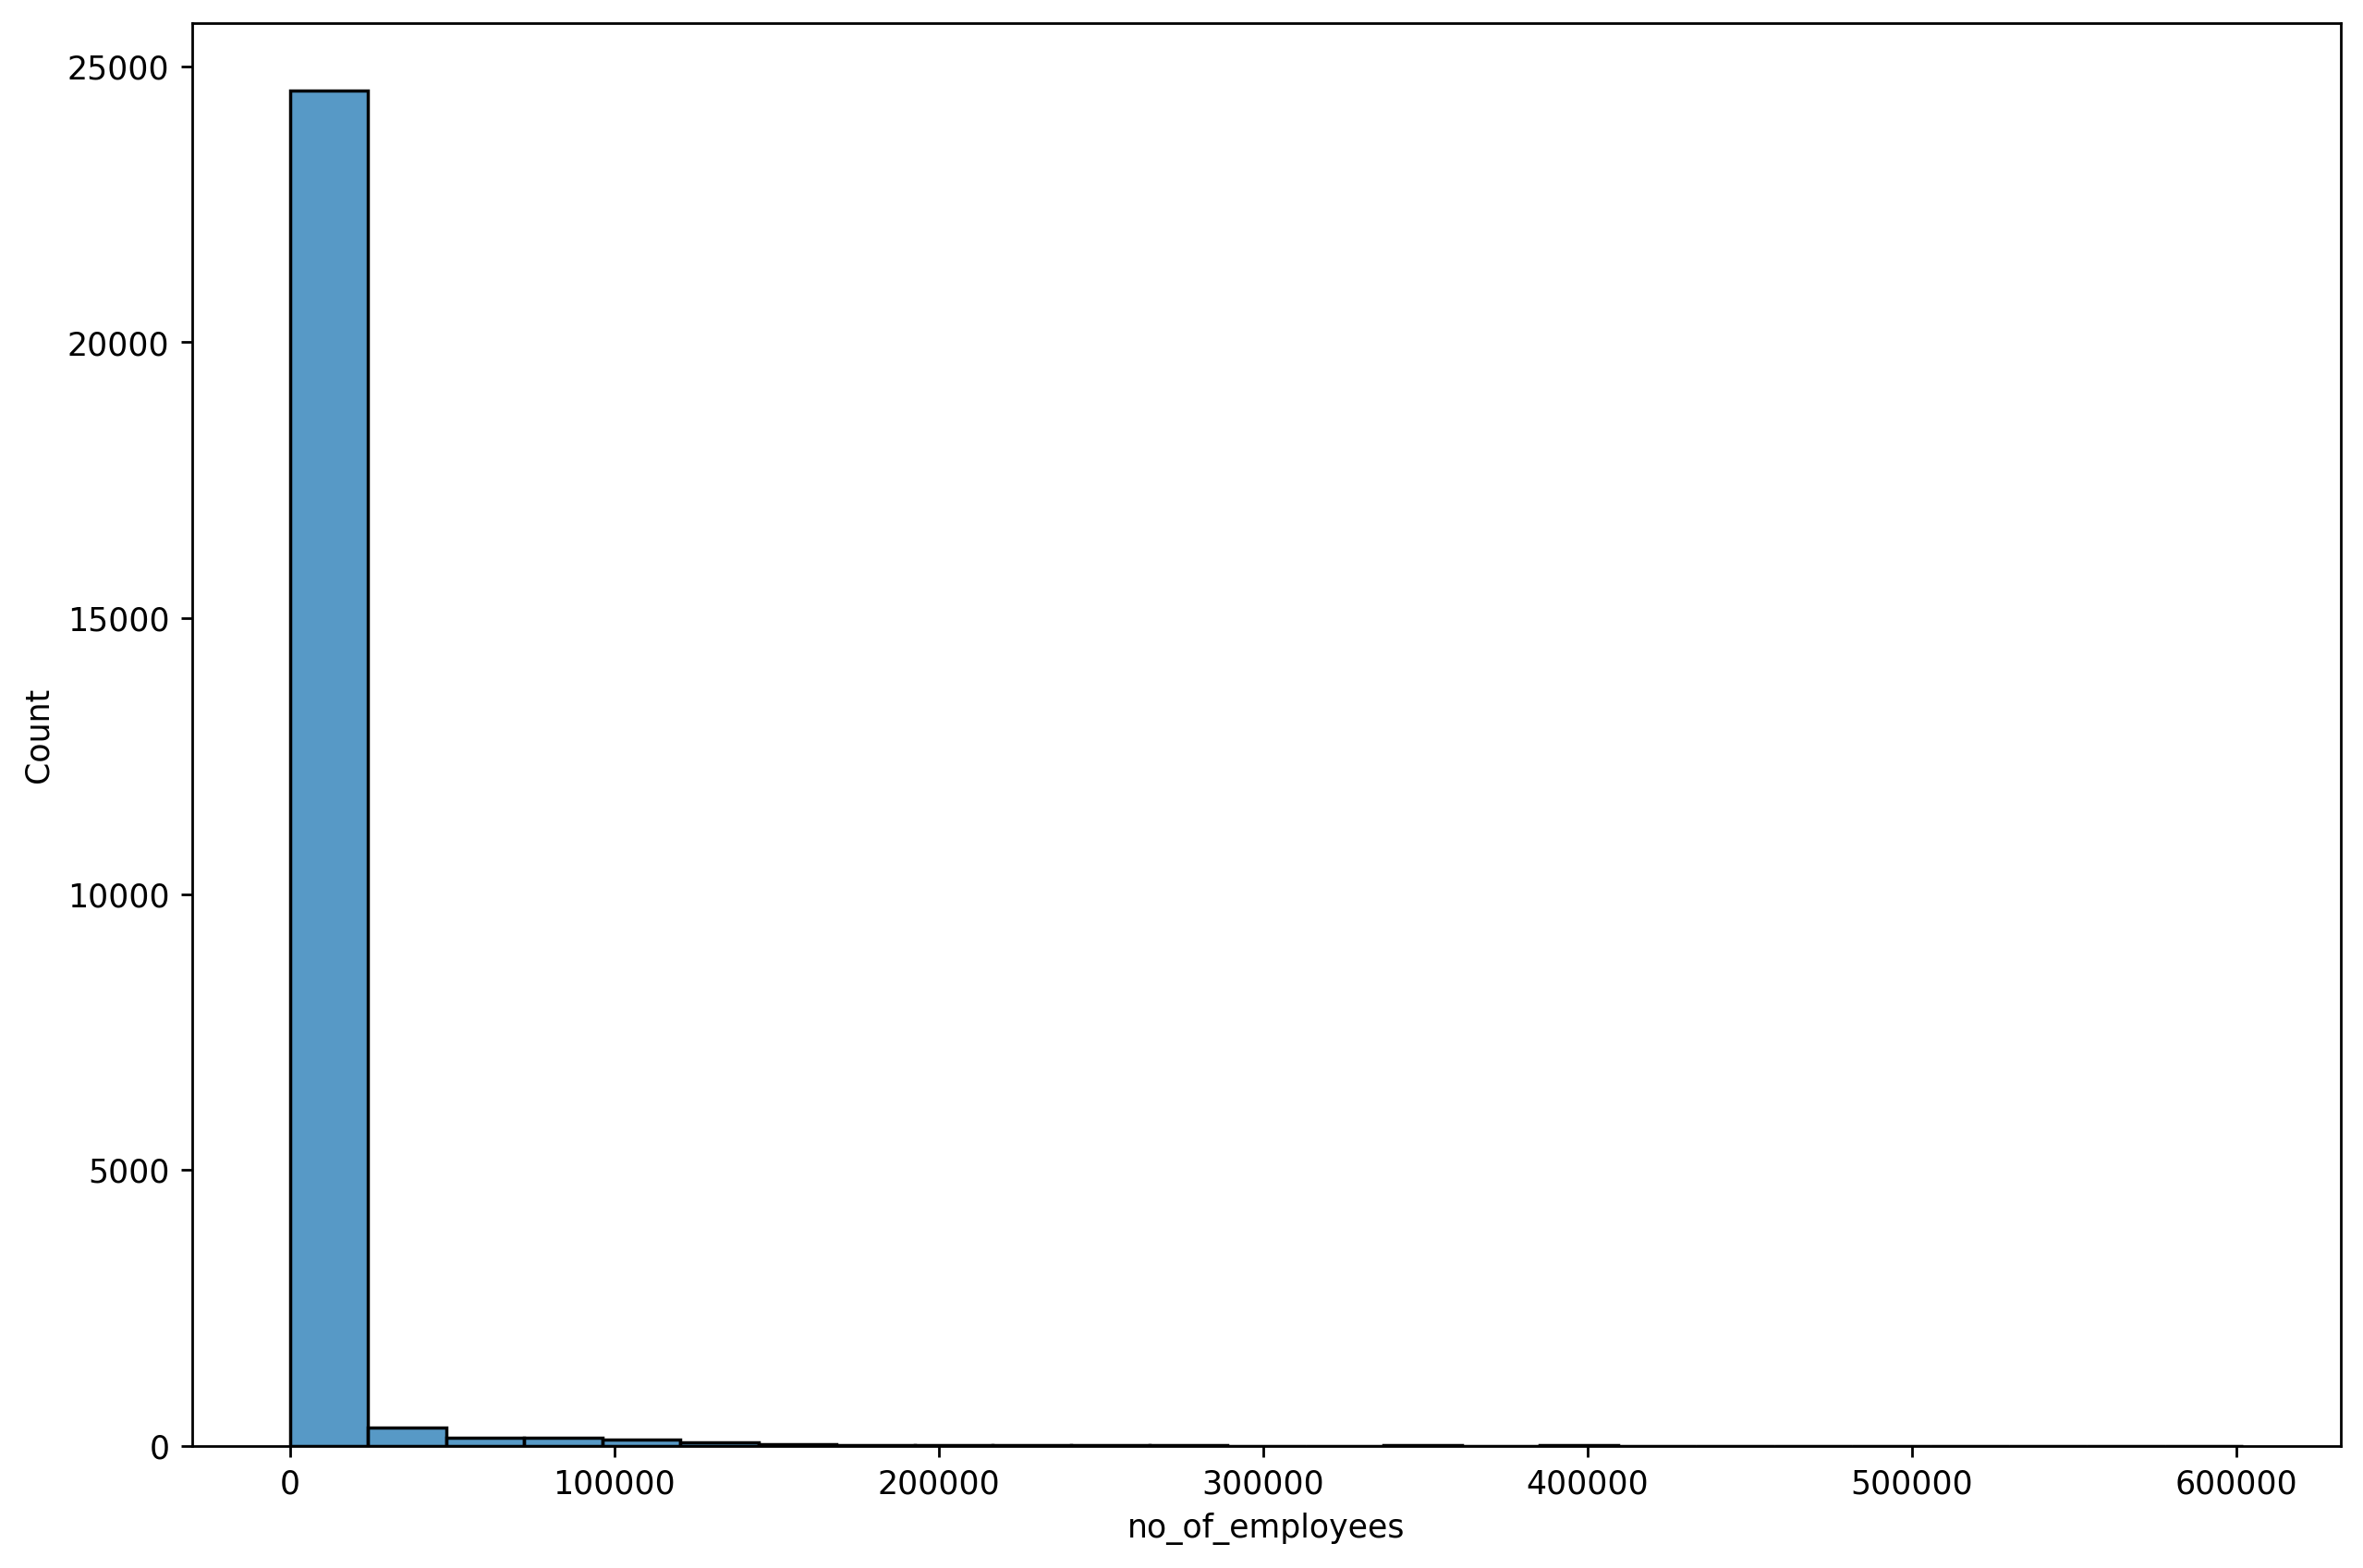

In [27]:
plt.figure(figsize=(12,8), dpi=250)
sns.histplot(raw_df['no_of_employees'], bins=25, kde=False)

This feature is heavliy weighted to 100,000 or less. There are some larger employers here and the data indicates that there are employers with negative employees. WIll see what I can do about treating this as outliers. 

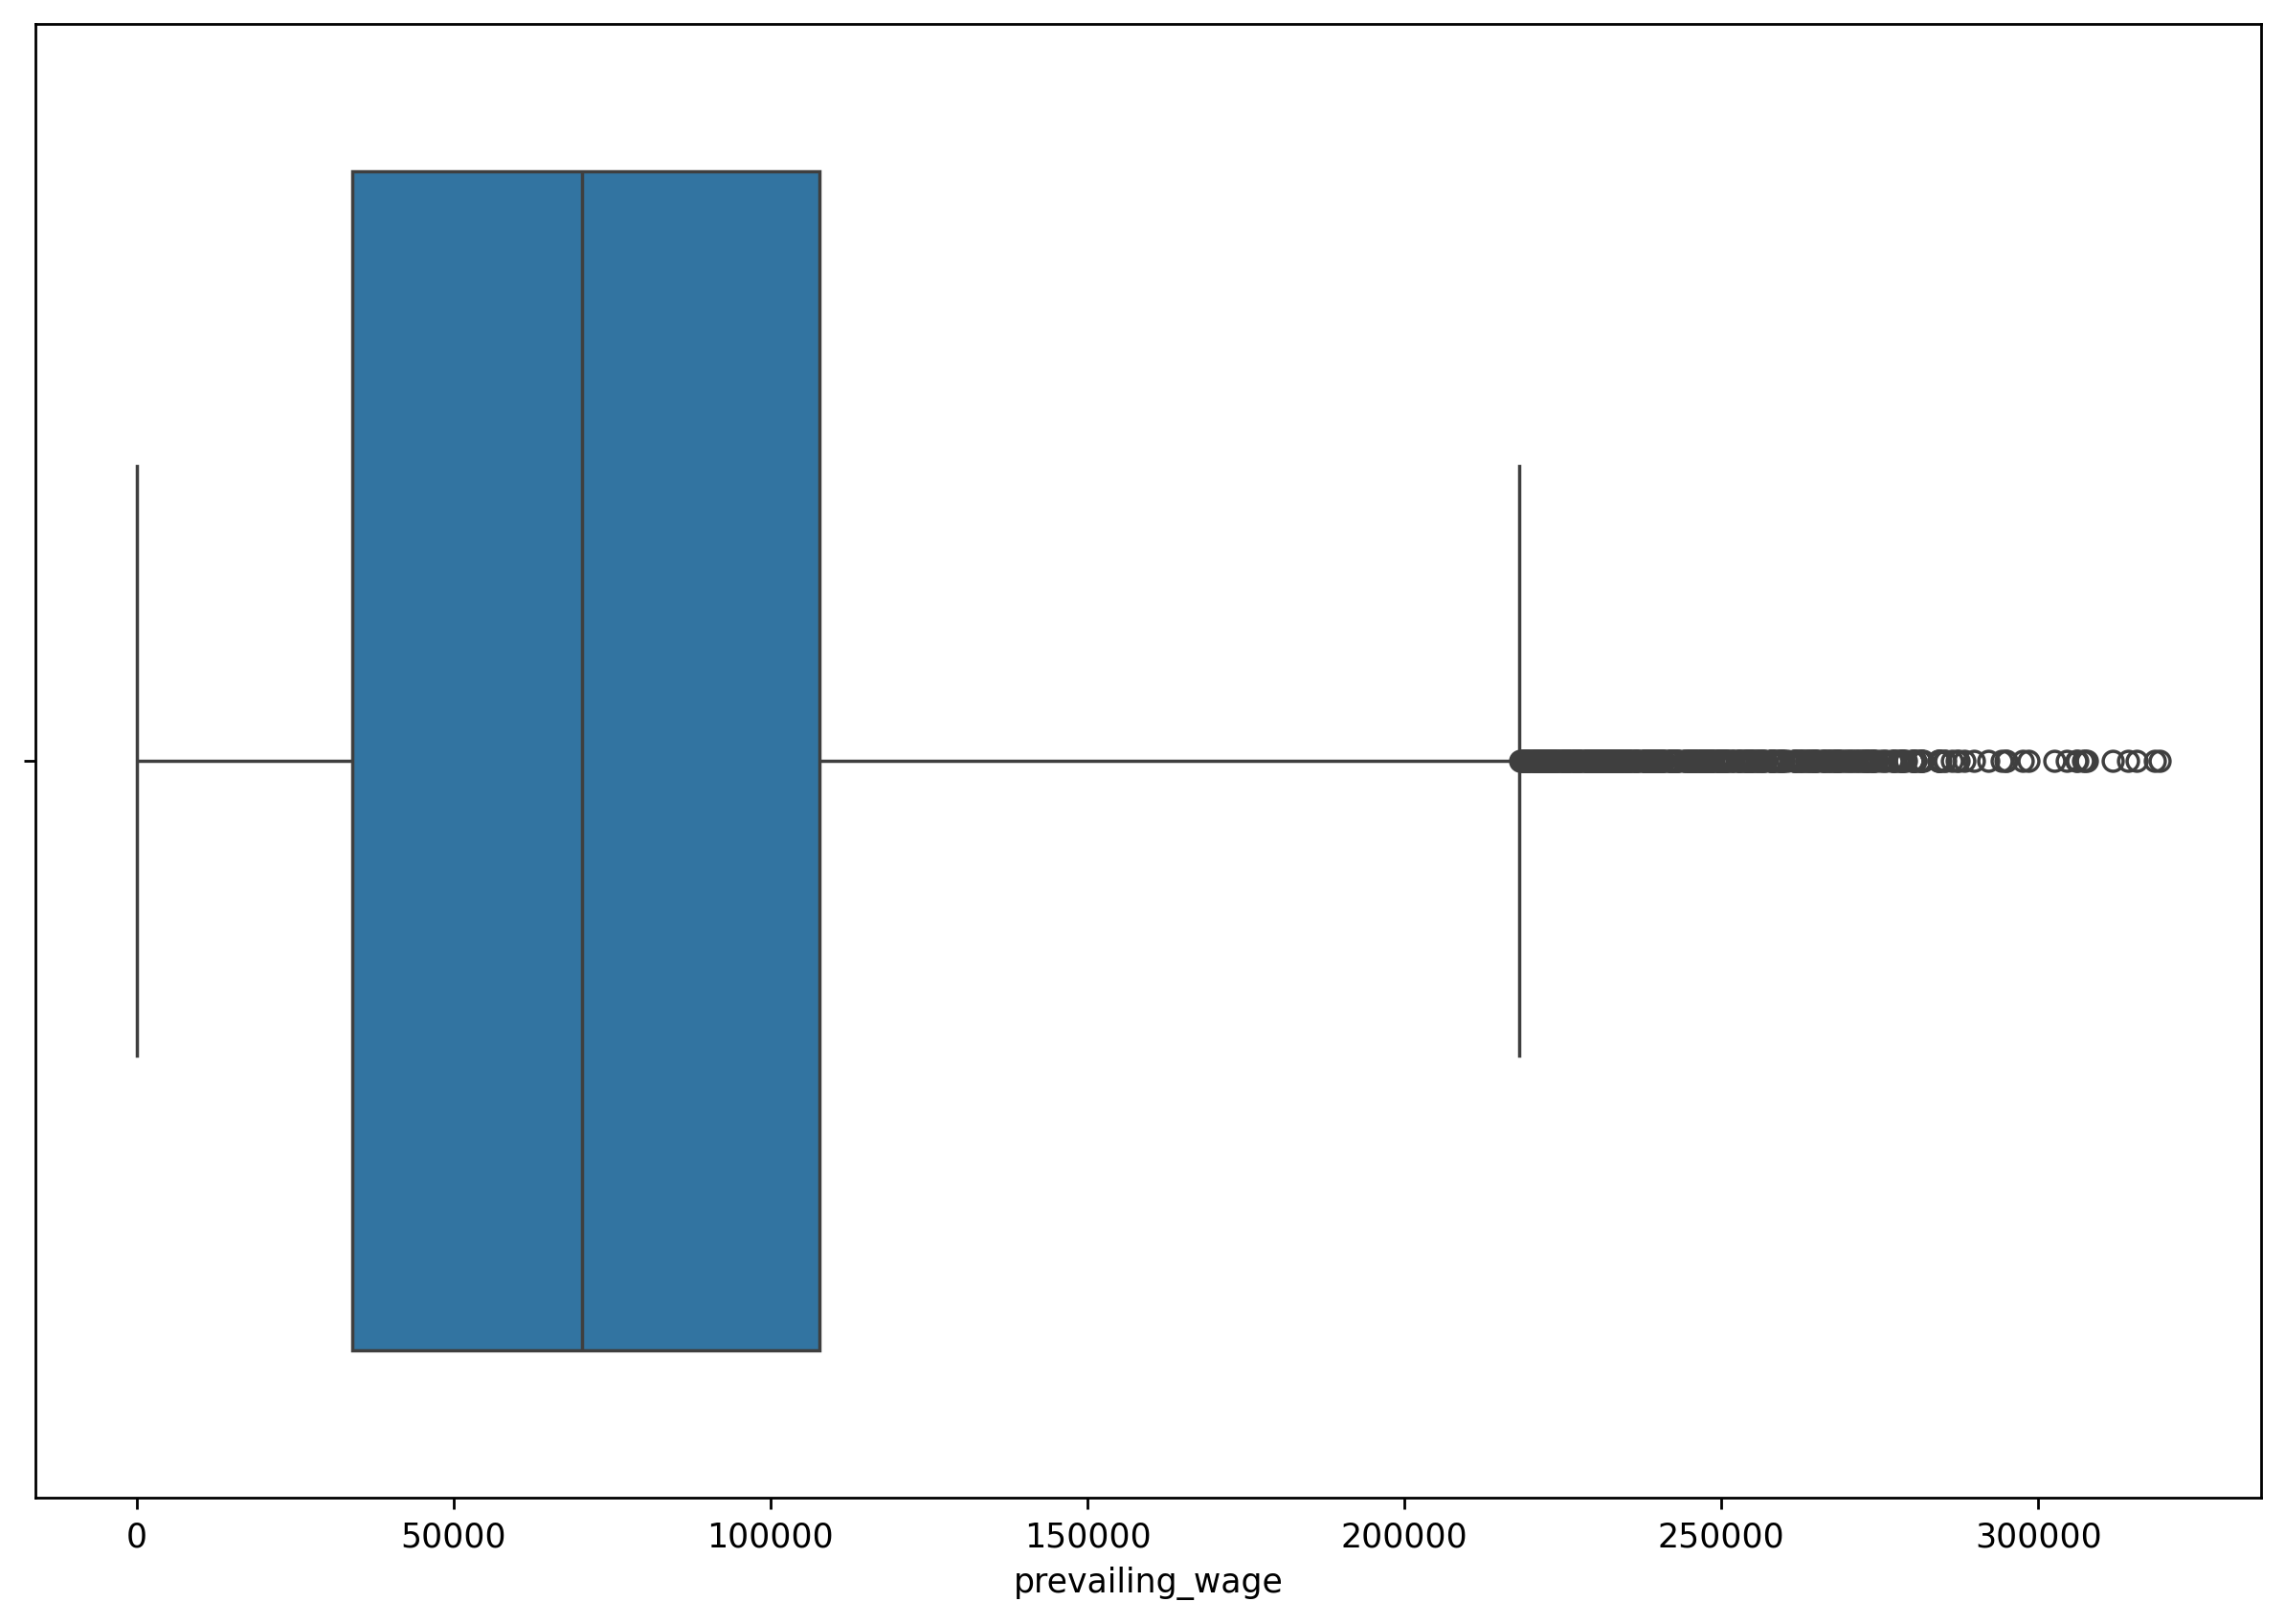

In [29]:
plt.figure(figsize=(12,8), dpi=250)
sns.boxplot(data=raw_df, x='prevailing_wage');

In [30]:
num_bins = 5
raw_df['Wage_Group'] = pd.cut(raw_df['prevailing_wage'], bins=num_bins)
grouped = raw_df.groupby('Wage_Group')['prevailing_wage'].mean()
print(grouped)

Wage_Group
(-317.071, 63843.763]        28897.295639
(63843.763, 127685.39]       93411.209930
(127685.39, 191527.017]     147549.090781
(191527.017, 255368.643]    219091.007423
(255368.643, 319210.27]     274556.084889
Name: prevailing_wage, dtype: float64


Prevailing Wage has some issues. On the high end some of them seem high, but still possible, reviewing salary survey they don't really seem possible but will need to compare experience and education to salary to see if they are relaistic. On the low end there are negative prevailing wages and this is a flat out error. I will consider them outliers and cap the lower end to help reduce the impact. 

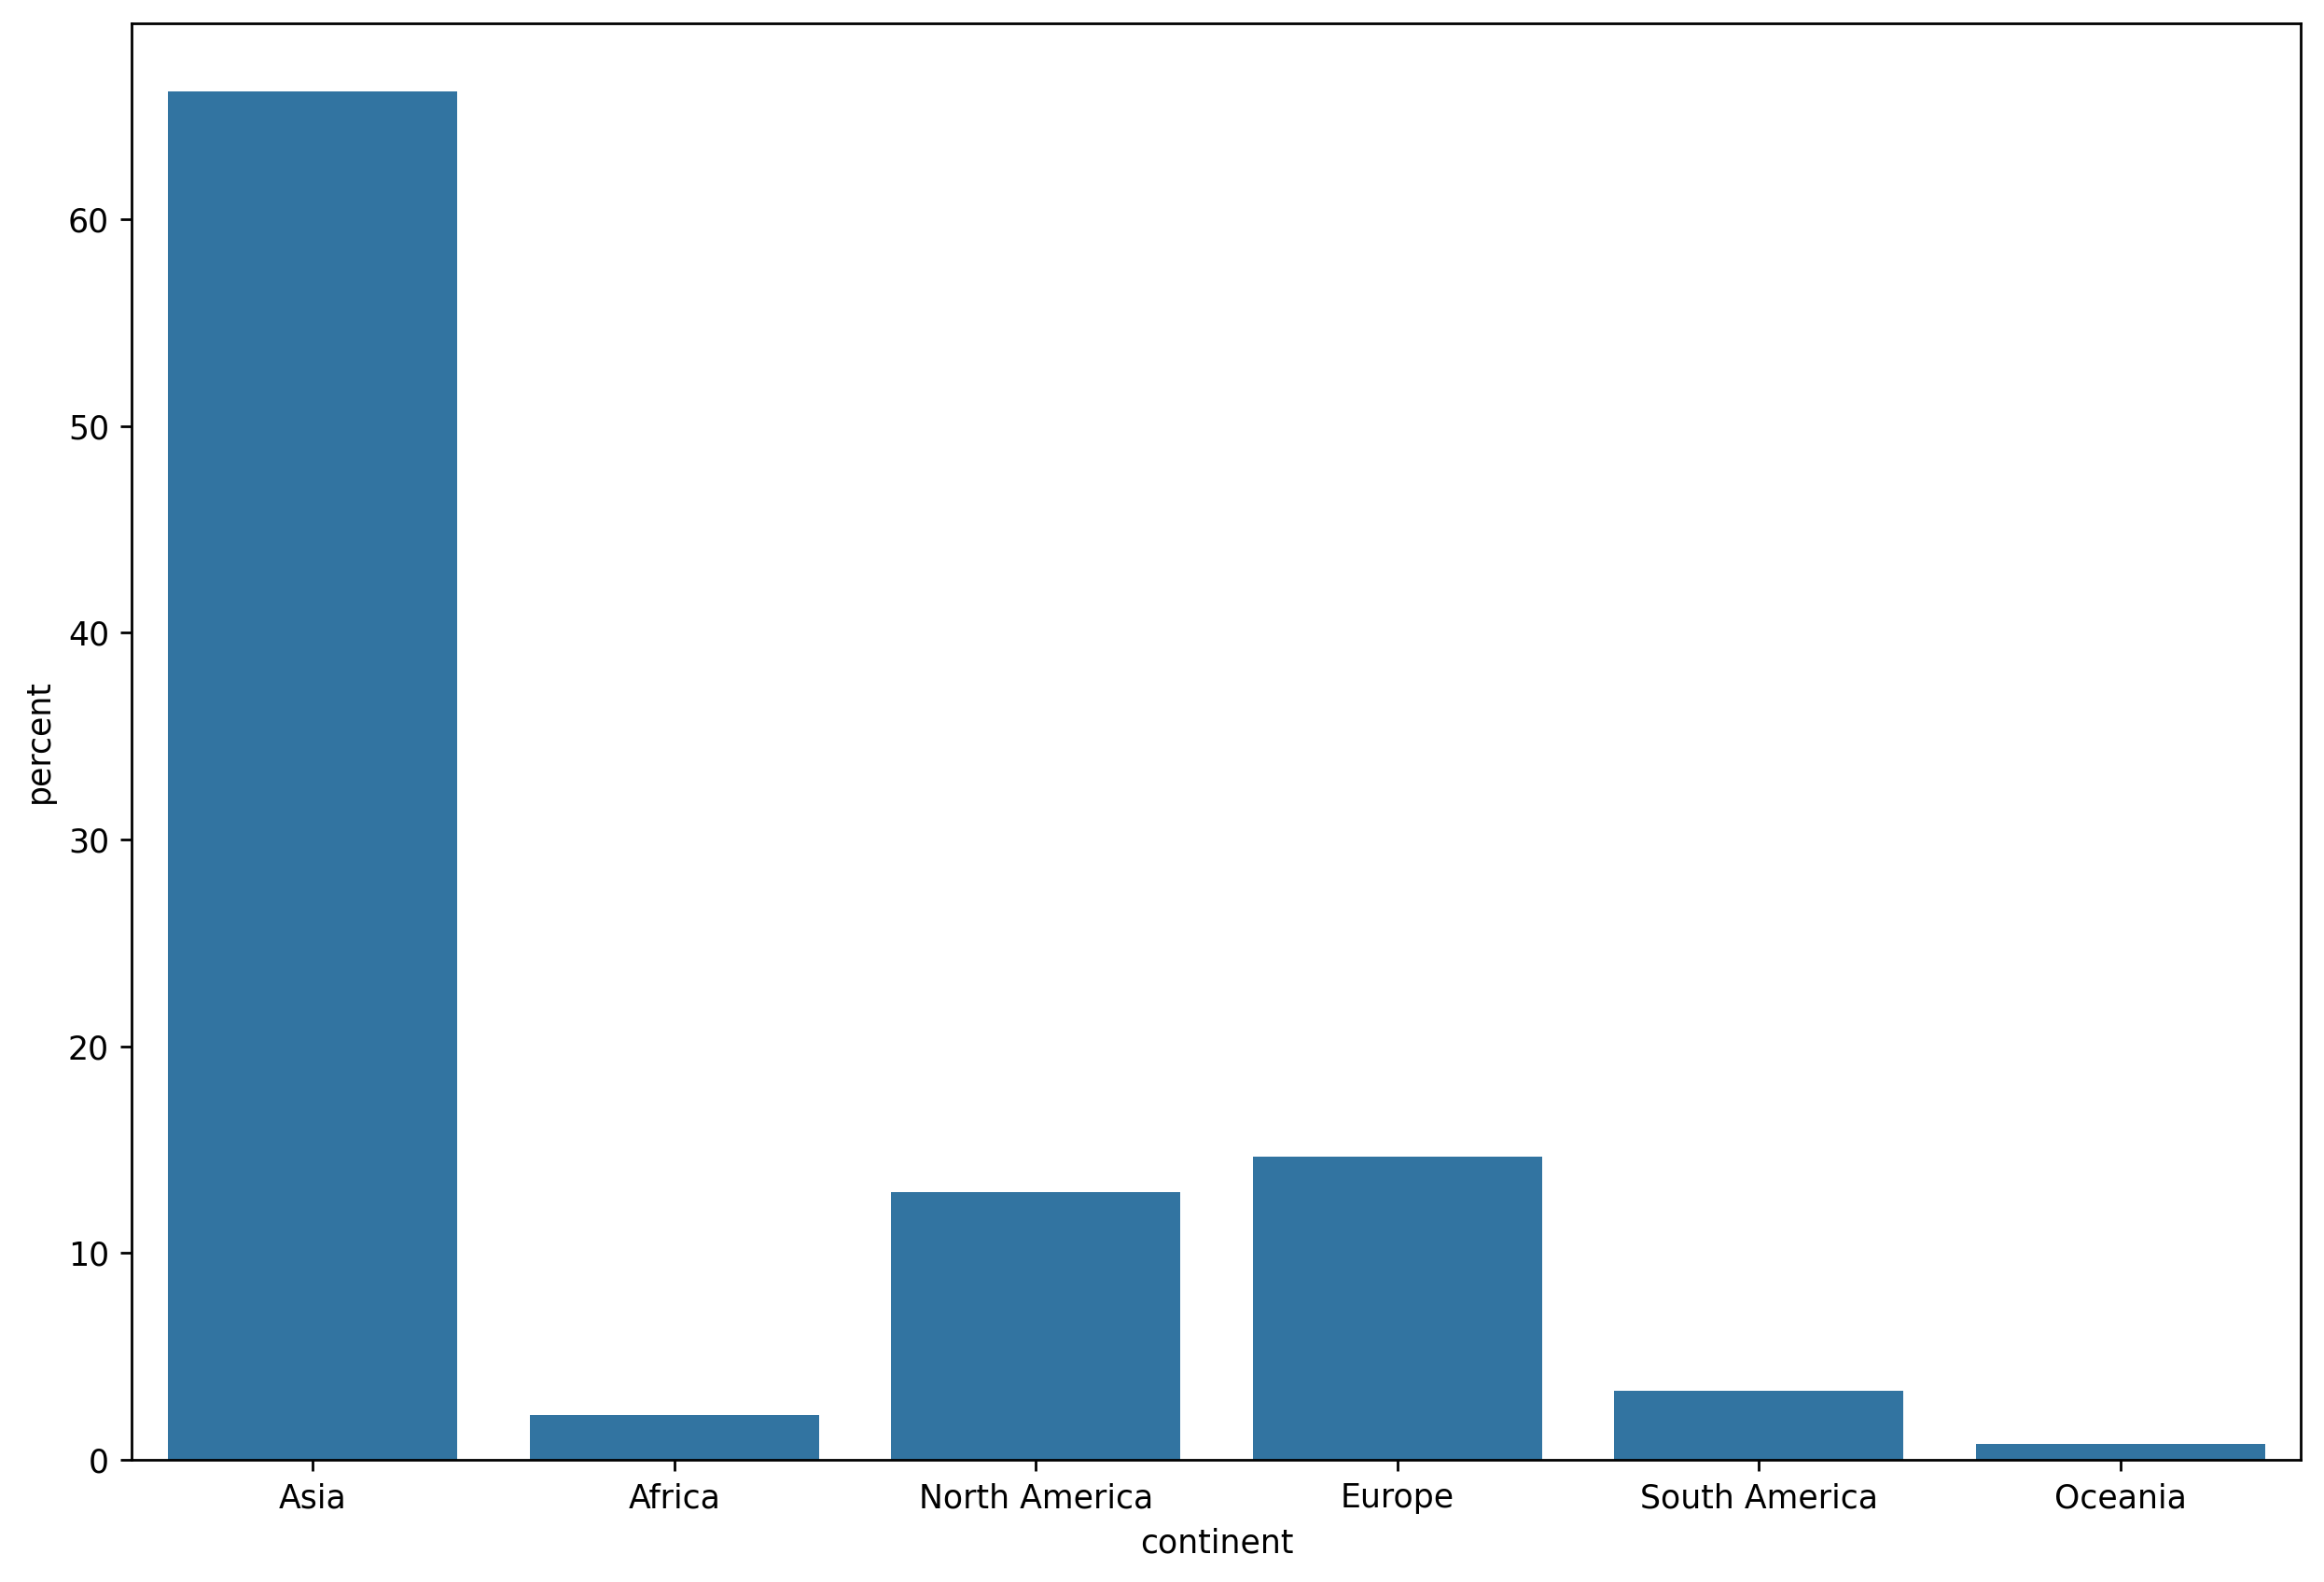

In [32]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='continent', stat='percent');

The bulk of the applicants are from Asia.

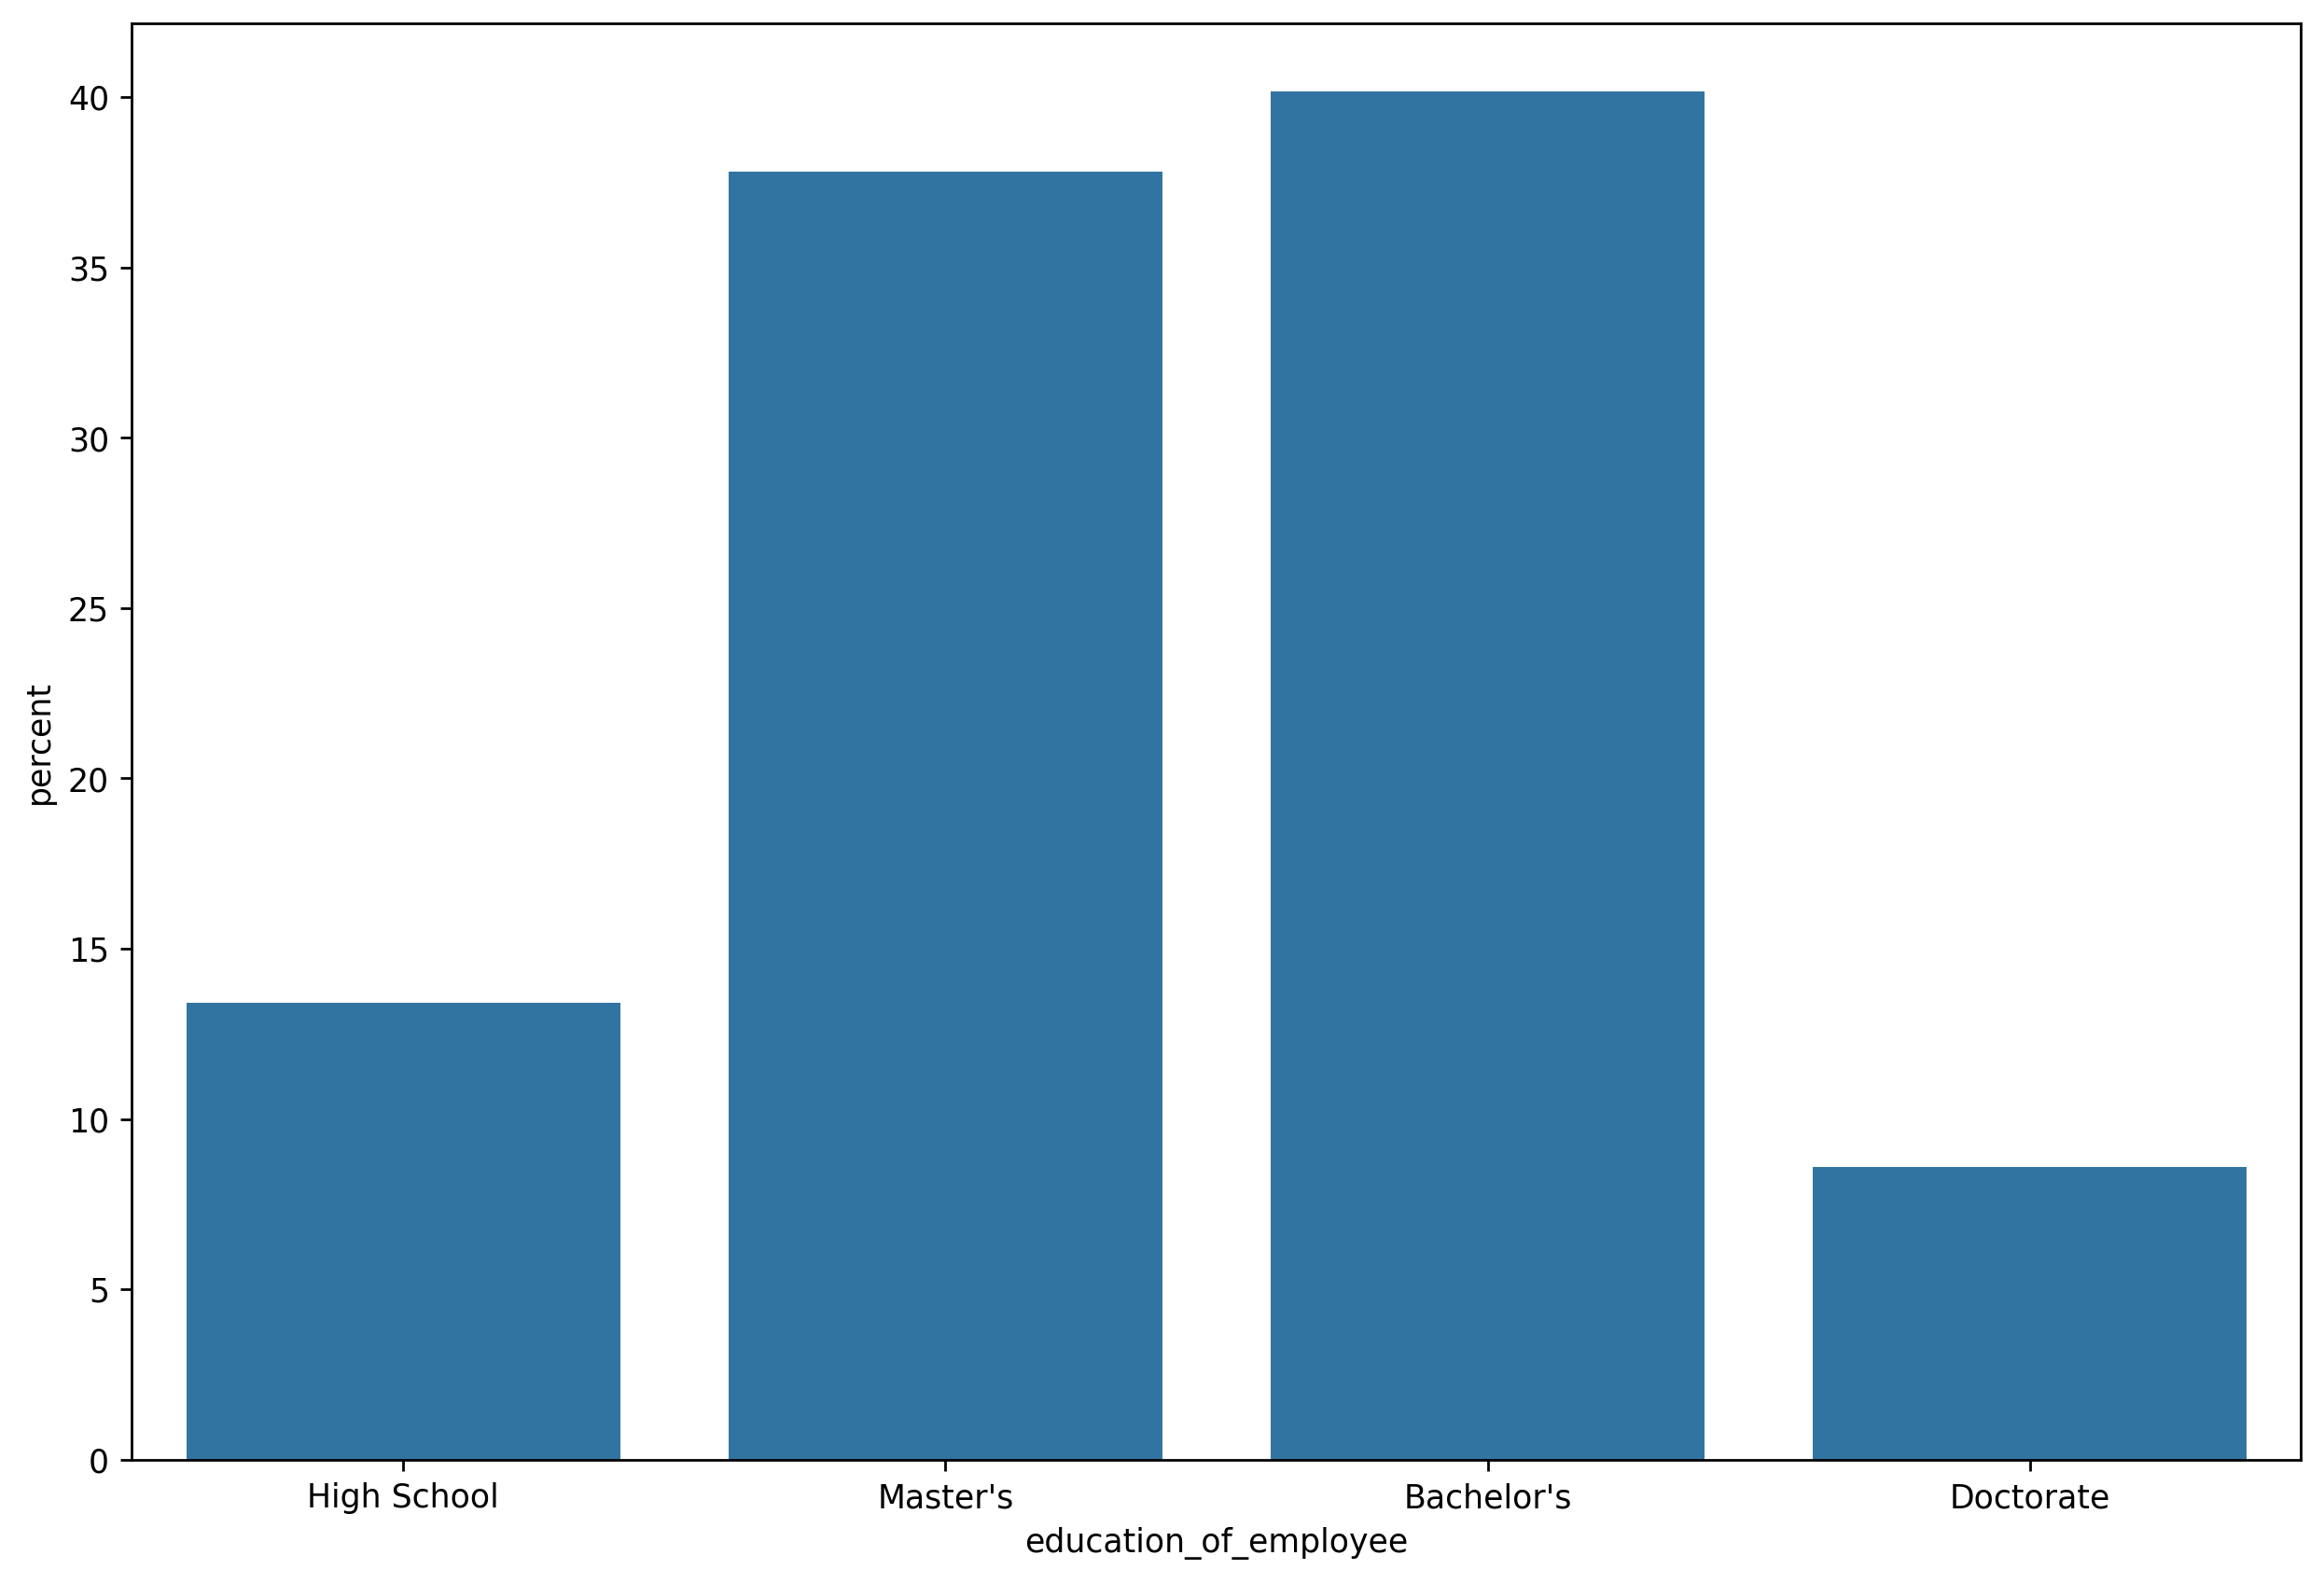

In [34]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='education_of_employee', stat='percent');

Most of the candidate employees have bachelors (40%) or masters (38%) degrees.

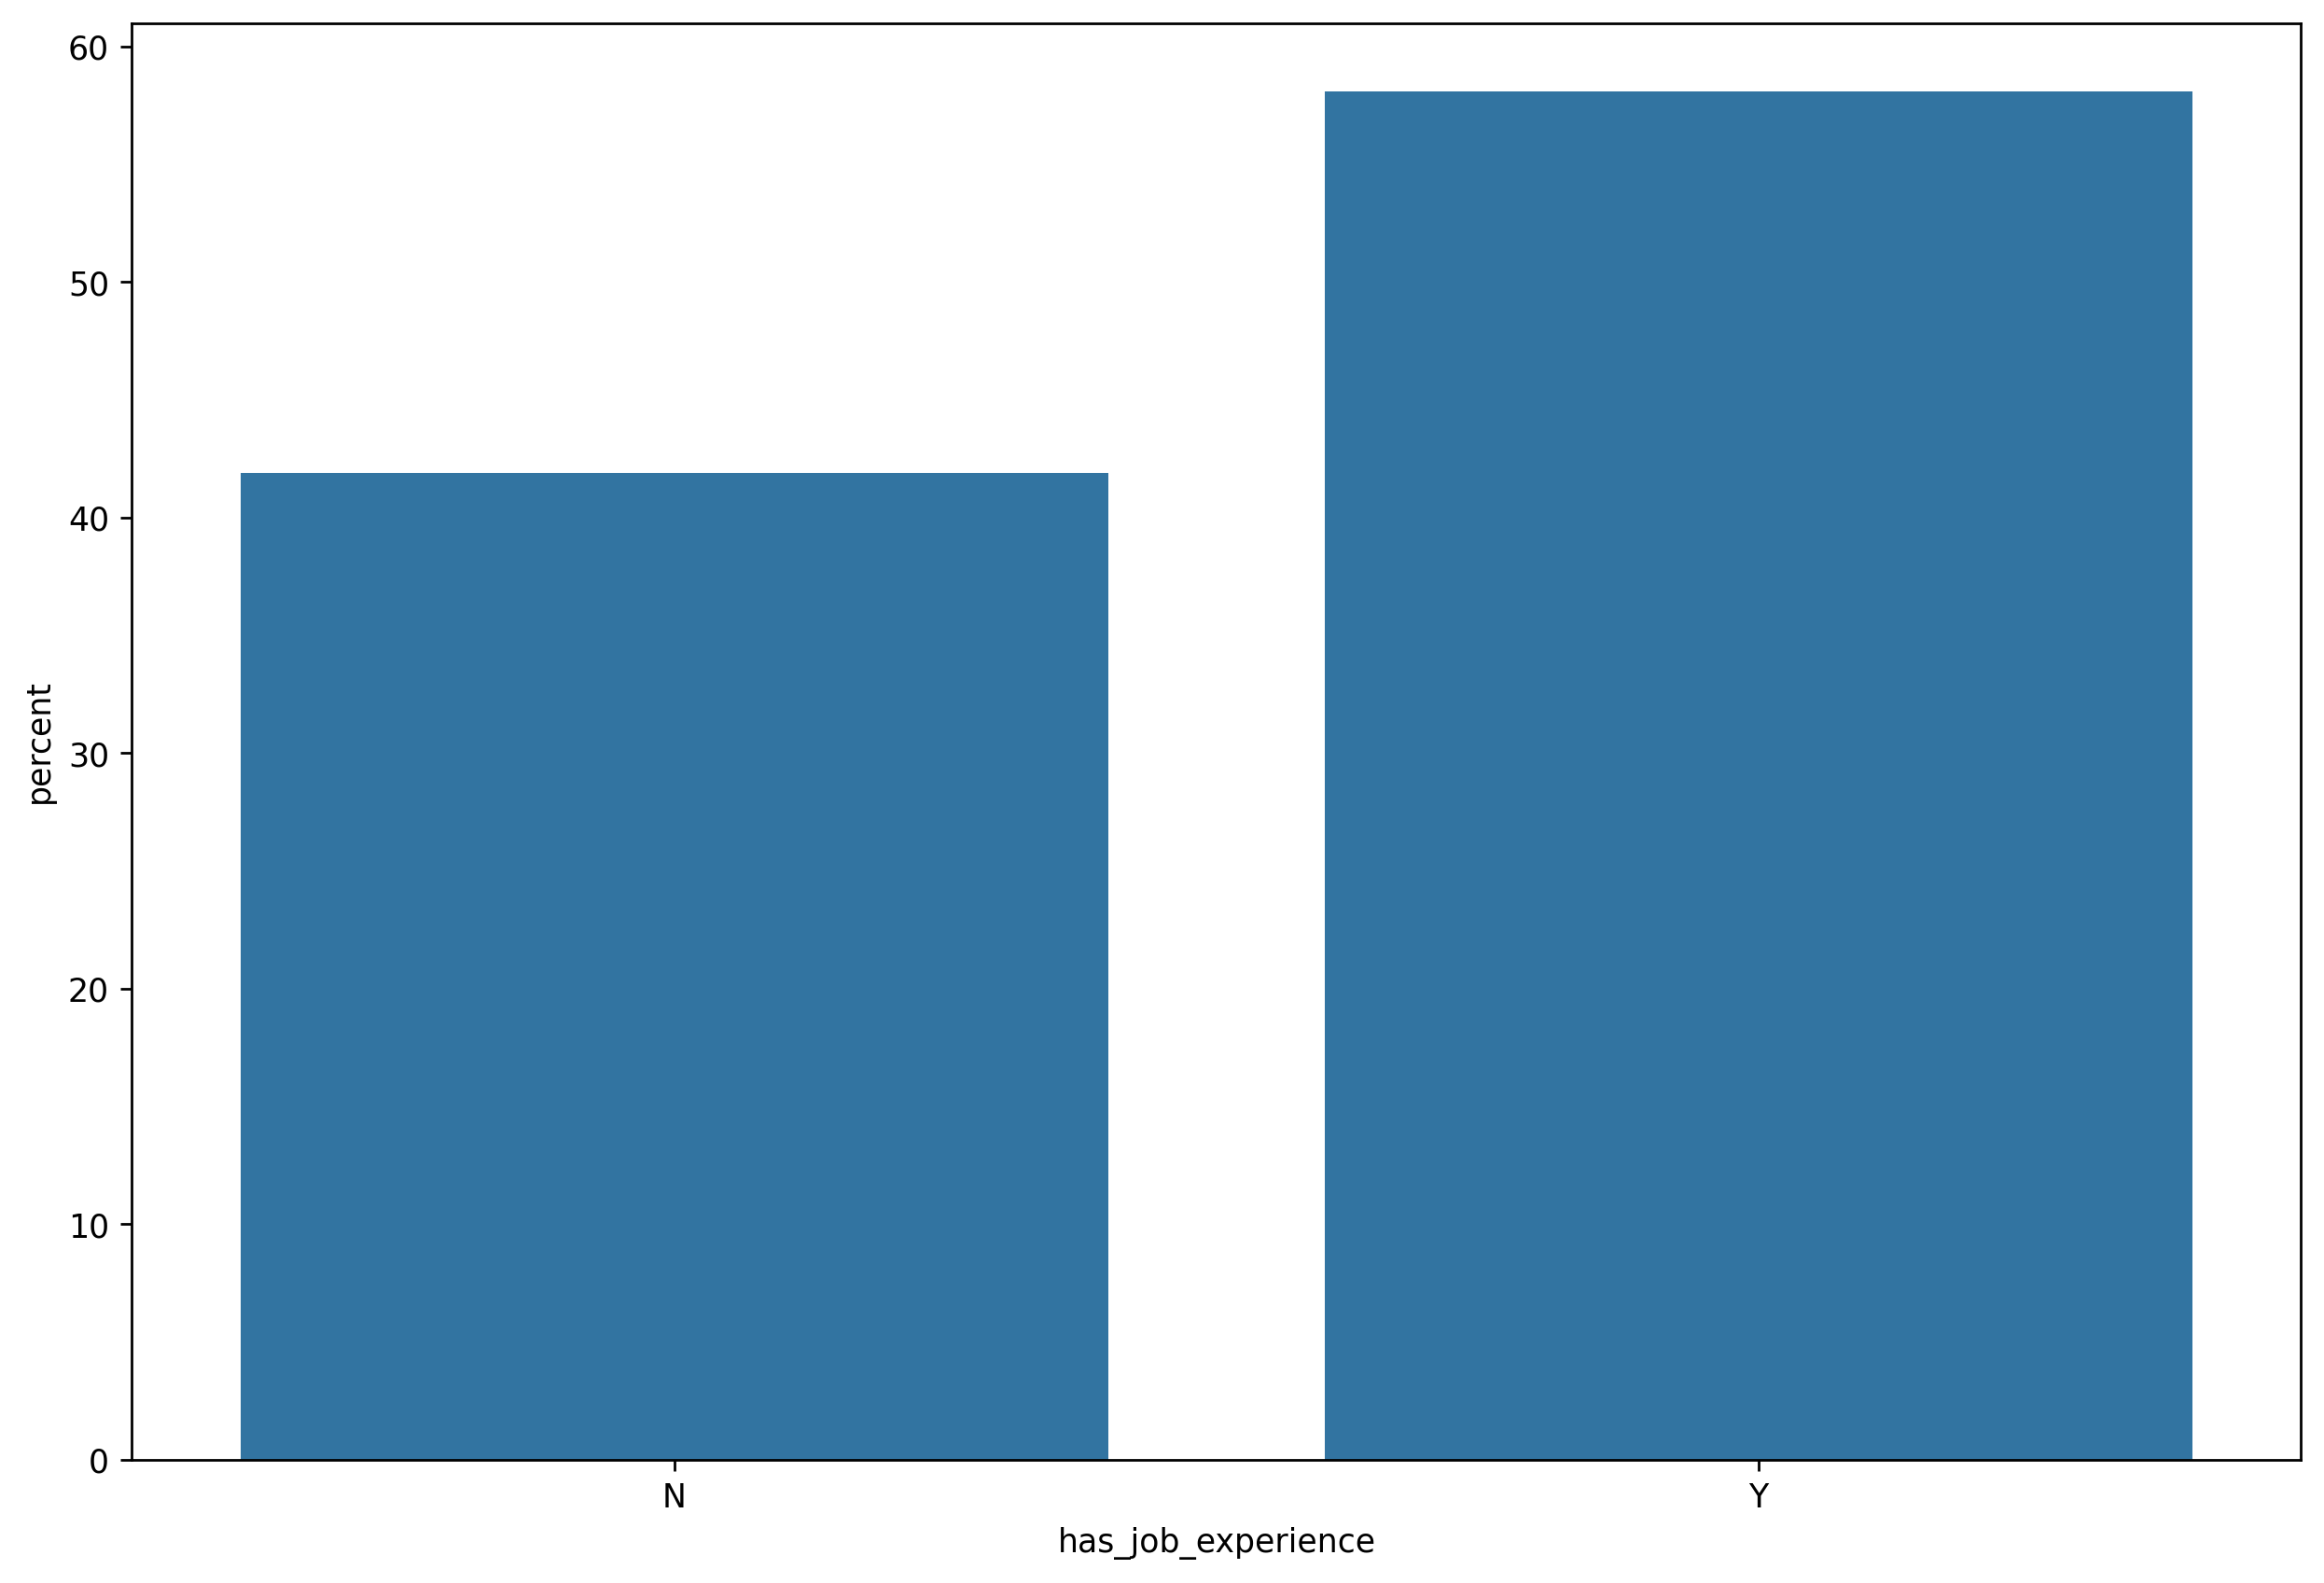

In [36]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='has_job_experience', stat='percent');

Job expereince is mildly imbalanced, but will use stratify in train test split to ensure this does not cause issues.

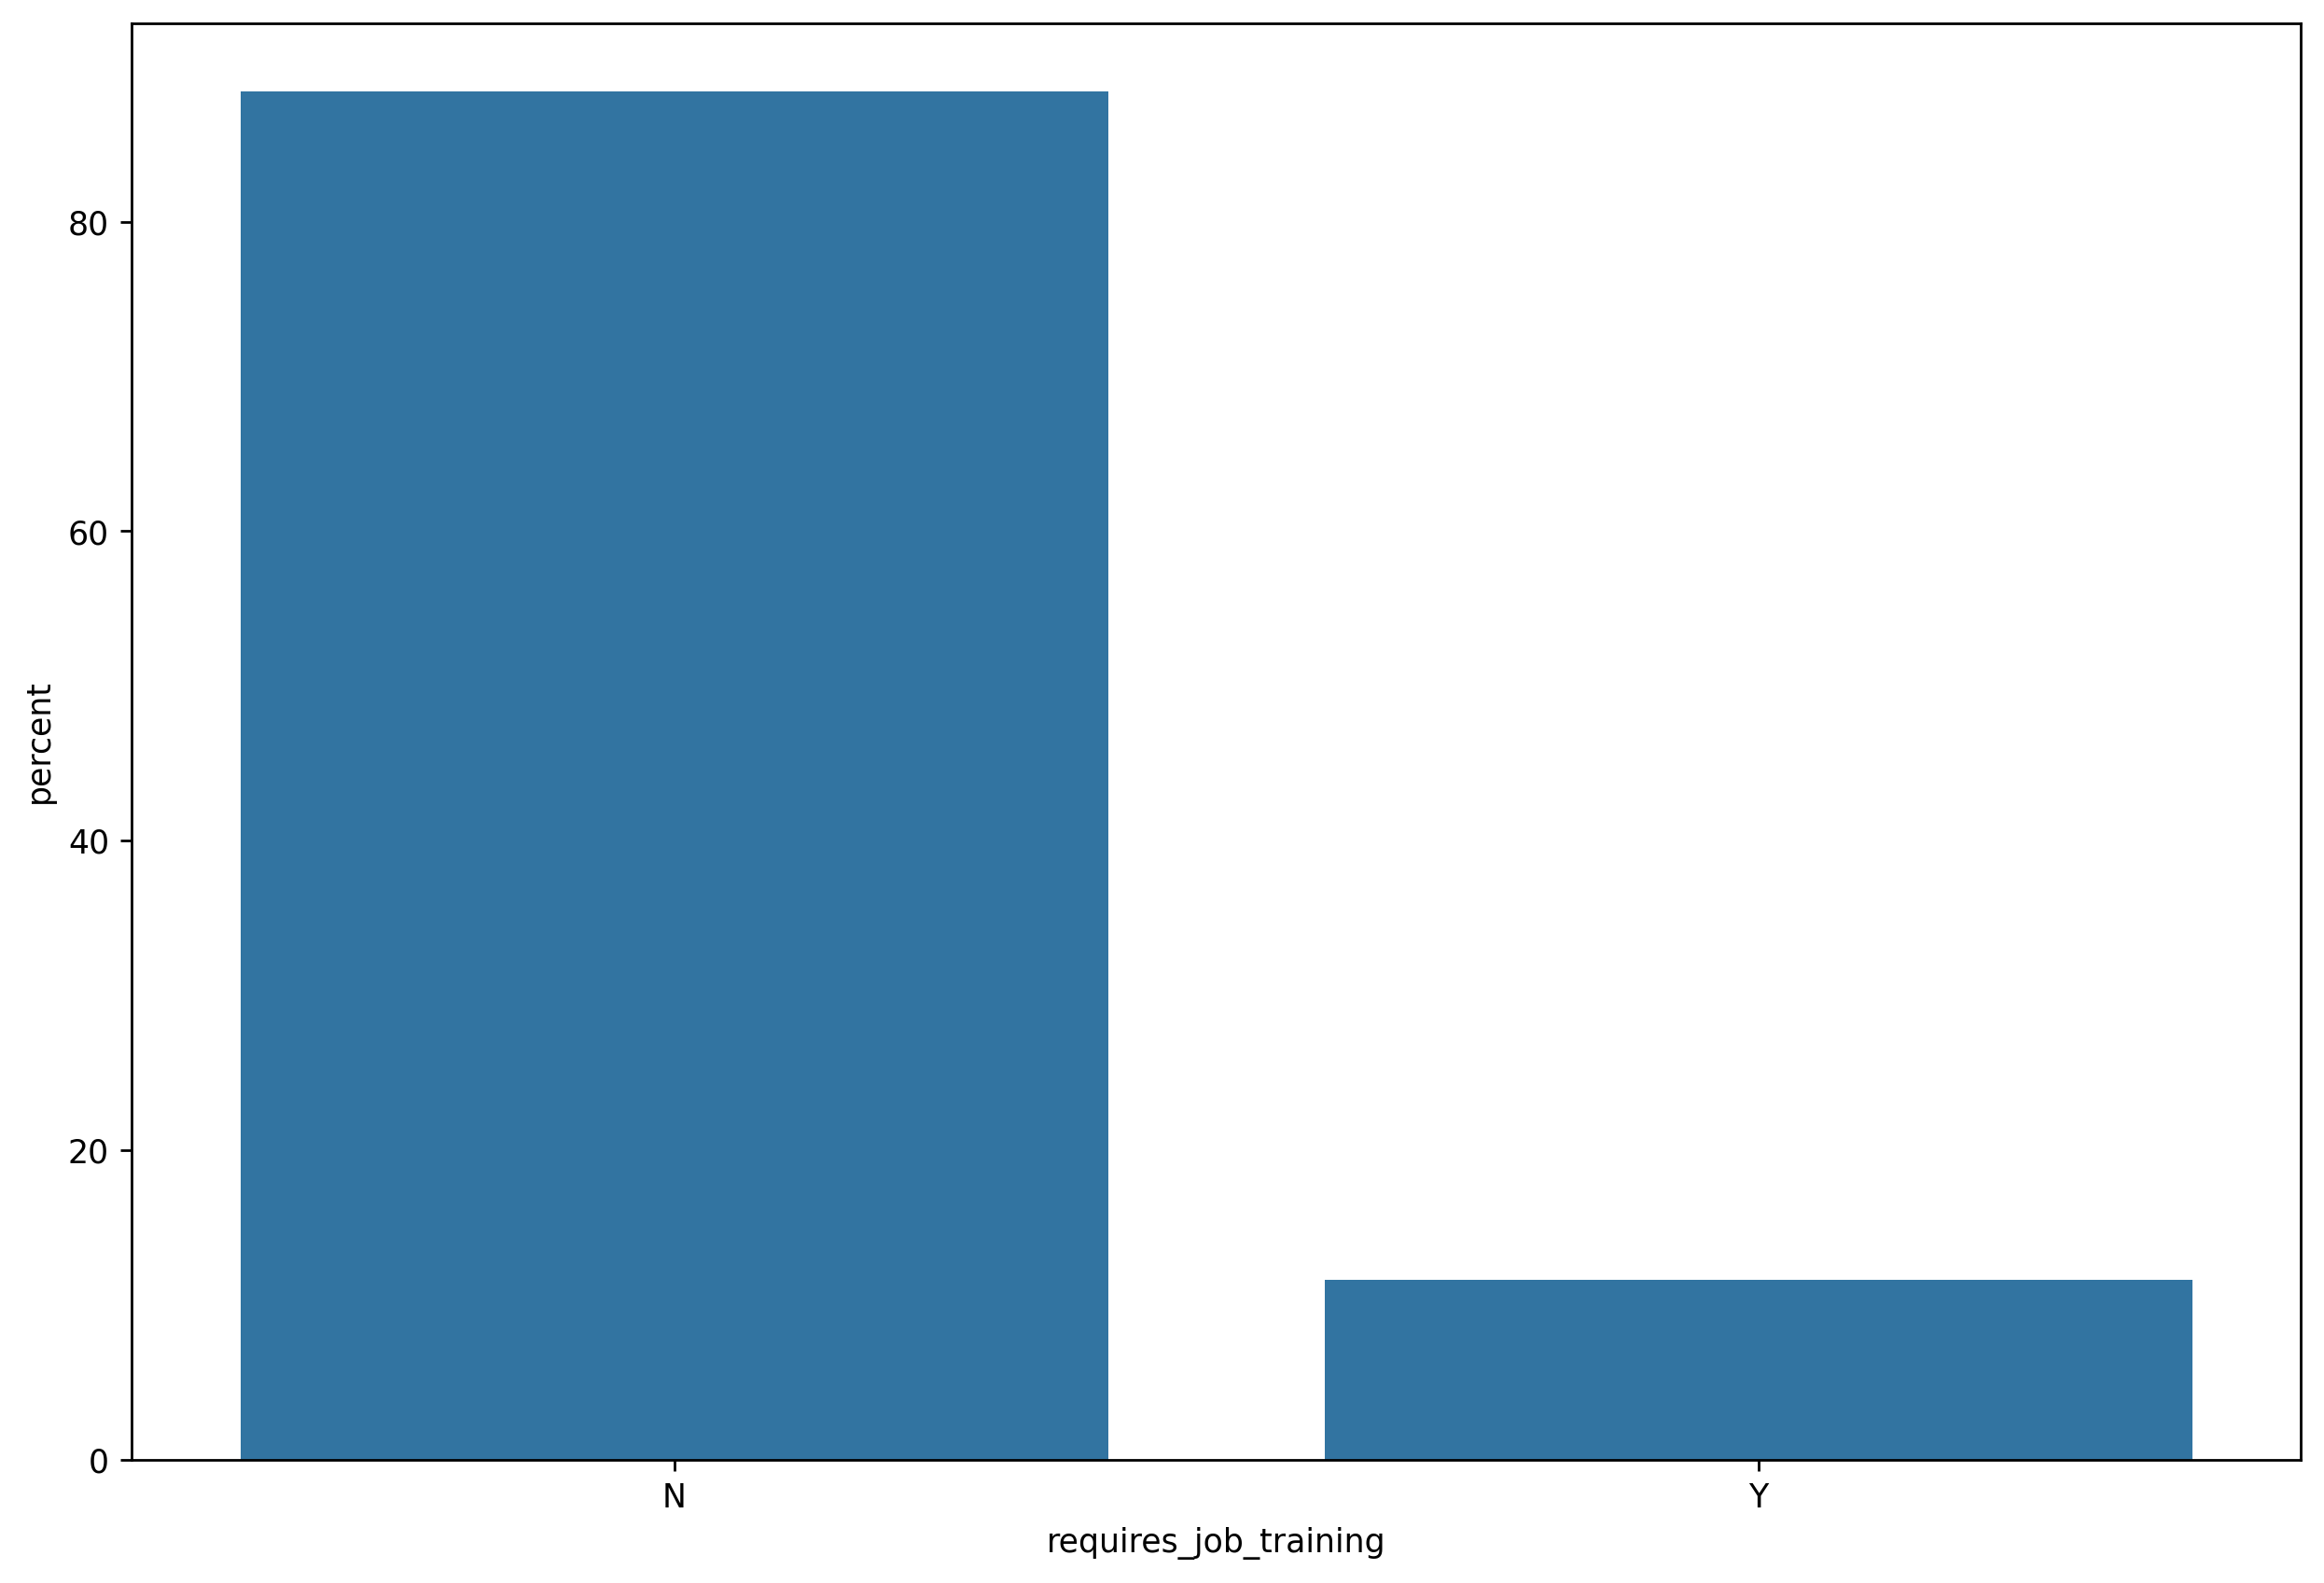

In [38]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='requires_job_training', stat='percent');

An imbalanced feature.

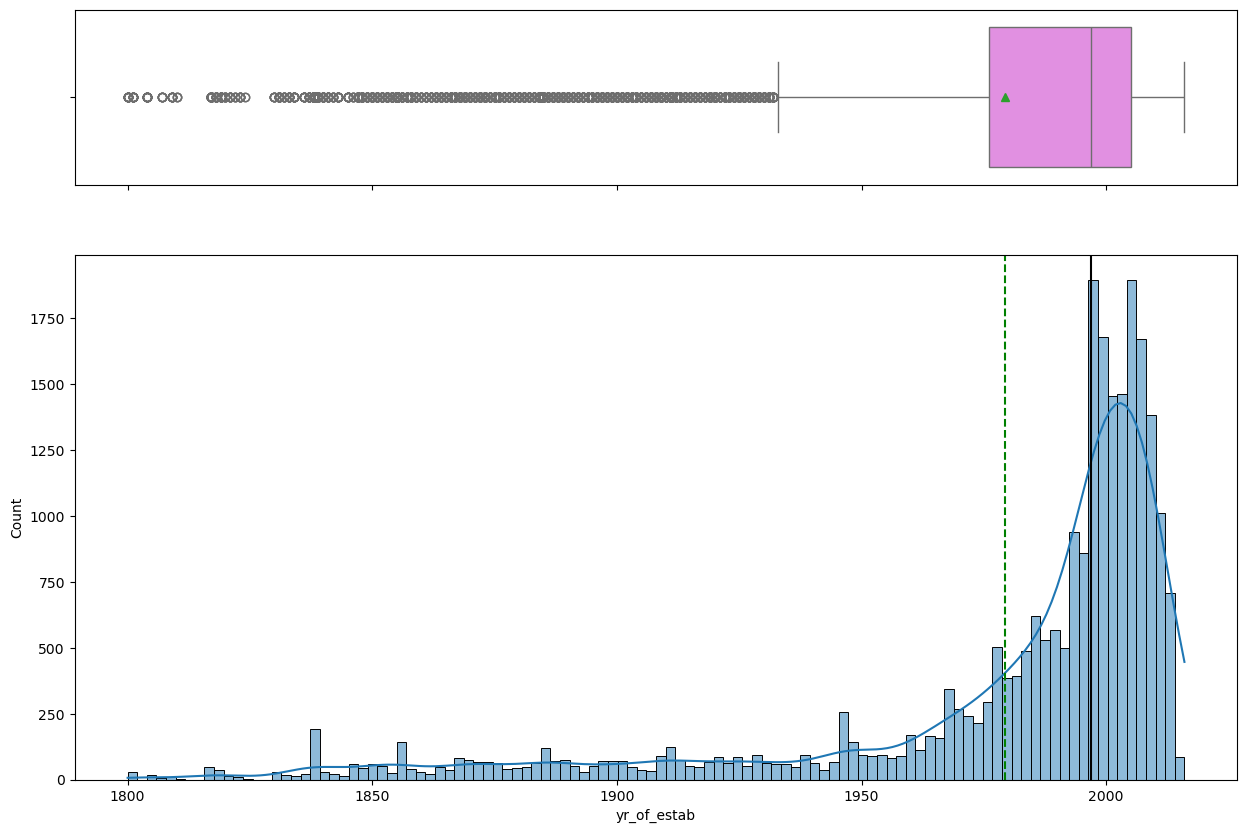

In [40]:
histogram_boxplot(data=raw_df, feature='yr_of_estab', figsize=(15, 10), kde=True, bins=None)

There are a lot more newer companies in this dataset.

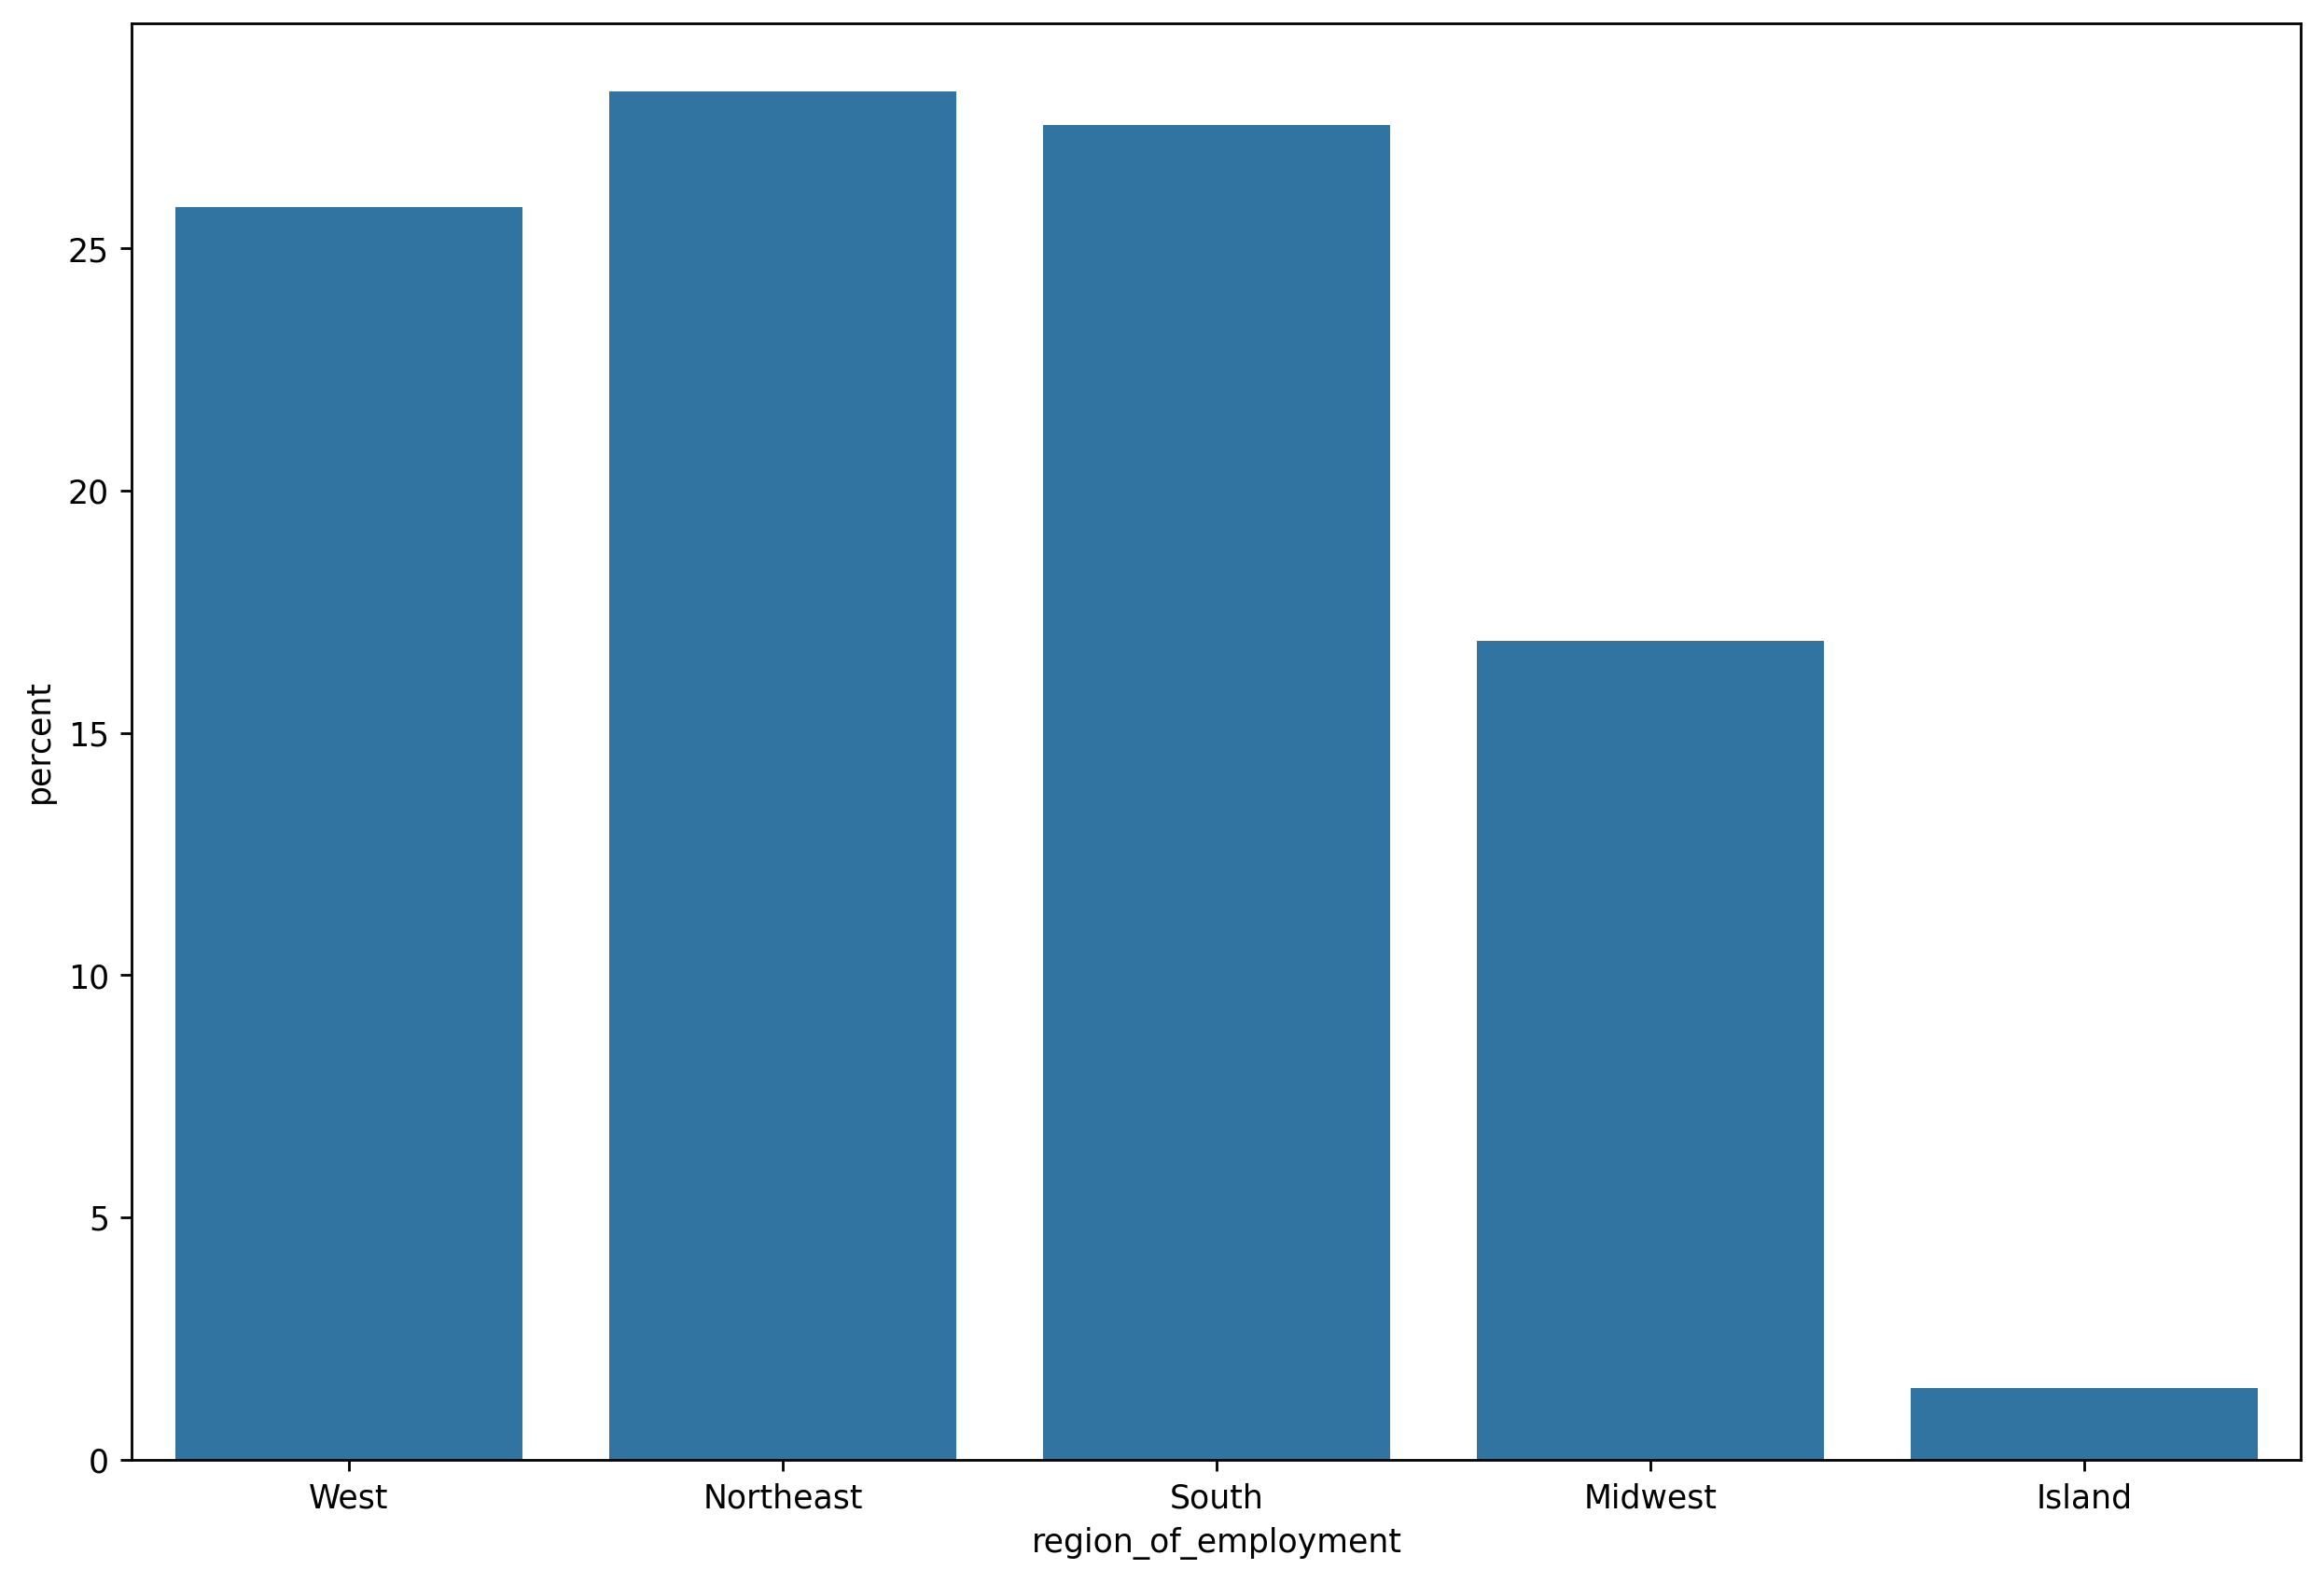

In [42]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='region_of_employment', stat='percent');

The areas of employment seem fairly well balanced in proportion to their populations.

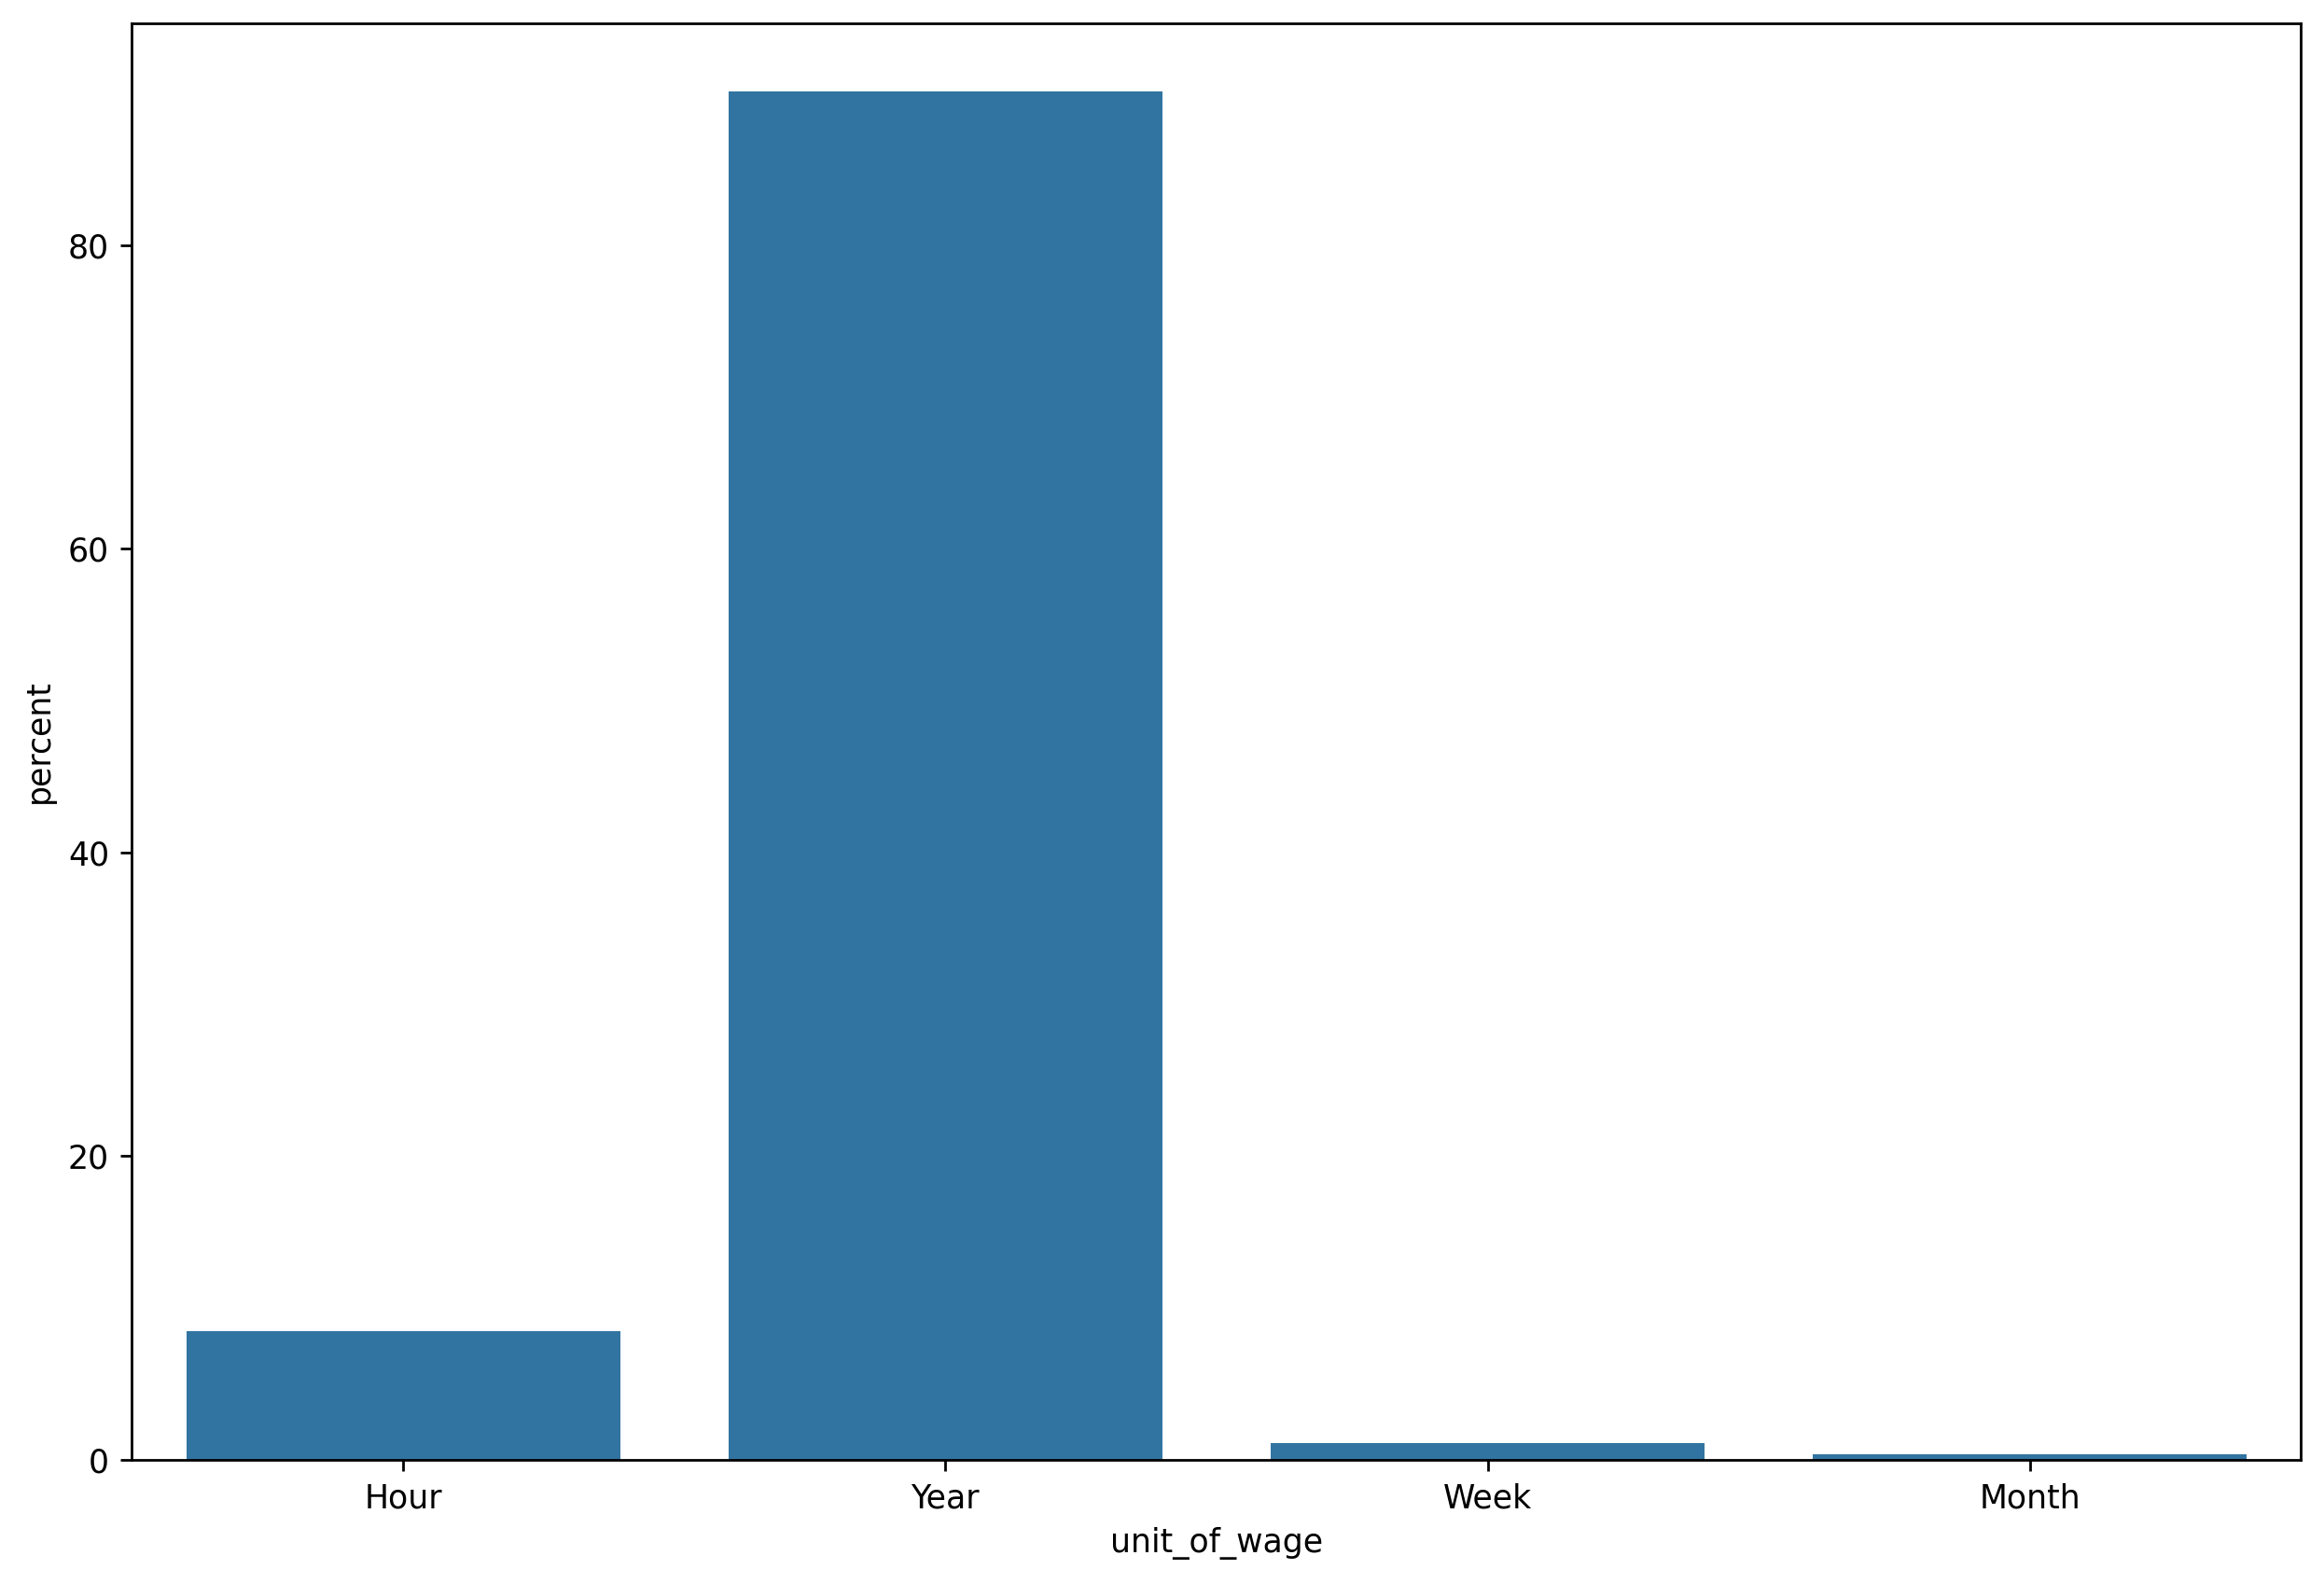

In [44]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='unit_of_wage', stat='percent');

An imbalanced dataset, about 90% for the positions are paid on an annual basis. It would be best to convert this feature to status; hourly = non-exempt, and all others exempt. 

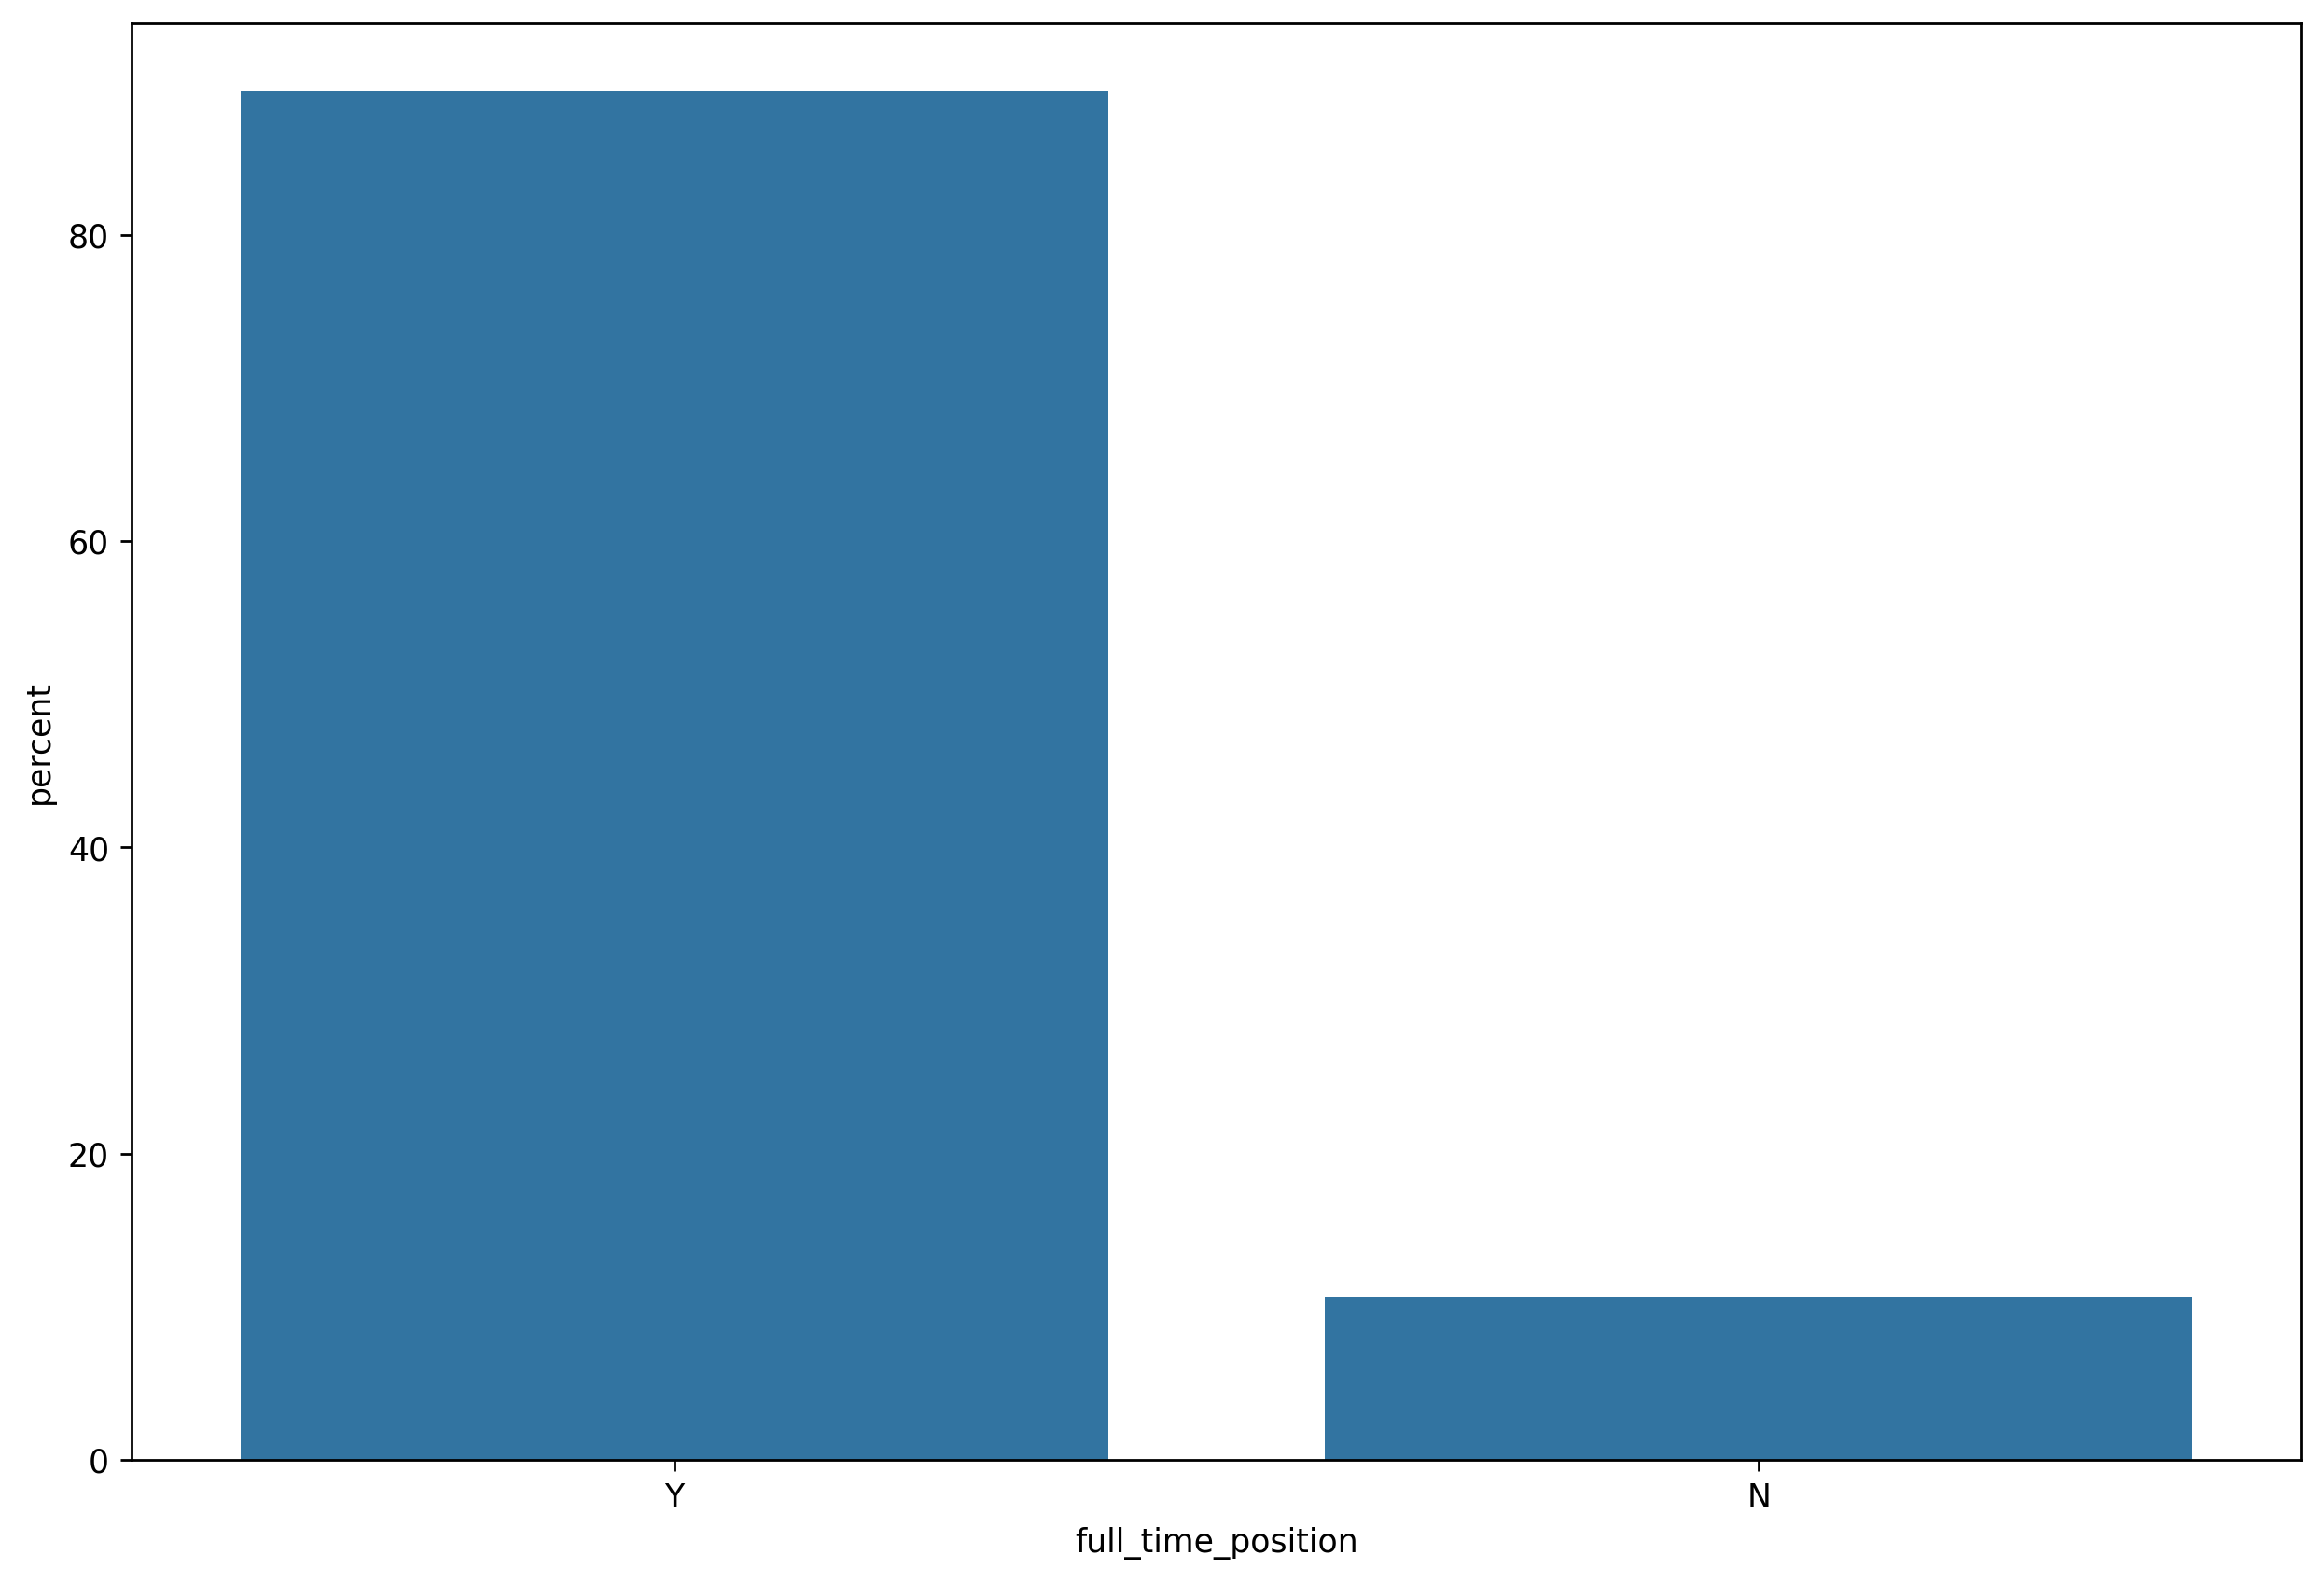

In [46]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='full_time_position', stat='percent');

Most of the positions are full time, seems correct since it would be odd for an employer to sponsor a visa for a part time position if there is a program that would permit that. 

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

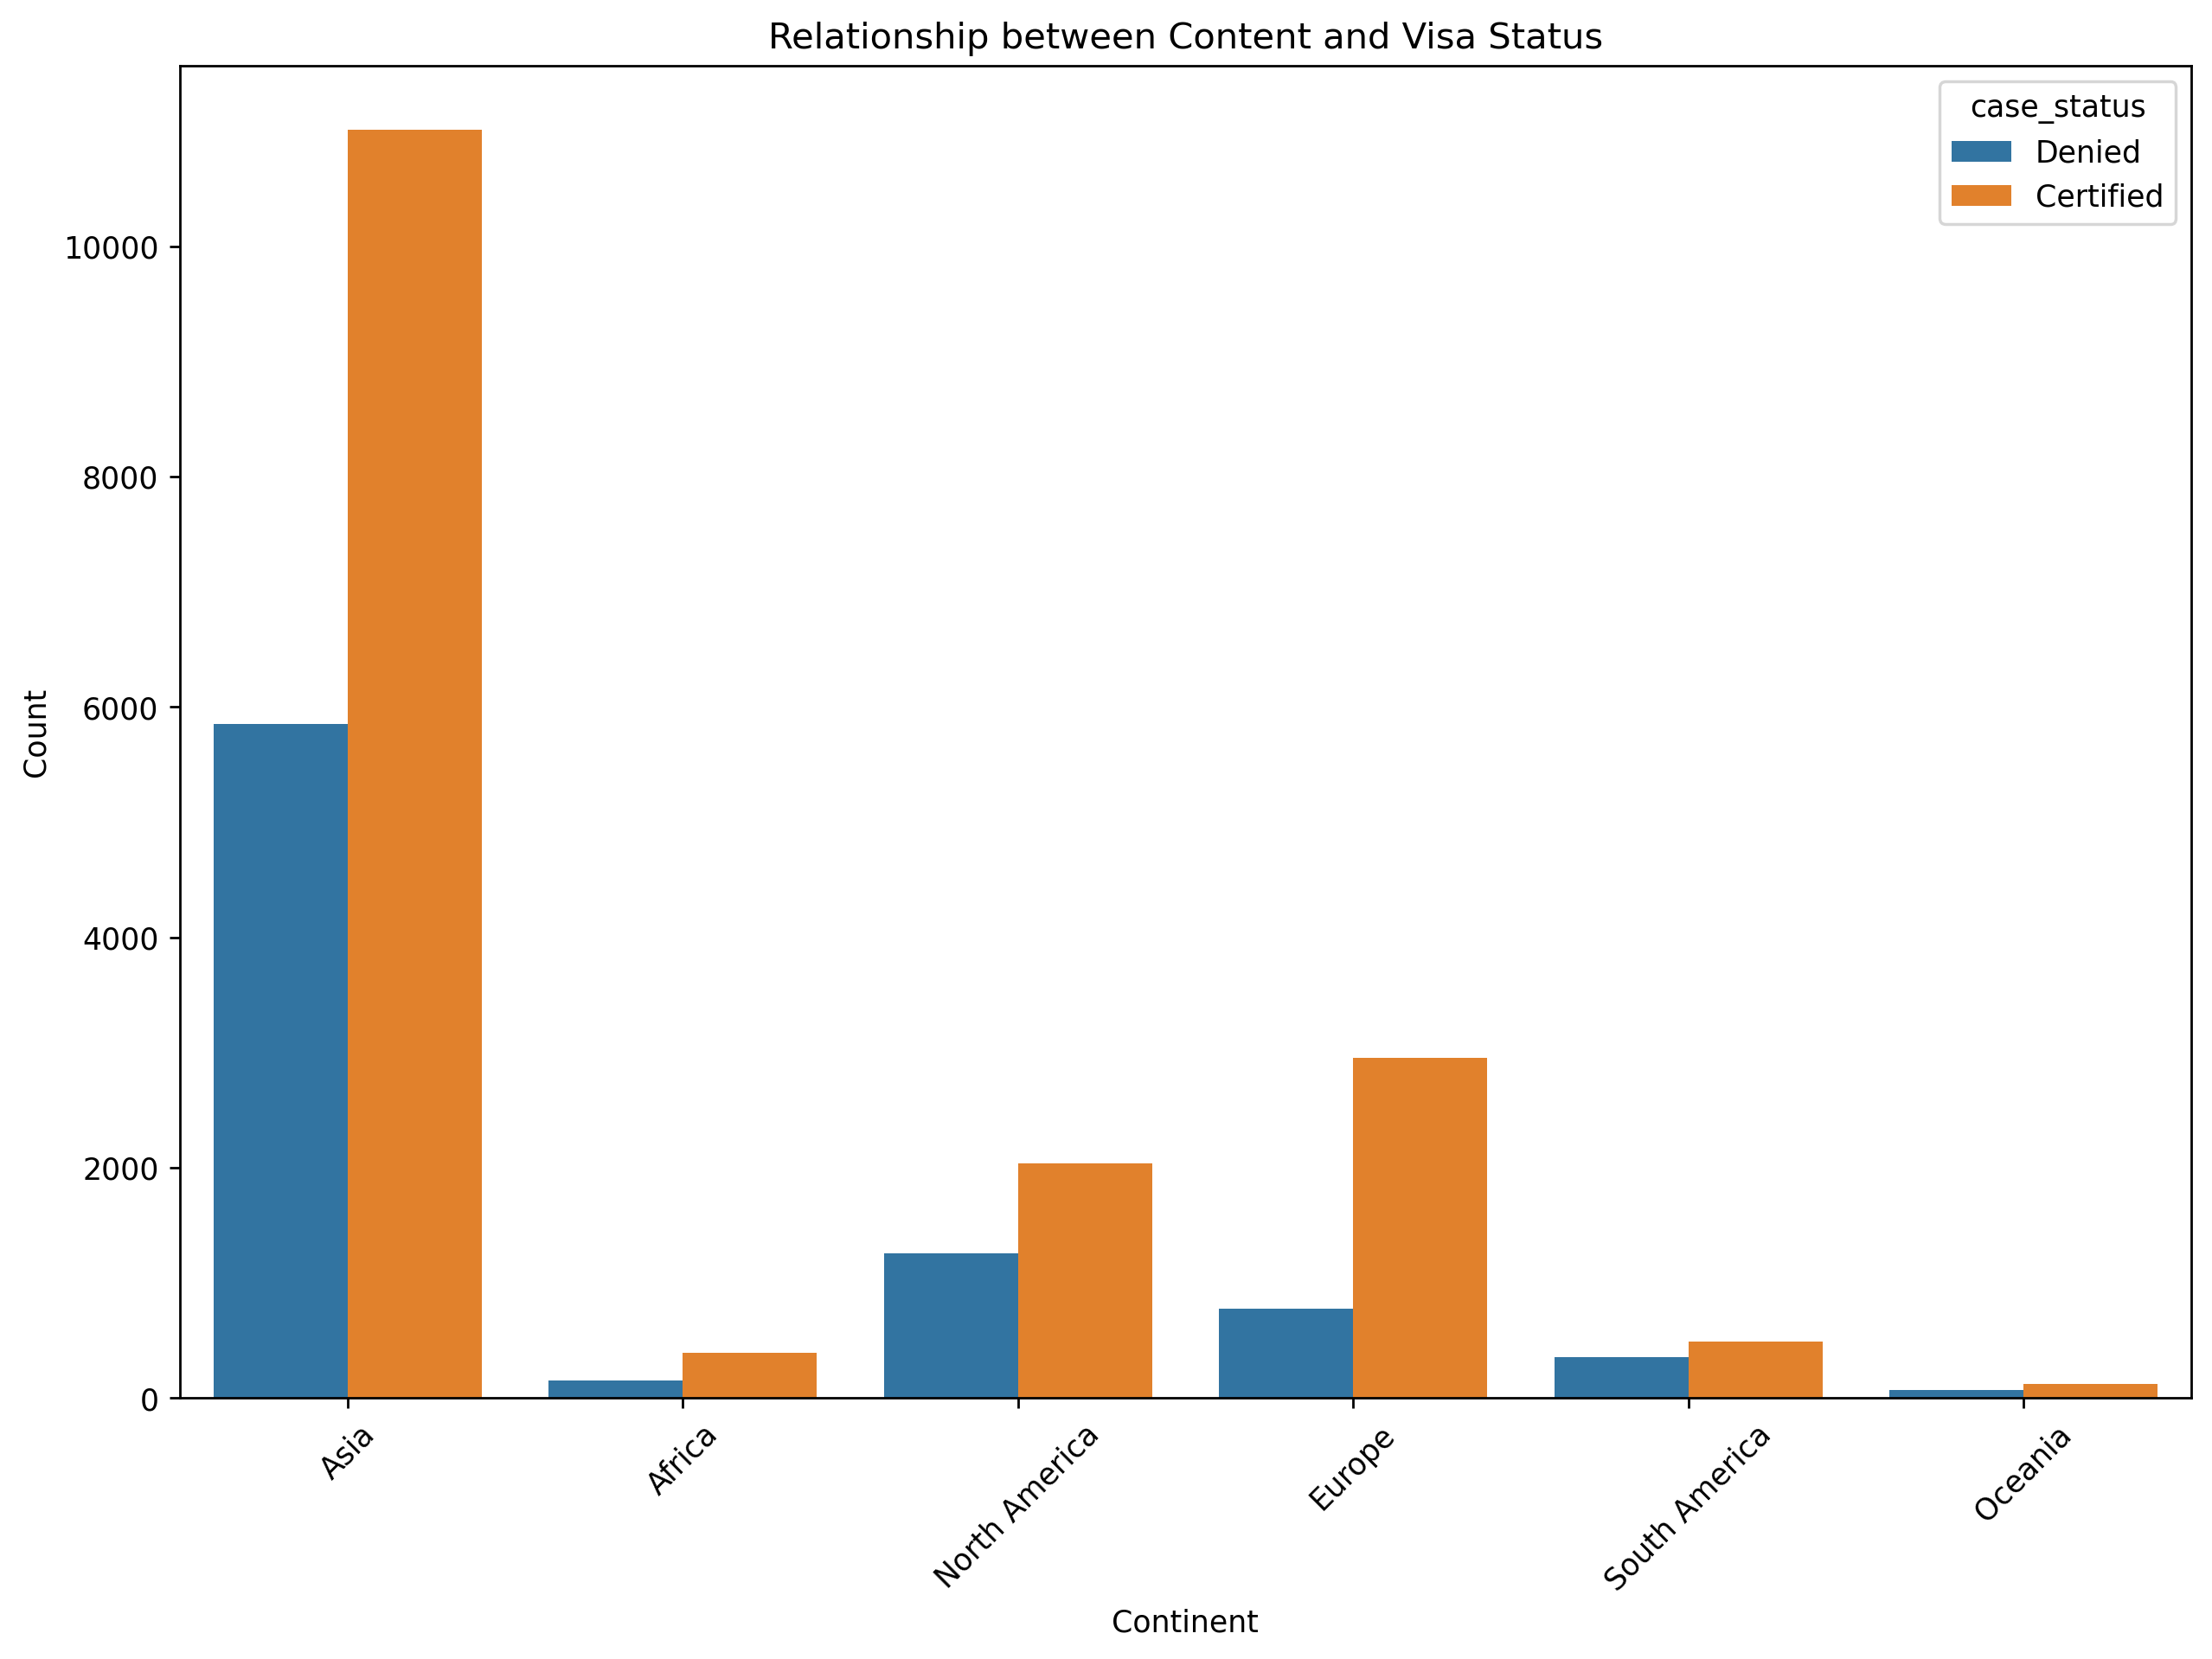

In [49]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(x='continent', hue='case_status', data=raw_df)
plt.title('Relationship between Content and Visa Status')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45);

North and South Amnerica have the highest approval rates, all other continents are below 50%.

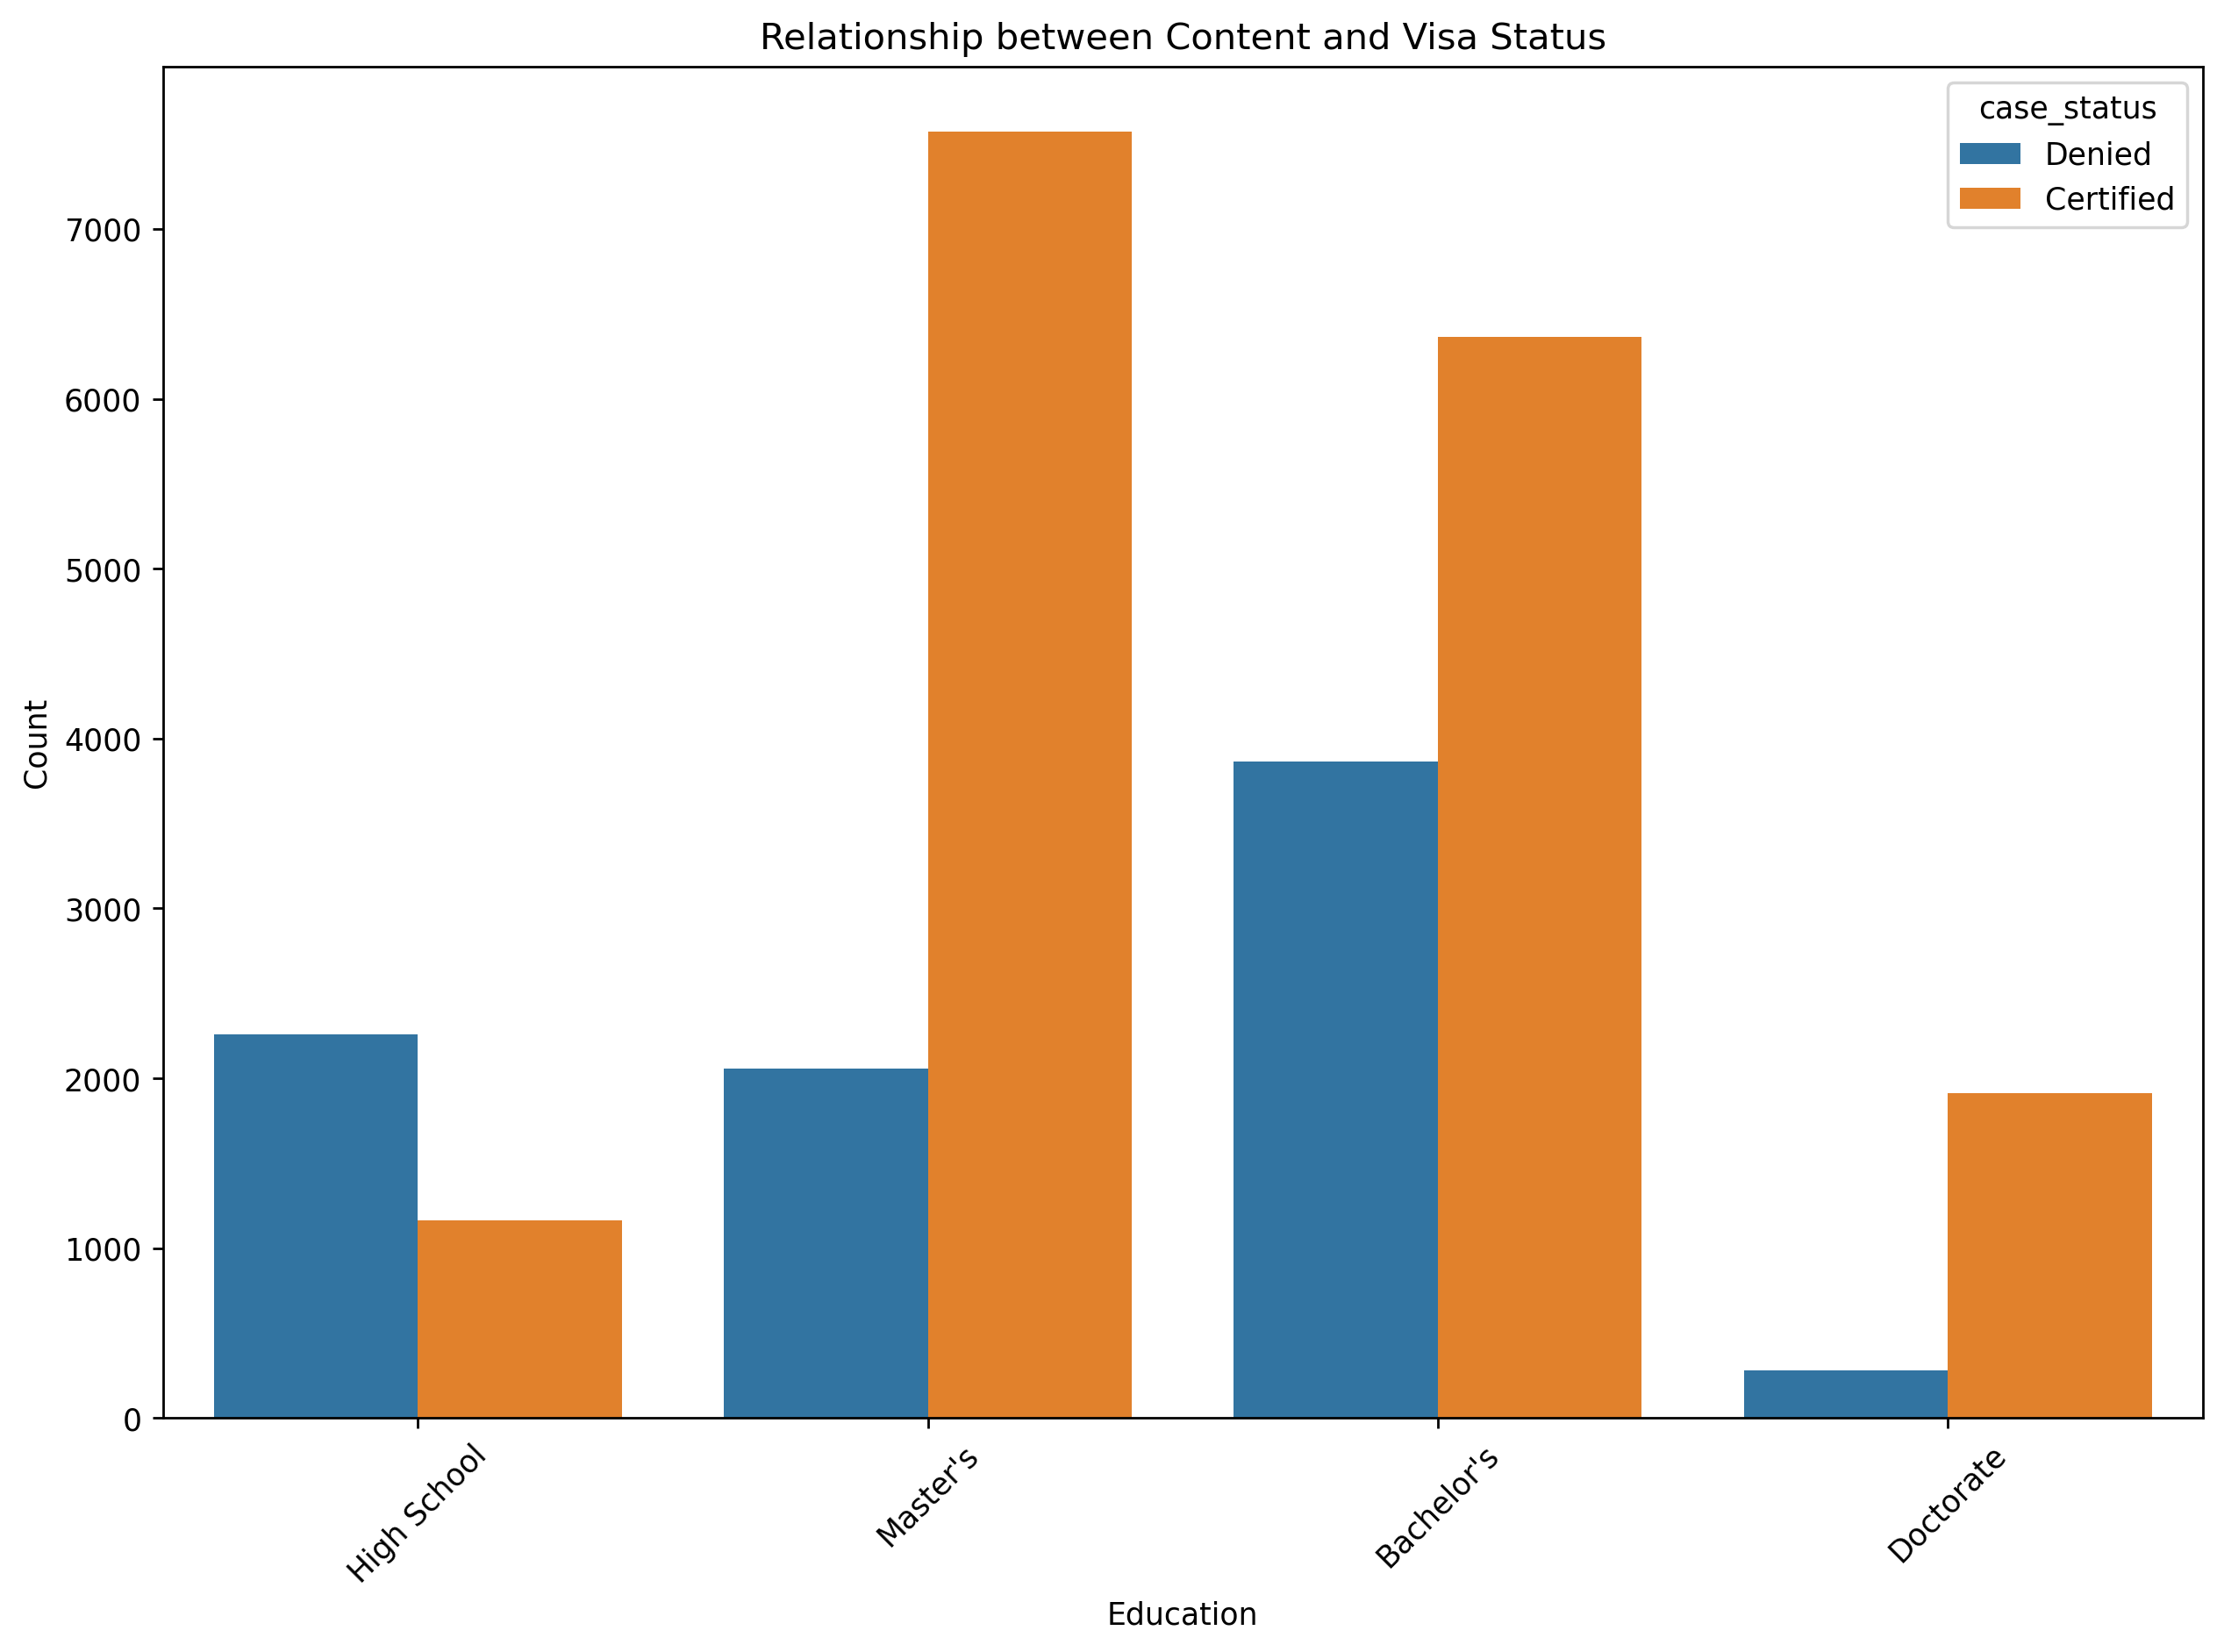

In [51]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(x='education_of_employee', hue='case_status', data=raw_df)
plt.title('Relationship between Content and Visa Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45);

Yes, higher levels of education mean higher rates of certification.

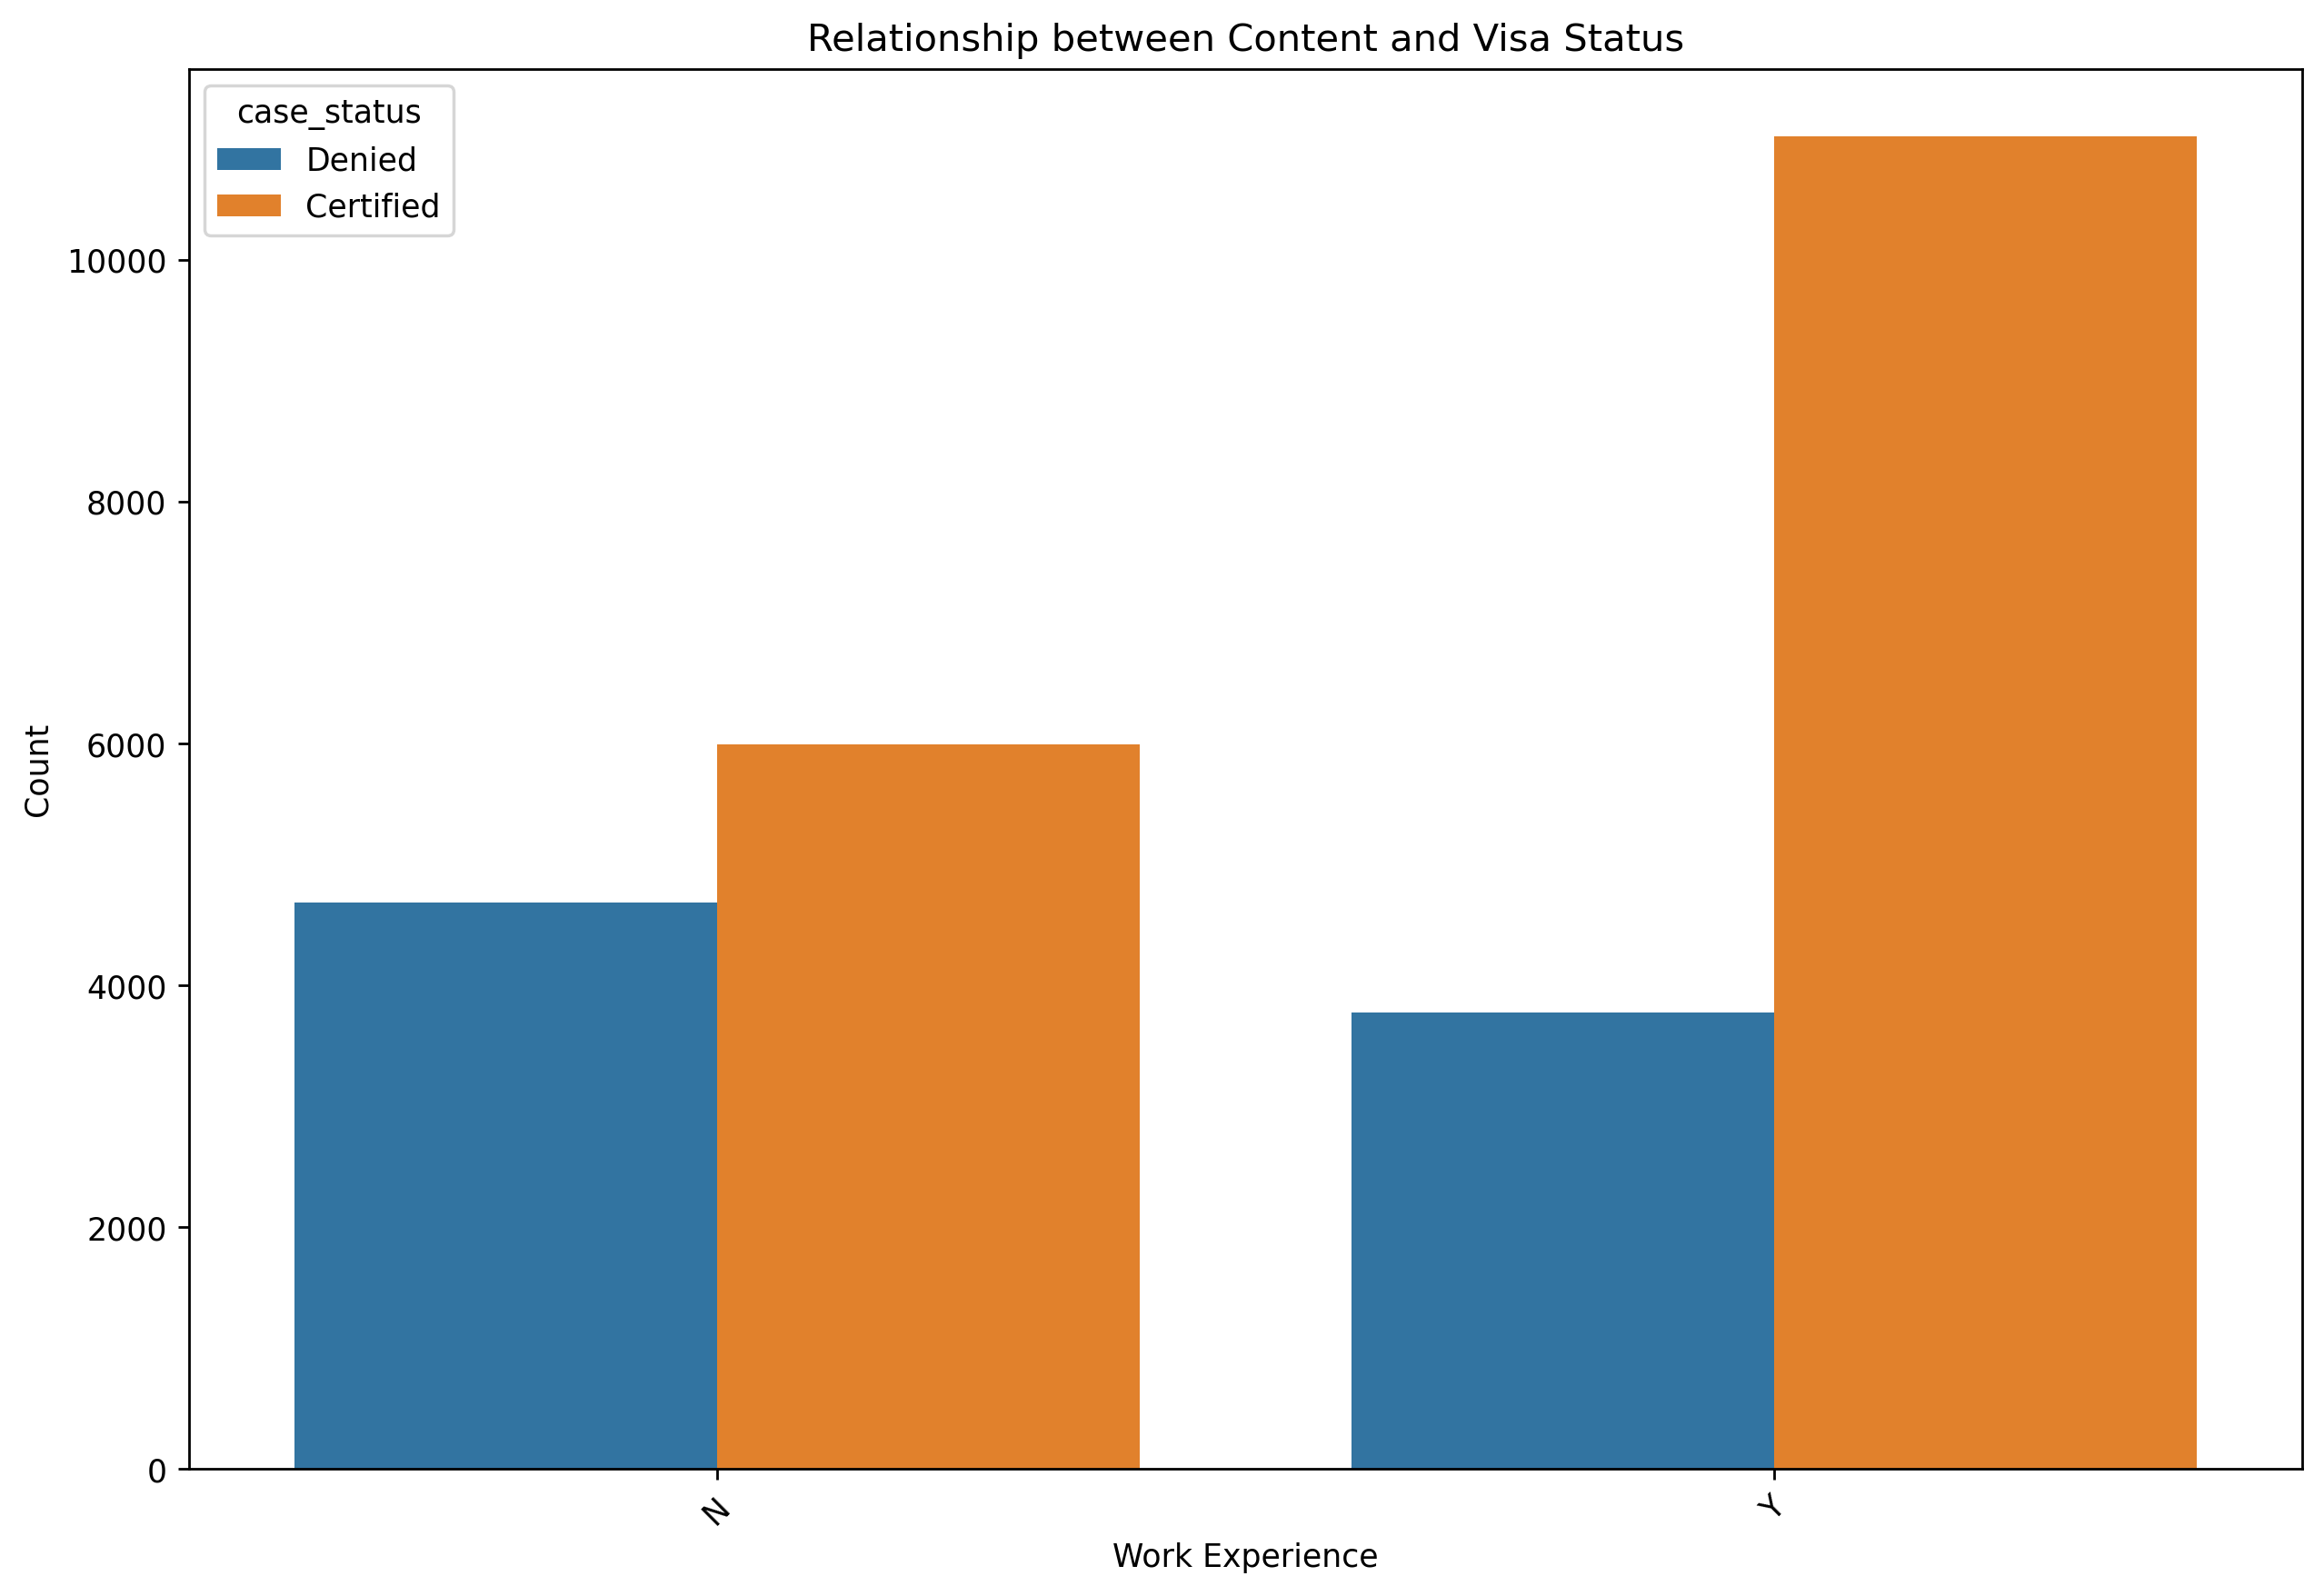

In [53]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(x='has_job_experience', hue='case_status', data=raw_df)
plt.title('Relationship between Content and Visa Status')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.xticks(rotation=45);

Yes, work expereince improves the chances of certification.

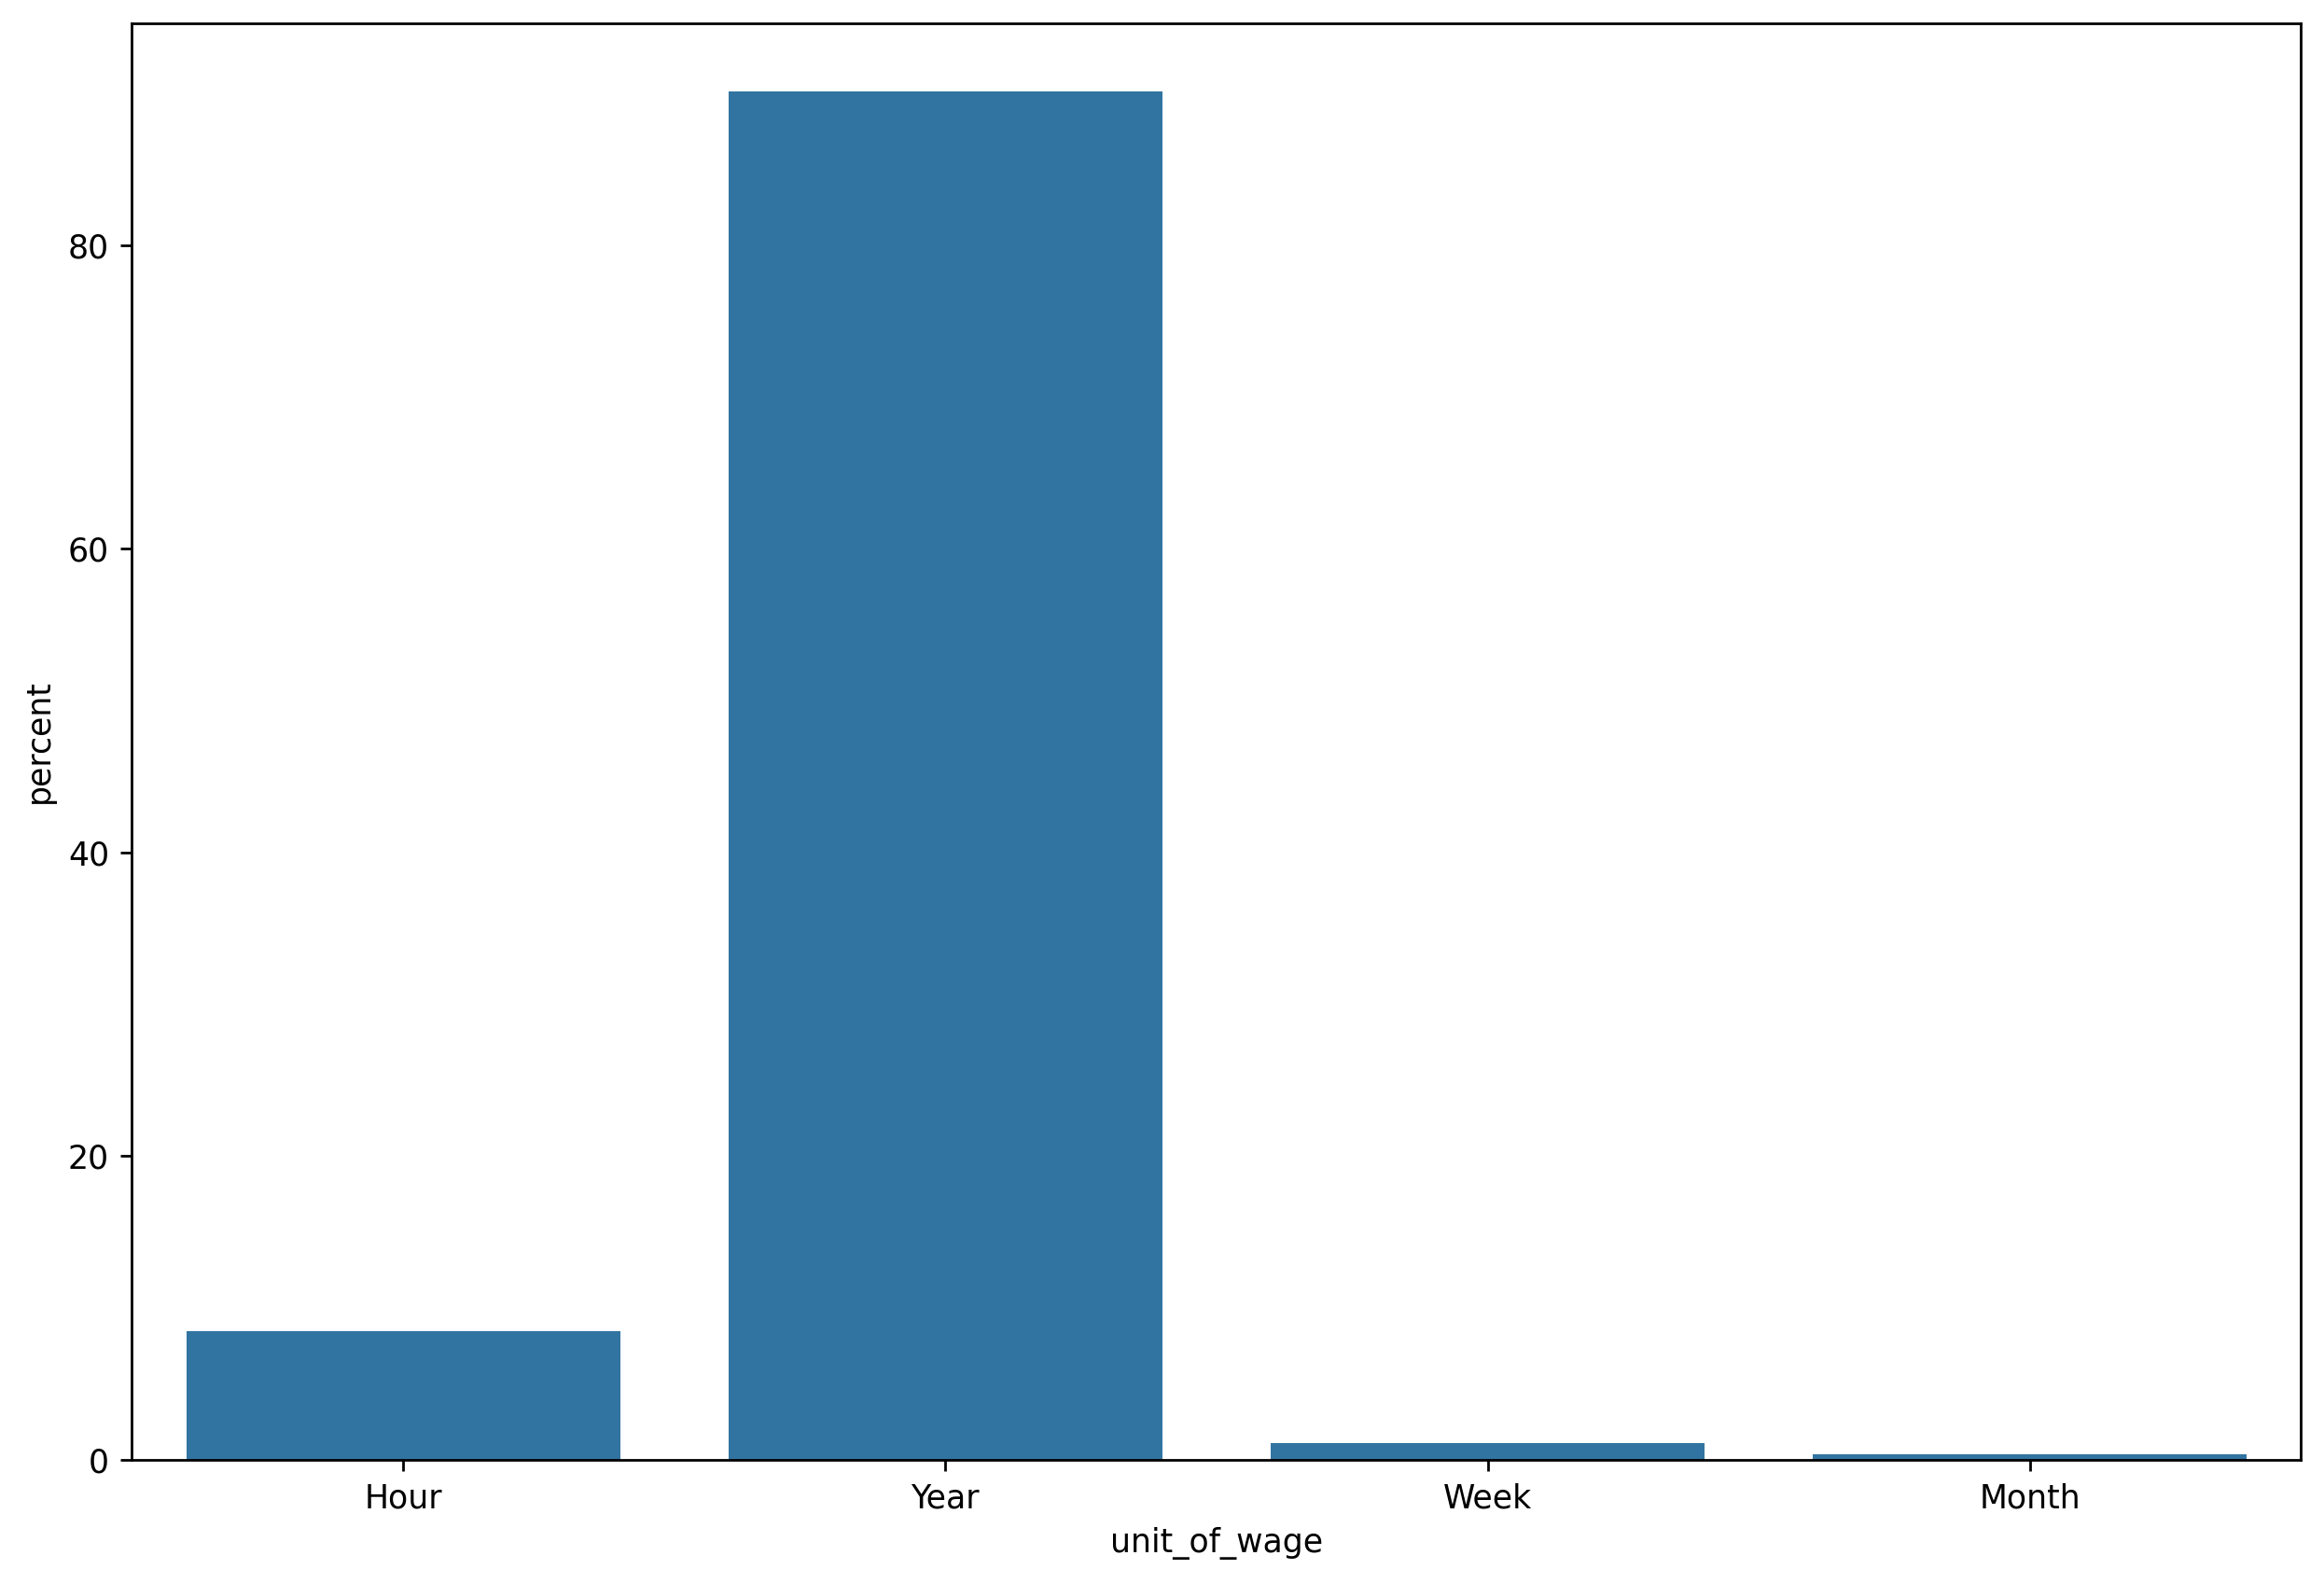

In [55]:
plt.figure(figsize=(12,8), dpi=250)
sns.countplot(data=raw_df, x='unit_of_wage', stat='percent');

Most certified visas will be paid on an annual basis. 

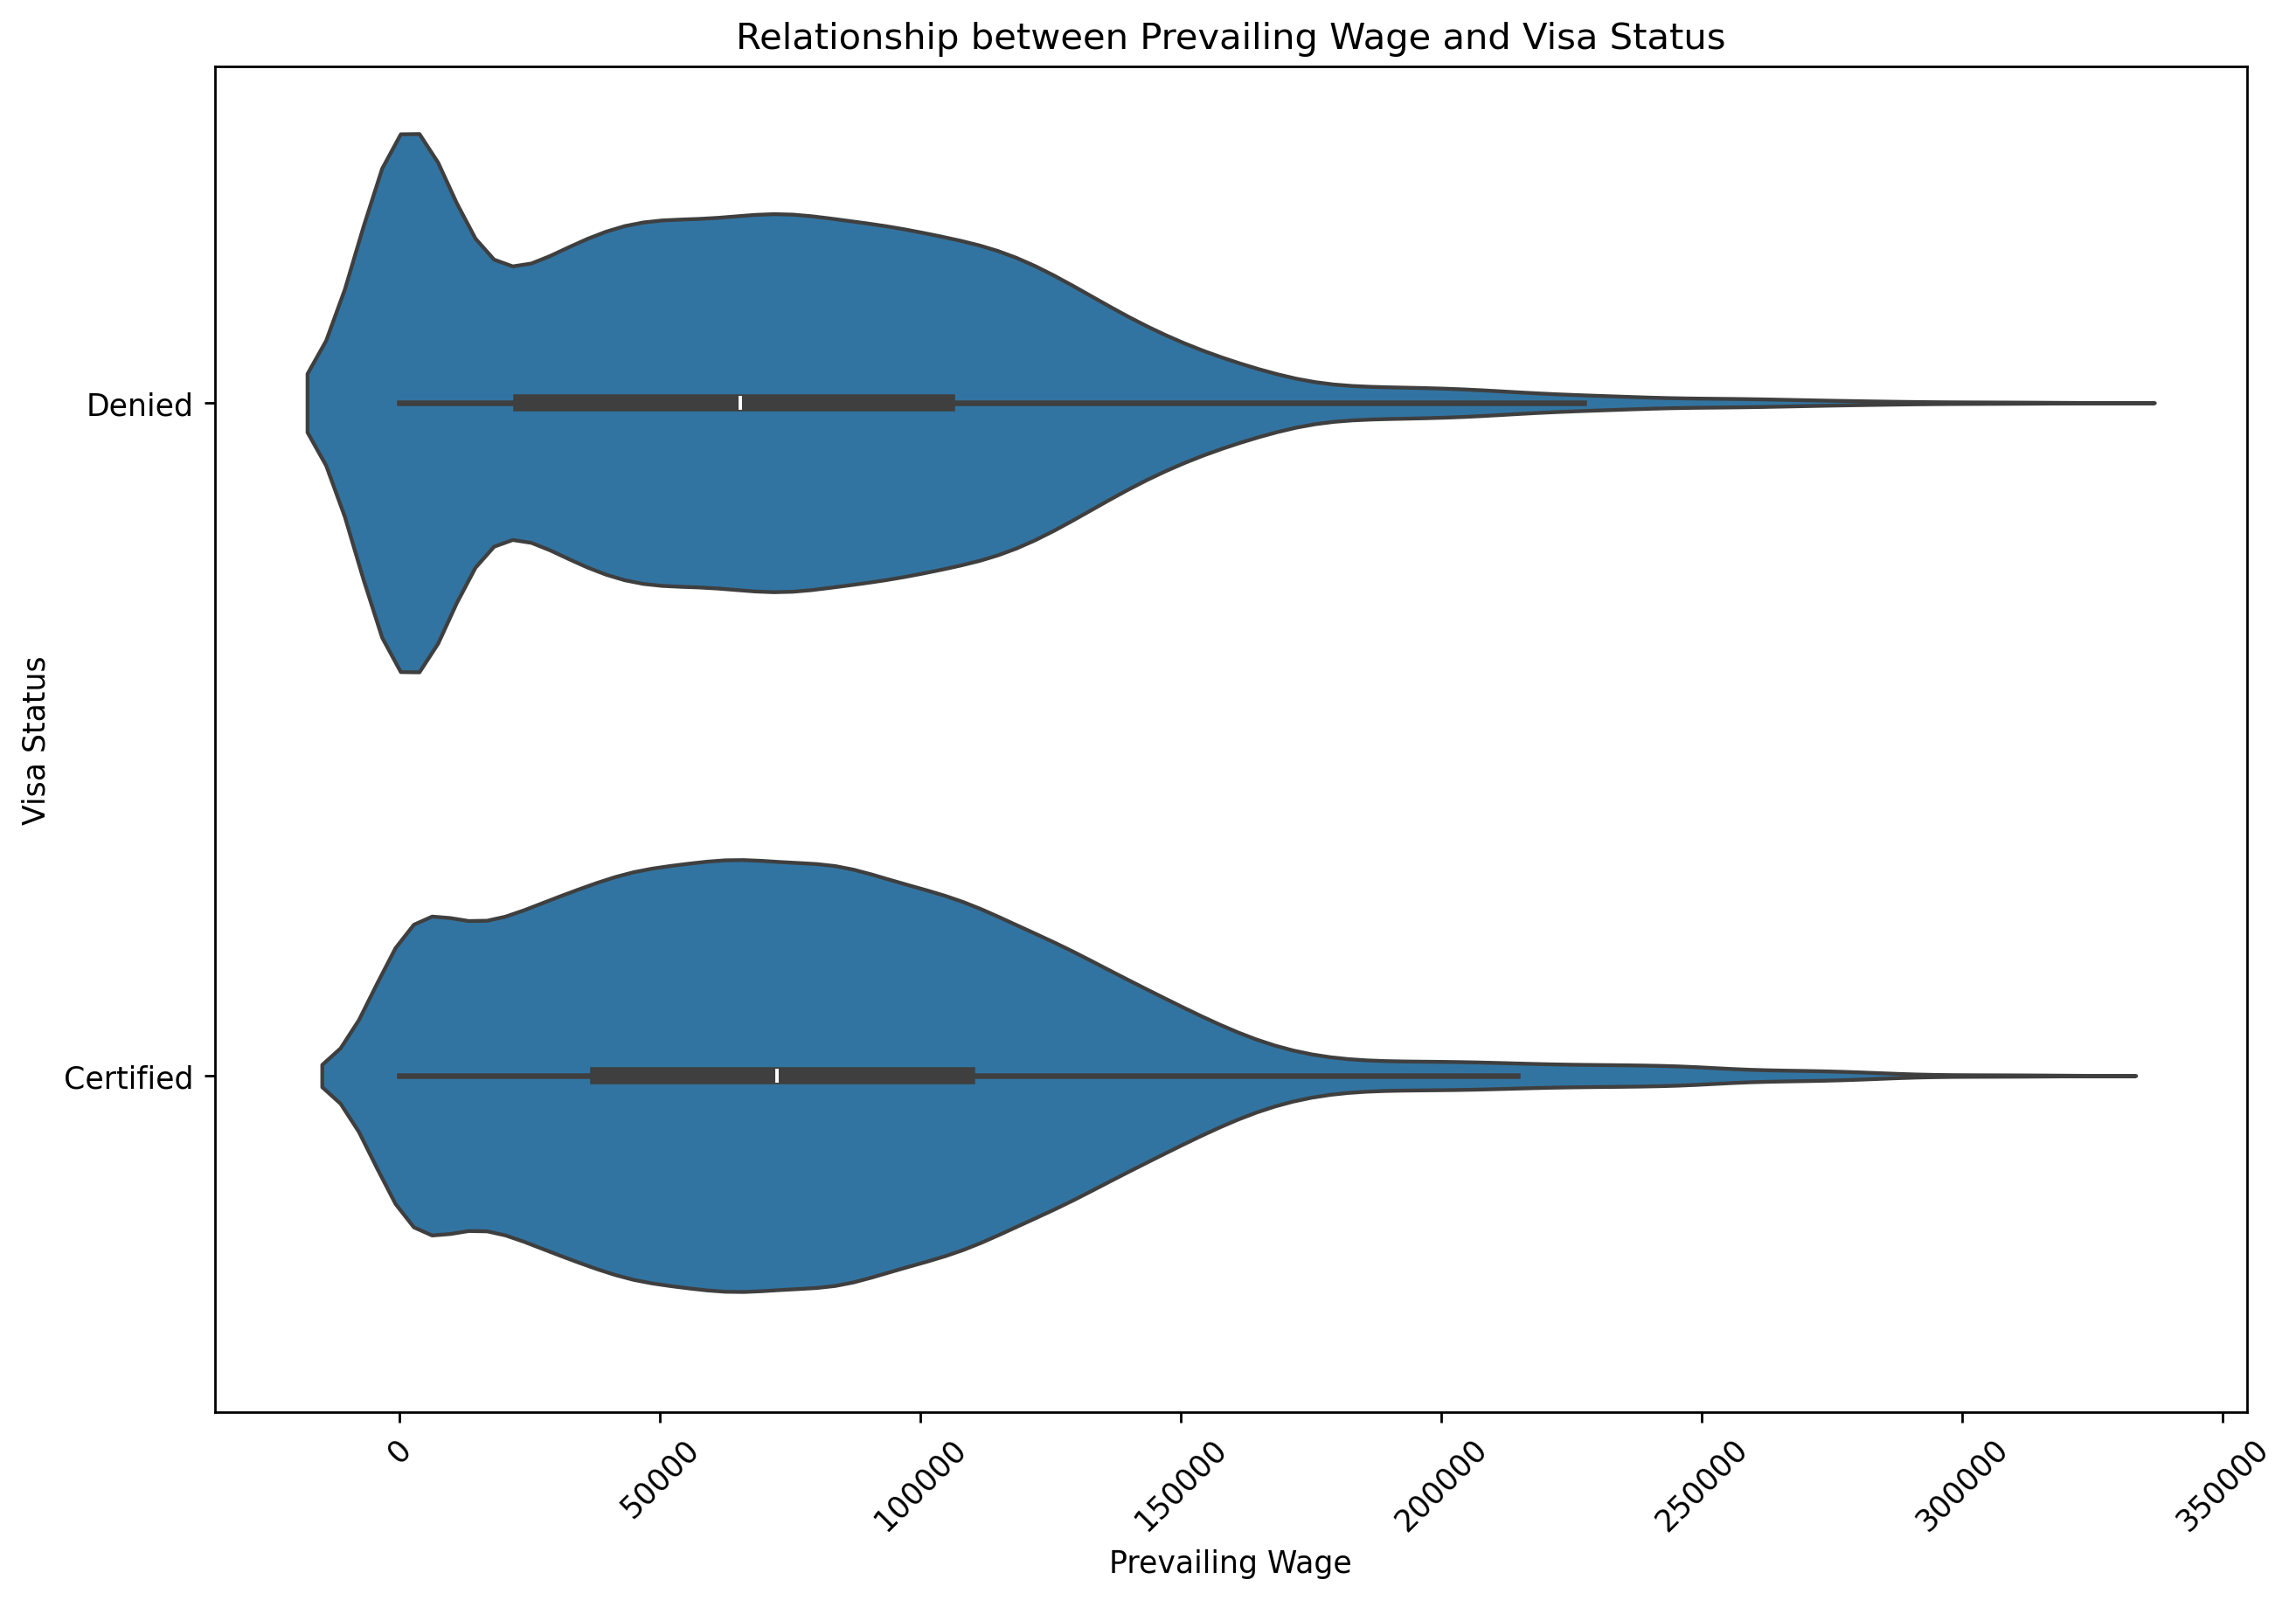

In [57]:
plt.figure(figsize=(12,8), dpi=250)
sns.violinplot(x='prevailing_wage', y='case_status', data=raw_df)
plt.title('Relationship between Prevailing Wage and Visa Status')
plt.xlabel('Prevailing Wage')
plt.ylabel('Visa Status')
plt.xticks(rotation=45);

I see little relationship betwen prevailing_wage and case_sattus

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Values

In [61]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  object  
 1   education_of_employee  25480 non-null  object  
 2   has_job_experience     25480 non-null  object  
 3   requires_job_training  25480 non-null  object  
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  object  
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  object  
 9   full_time_position     25480 non-null  object  
 10  case_status            25480 non-null  object  
 11  Wage_Group             25480 non-null  category
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


No missing values.

In [63]:
tree_df = raw_df.copy()

In [64]:
tree_df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Wage_Group
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,"(-317.071, 63843.763]"
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,"(63843.763, 127685.39]"
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,"(63843.763, 127685.39]"
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,"(63843.763, 127685.39]"
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,"(127685.39, 191527.017]"


In [65]:
tree_df = pd.concat([tree_df, pd.get_dummies(tree_df['continent'], prefix='continent')], axis=1)
tree_df = tree_df.drop('continent', axis=1)

In [66]:
tree_df = pd.concat([tree_df, pd.get_dummies(tree_df['education_of_employee'], prefix='education')], axis=1)
tree_df = tree_df.drop('education_of_employee', axis=1)

In [67]:
label_encoder = LabelEncoder()
tree_df['has_job_experience_encoded'] = label_encoder.fit_transform(tree_df['has_job_experience'])
tree_df['requires_job_training_encoded'] = label_encoder.fit_transform(tree_df['requires_job_training'])
tree_df = tree_df.drop(['requires_job_training', 'has_job_experience'], axis=1)

In [68]:
tree_df = pd.concat([tree_df, pd.get_dummies(tree_df['region_of_employment'], prefix='region')], axis=1)
tree_df = tree_df.drop('region_of_employment', axis=1)

In [69]:
tree_df['full_time_position'] = label_encoder.fit_transform(tree_df['full_time_position'])
tree_df = tree_df.drop(['full_time_position'], axis=1)

In [70]:
tree_df['case_status'] = label_encoder.fit_transform(tree_df['case_status'])

In [71]:
tree_df.head()

,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,case_status,Wage_Group,continent_Africa,continent_Asia,continent_Europe,continent_North America,...,education_Doctorate,education_High School,education_Master's,has_job_experience_encoded,requires_job_training_encoded,region_Island,region_Midwest,region_Northeast,region_South,region_West
0,14513,2007,592.2029,Hour,1,"(-317.071, 63843.763]",False,True,False,False,...,False,True,False,0,0,False,False,False,False,True
1,2412,2002,83425.6500,Year,0,"(63843.763, 127685.39]",False,True,False,False,...,False,False,True,1,0,False,False,True,False,False
2,44444,2008,122996.8600,Year,1,"(63843.763, 127685.39]",False,True,False,False,...,False,False,False,0,1,False,False,False,False,True
3,98,1897,83434.0300,Year,1,"(63843.763, 127685.39]",False,True,False,False,...,False,False,False,0,0,False,False,False,False,True
4,1082,2005,149907.3900,Year,0,"(127685.39, 191527.017]",True,False,False,False,...,False,False,True,1,0,False,False,False,True,False


In [72]:
tree_df = pd.concat([tree_df, pd.get_dummies(tree_df['unit_of_wage'], prefix='unit_of_wage')], axis=1)
tree_df = tree_df.drop('unit_of_wage', axis=1)

In [73]:
tree_df = tree_df.drop(['Wage_Group'], axis=1)

In [74]:
# tree_df.head()

#### Outliers

In [76]:
# Outliers capped at 3 standard deviations
mean = tree_df['no_of_employees'].mean()
std = tree_df['no_of_employees'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

tree_df['no_of_employees'] = np.where(tree_df['no_of_employees'] > upper_bound, upper_bound, tree_df['no_of_employees'])
tree_df['no_of_employees'] = np.where(tree_df['no_of_employees'] < lower_bound, lower_bound, tree_df['no_of_employees'])

In [77]:
tree_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,4486.01,11106.51,-26.00,1022.00,2109.00,3504.00,74300.83
yr_of_estab,25480.0,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.0,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27
case_status,25480.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00
has_job_experience_encoded,25480.0,0.58,0.49,0.00,0.00,1.00,1.00,1.00
requires_job_training_encoded,25480.0,0.12,0.32,0.00,0.00,0.00,0.00,1.00


In [78]:
raw_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.04,22877.93,-26.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.0,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.0,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27


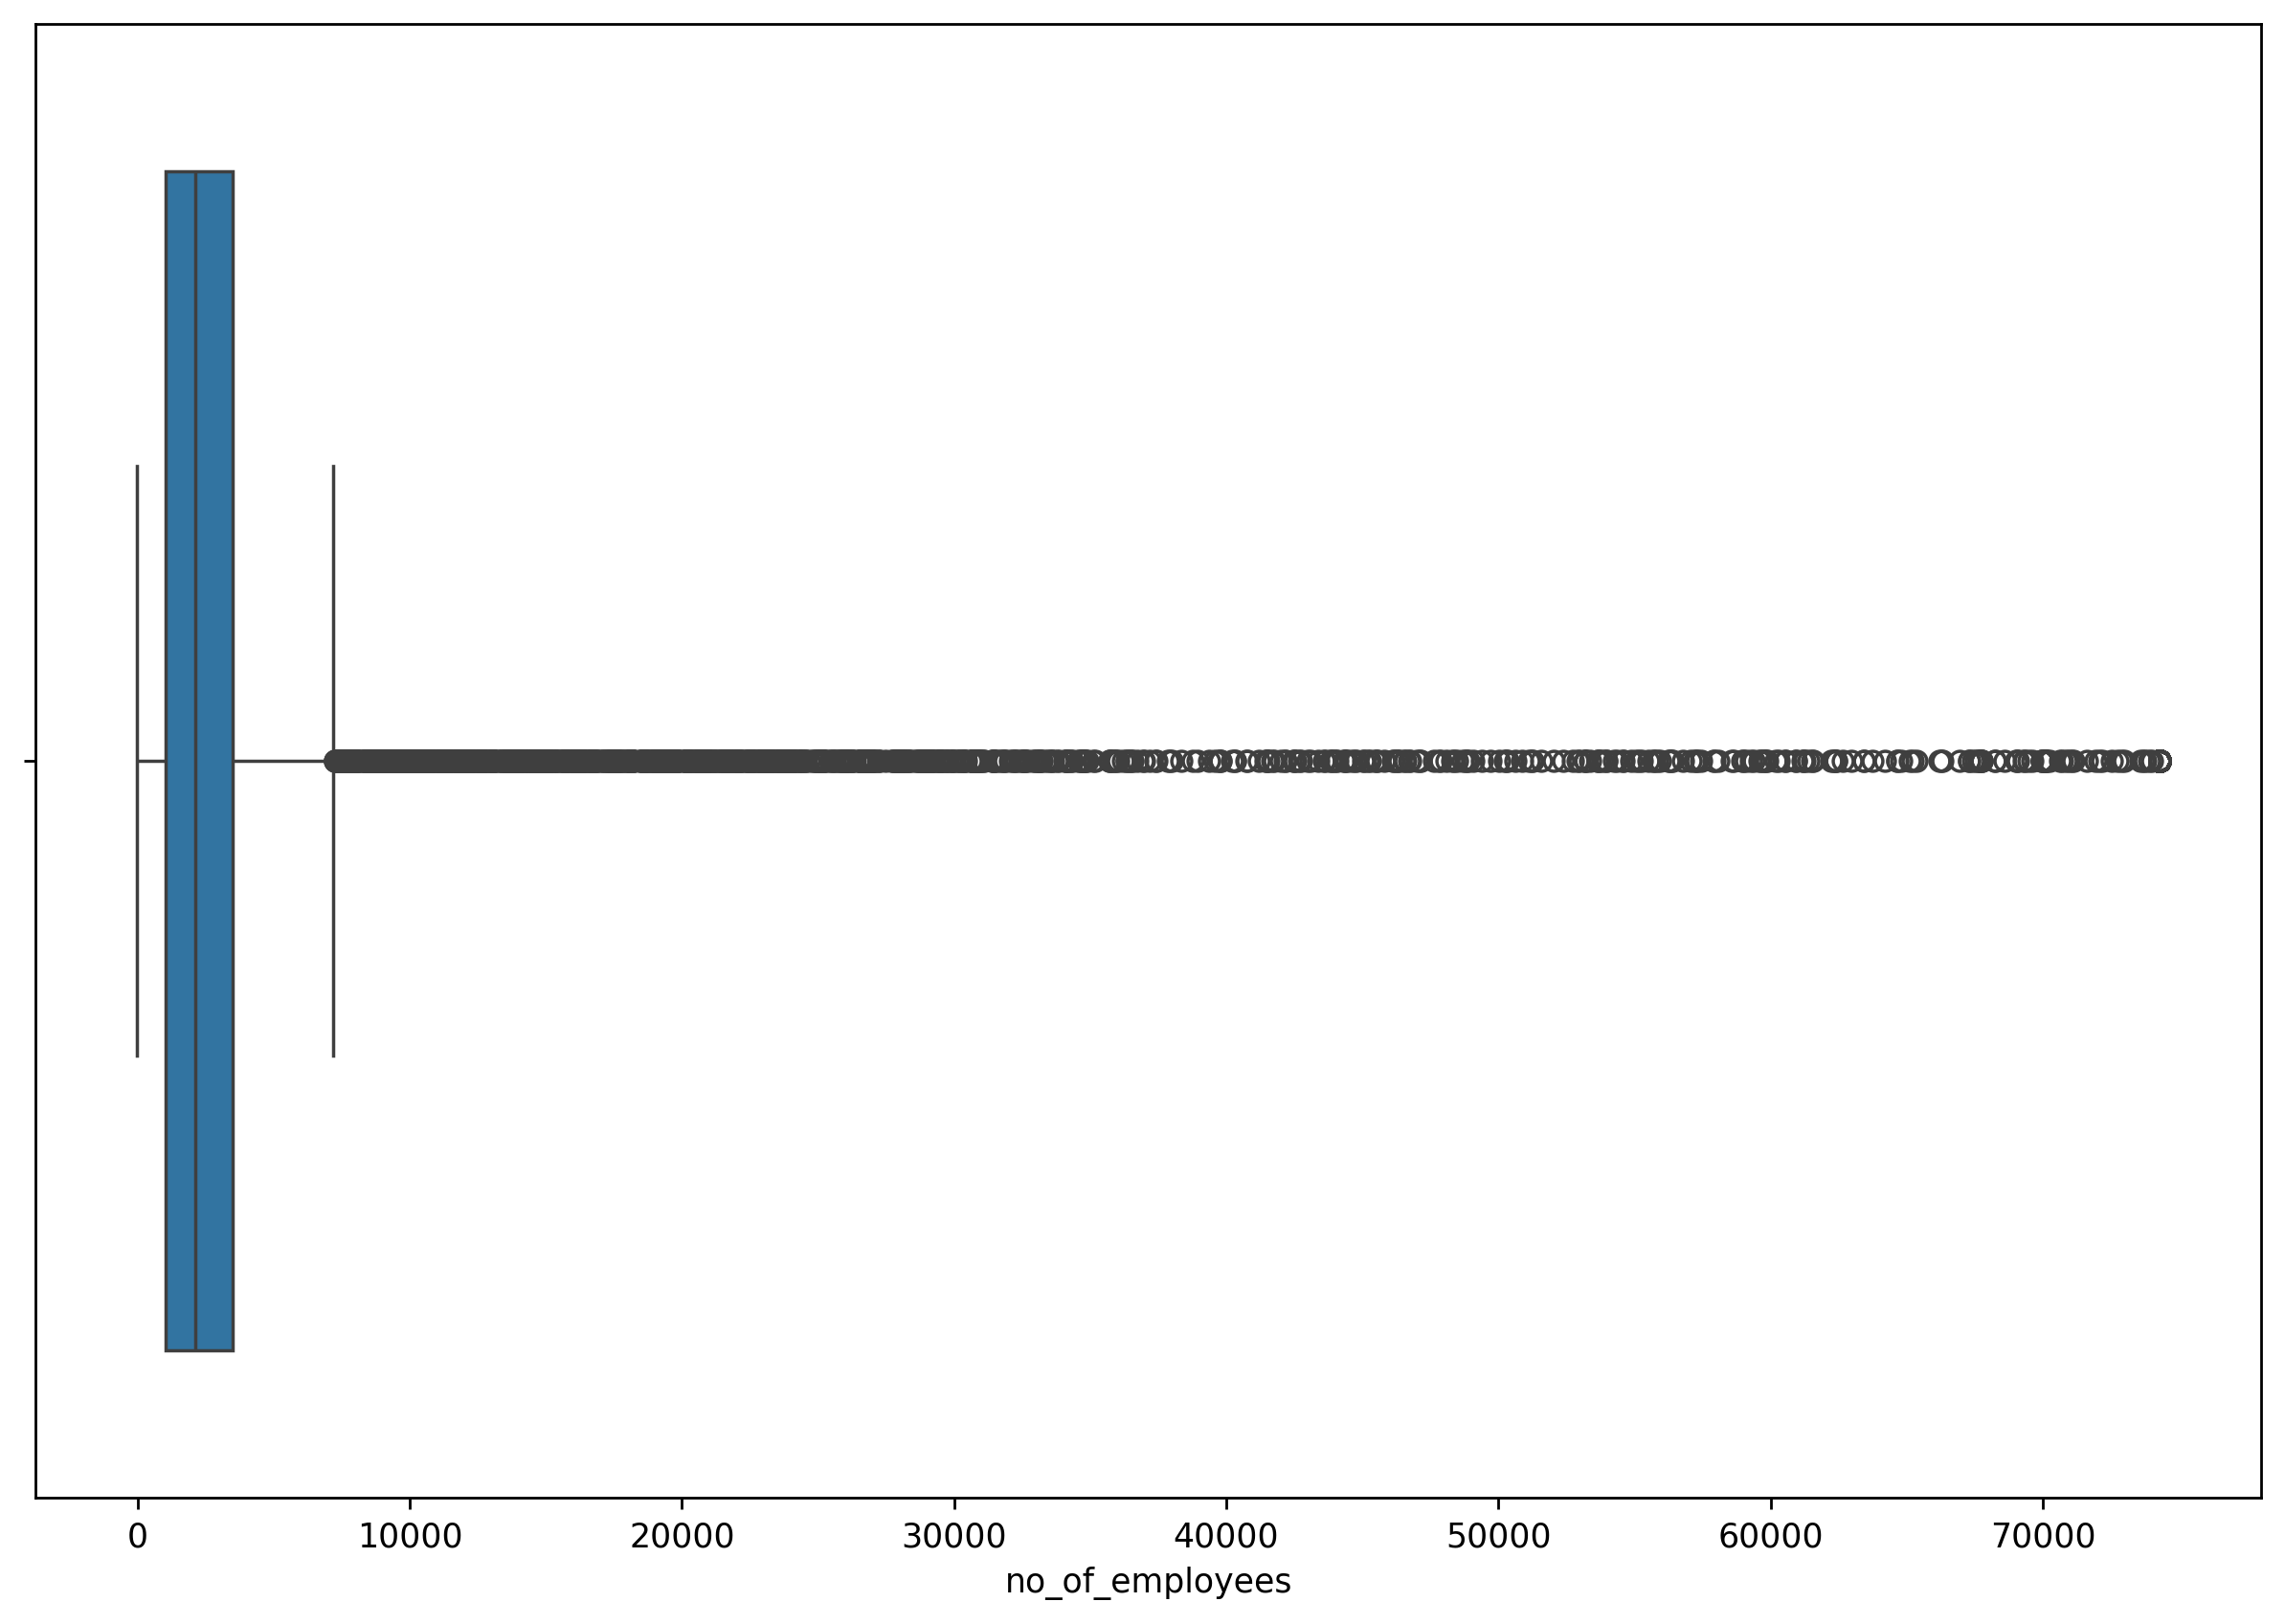

In [79]:
plt.figure(figsize=(12,8), dpi=250)
sns.boxplot(data=tree_df, x='no_of_employees');

Capping the outliers has improved the no_of_employees feature but I still have values that are negative. The maximum value has been reduced to 20,791. 

In [81]:
# Outliers capped at 3 standard deviations
mean = tree_df['prevailing_wage'].mean()
std = tree_df['prevailing_wage'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

tree_df['prevailing_wage'] = np.where(tree_df['prevailing_wage'] > upper_bound, upper_bound, tree_df['prevailing_wage'])
tree_df['prevailing_wage'] = np.where(tree_df['prevailing_wage'] < lower_bound, lower_bound, tree_df['prevailing_wage'])

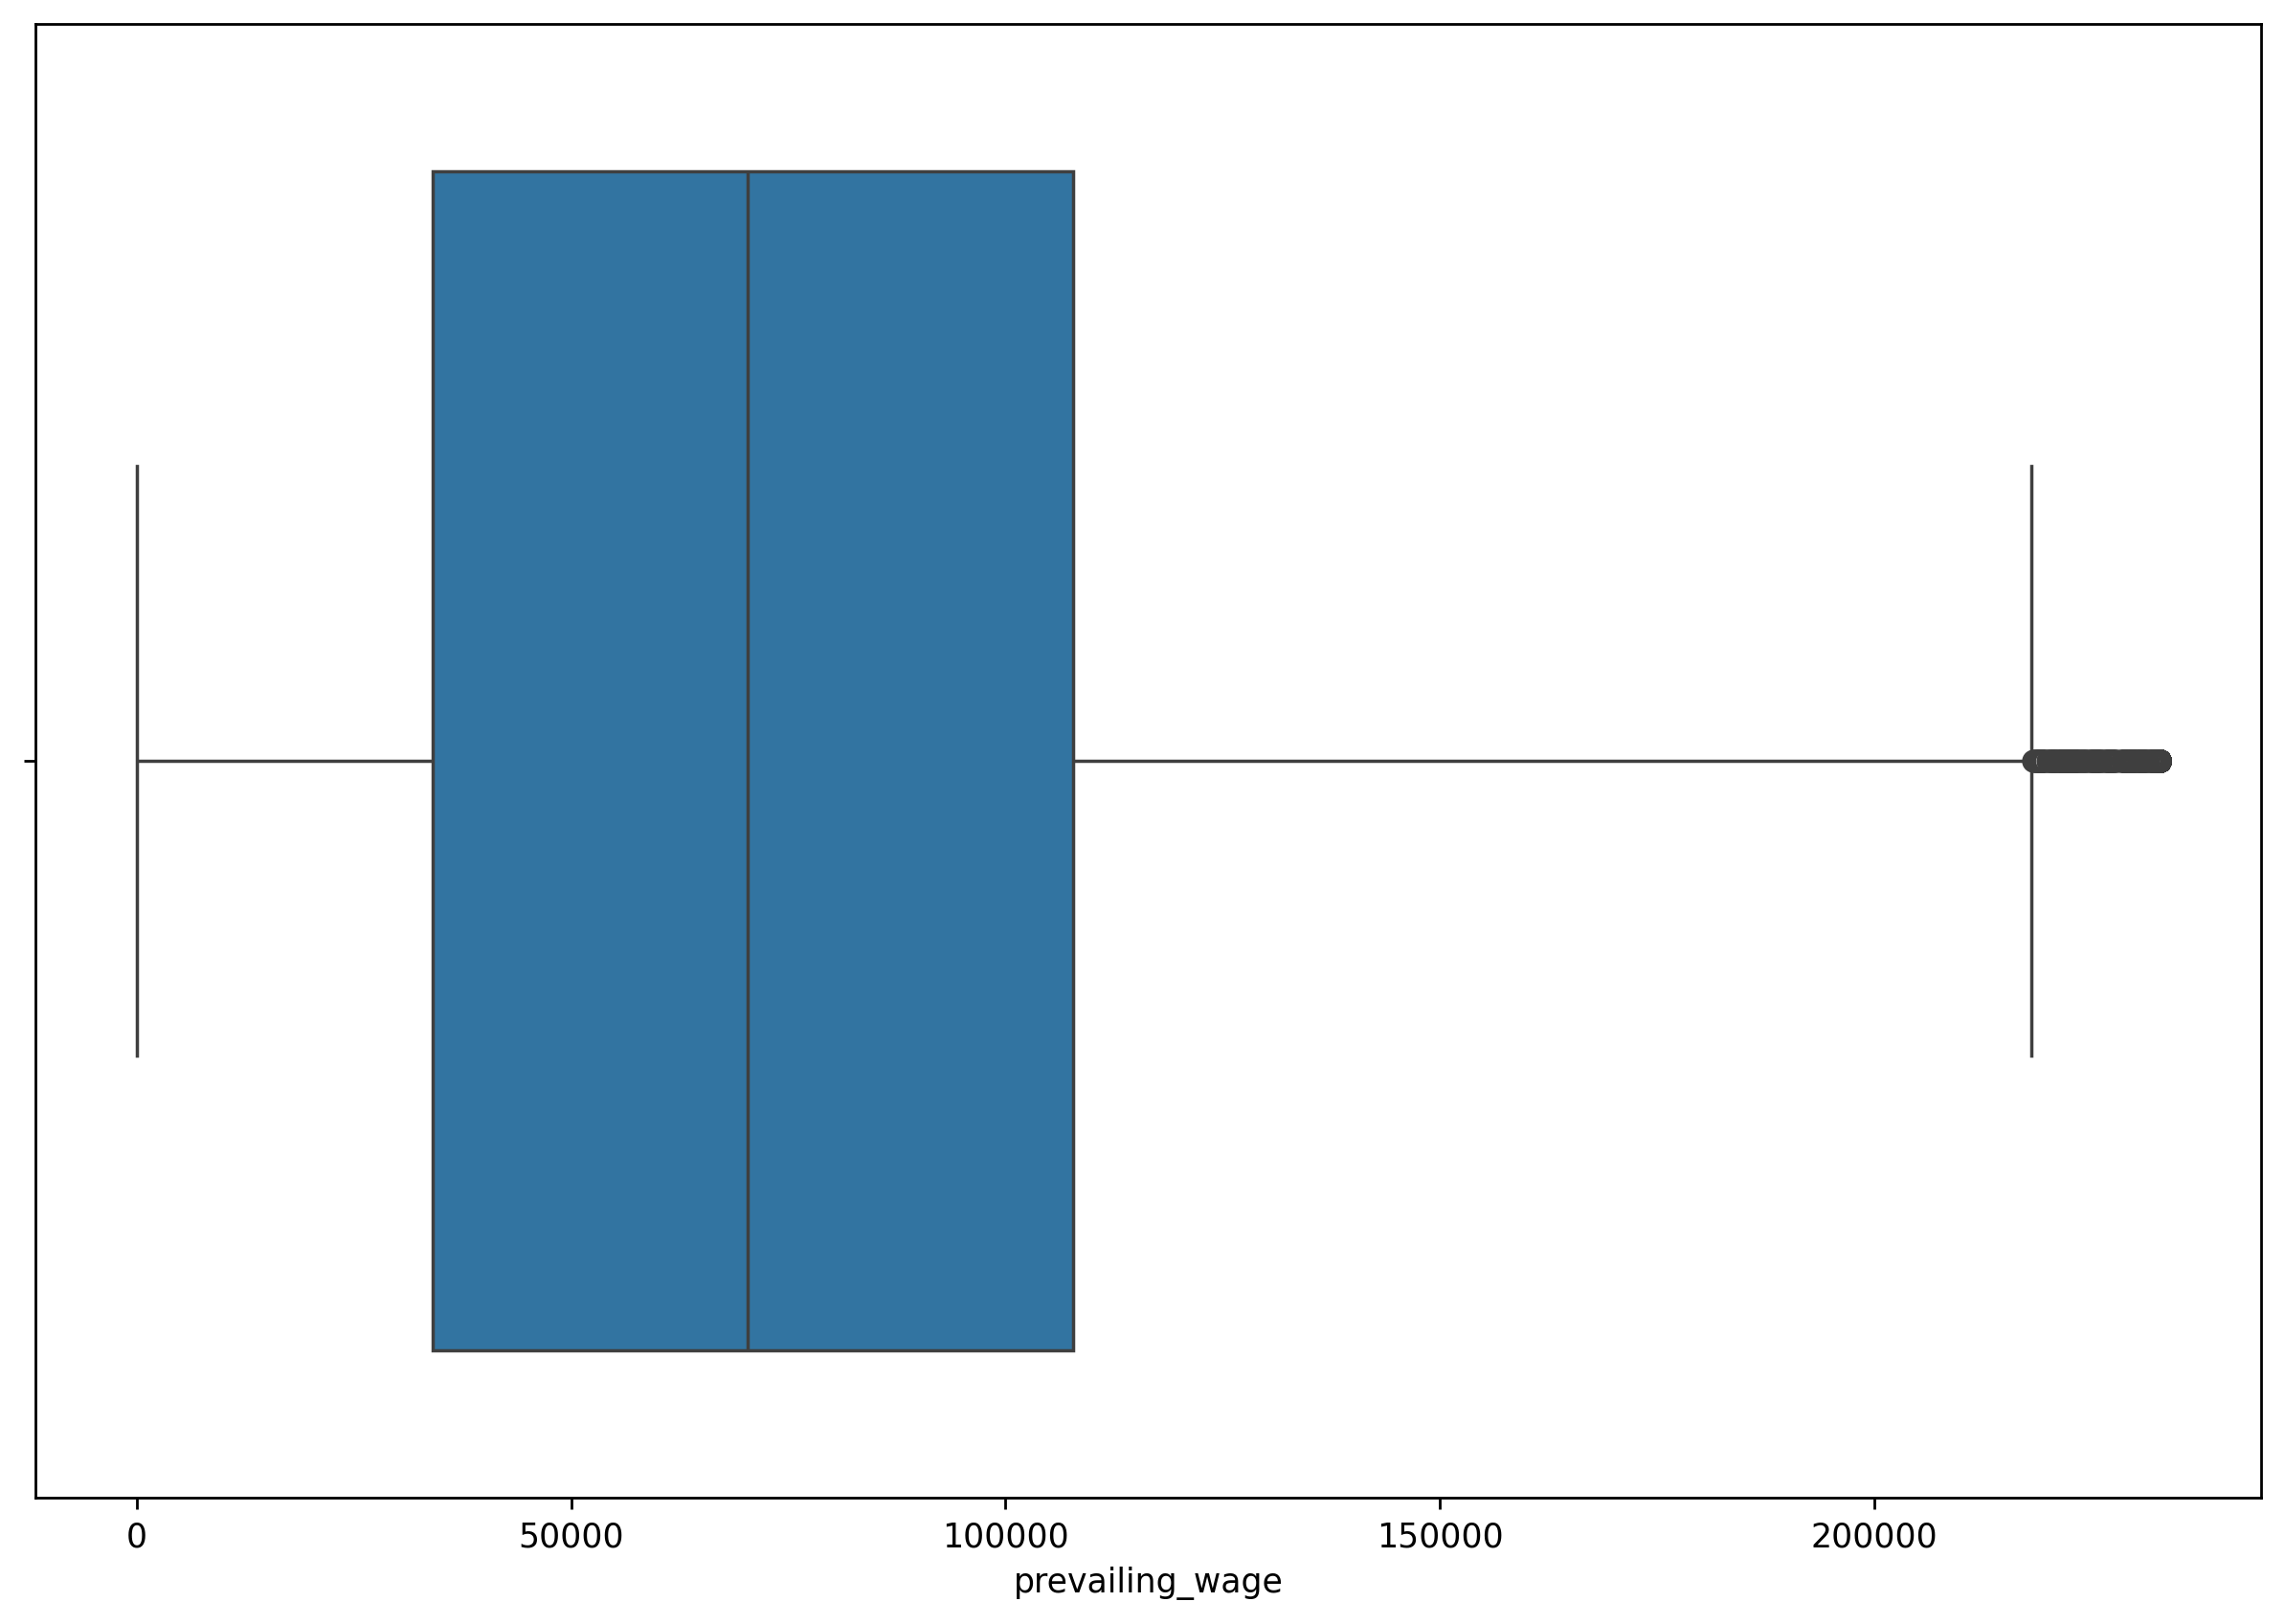

In [82]:
plt.figure(figsize=(12,8), dpi=250)
sns.boxplot(data=tree_df, x='prevailing_wage');

In [83]:
tree_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,4486.01,11106.51,-26.00,1022.00,2109.00,3504.00,74300.83
yr_of_estab,25480.0,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.0,74168.40,51836.35,2.14,34015.48,70308.21,107735.51,232903.64
case_status,25480.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00
has_job_experience_encoded,25480.0,0.58,0.49,0.00,0.00,1.00,1.00,1.00
requires_job_training_encoded,25480.0,0.12,0.32,0.00,0.00,0.00,0.00,1.00


In [84]:
raw_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.04,22877.93,-26.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.0,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.0,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27


In [85]:
tree_df.head()

,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,requires_job_training_encoded,region_Island,region_Midwest,region_Northeast,region_South,region_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,14513.0,2007,592.2029,1,False,True,False,False,False,False,...,0,False,False,False,False,True,True,False,False,False
1,2412.0,2002,83425.6500,0,False,True,False,False,False,False,...,0,False,False,True,False,False,False,False,False,True
2,44444.0,2008,122996.8600,1,False,True,False,False,False,False,...,1,False,False,False,False,True,False,False,False,True
3,98.0,1897,83434.0300,1,False,True,False,False,False,False,...,0,False,False,False,False,True,False,False,False,True
4,1082.0,2005,149907.3900,0,True,False,False,False,False,False,...,0,False,False,False,True,False,False,False,False,True


In [86]:
svc_df = tree_df.copy()

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: xlabel='no_of_employees', ylabel='Count'>

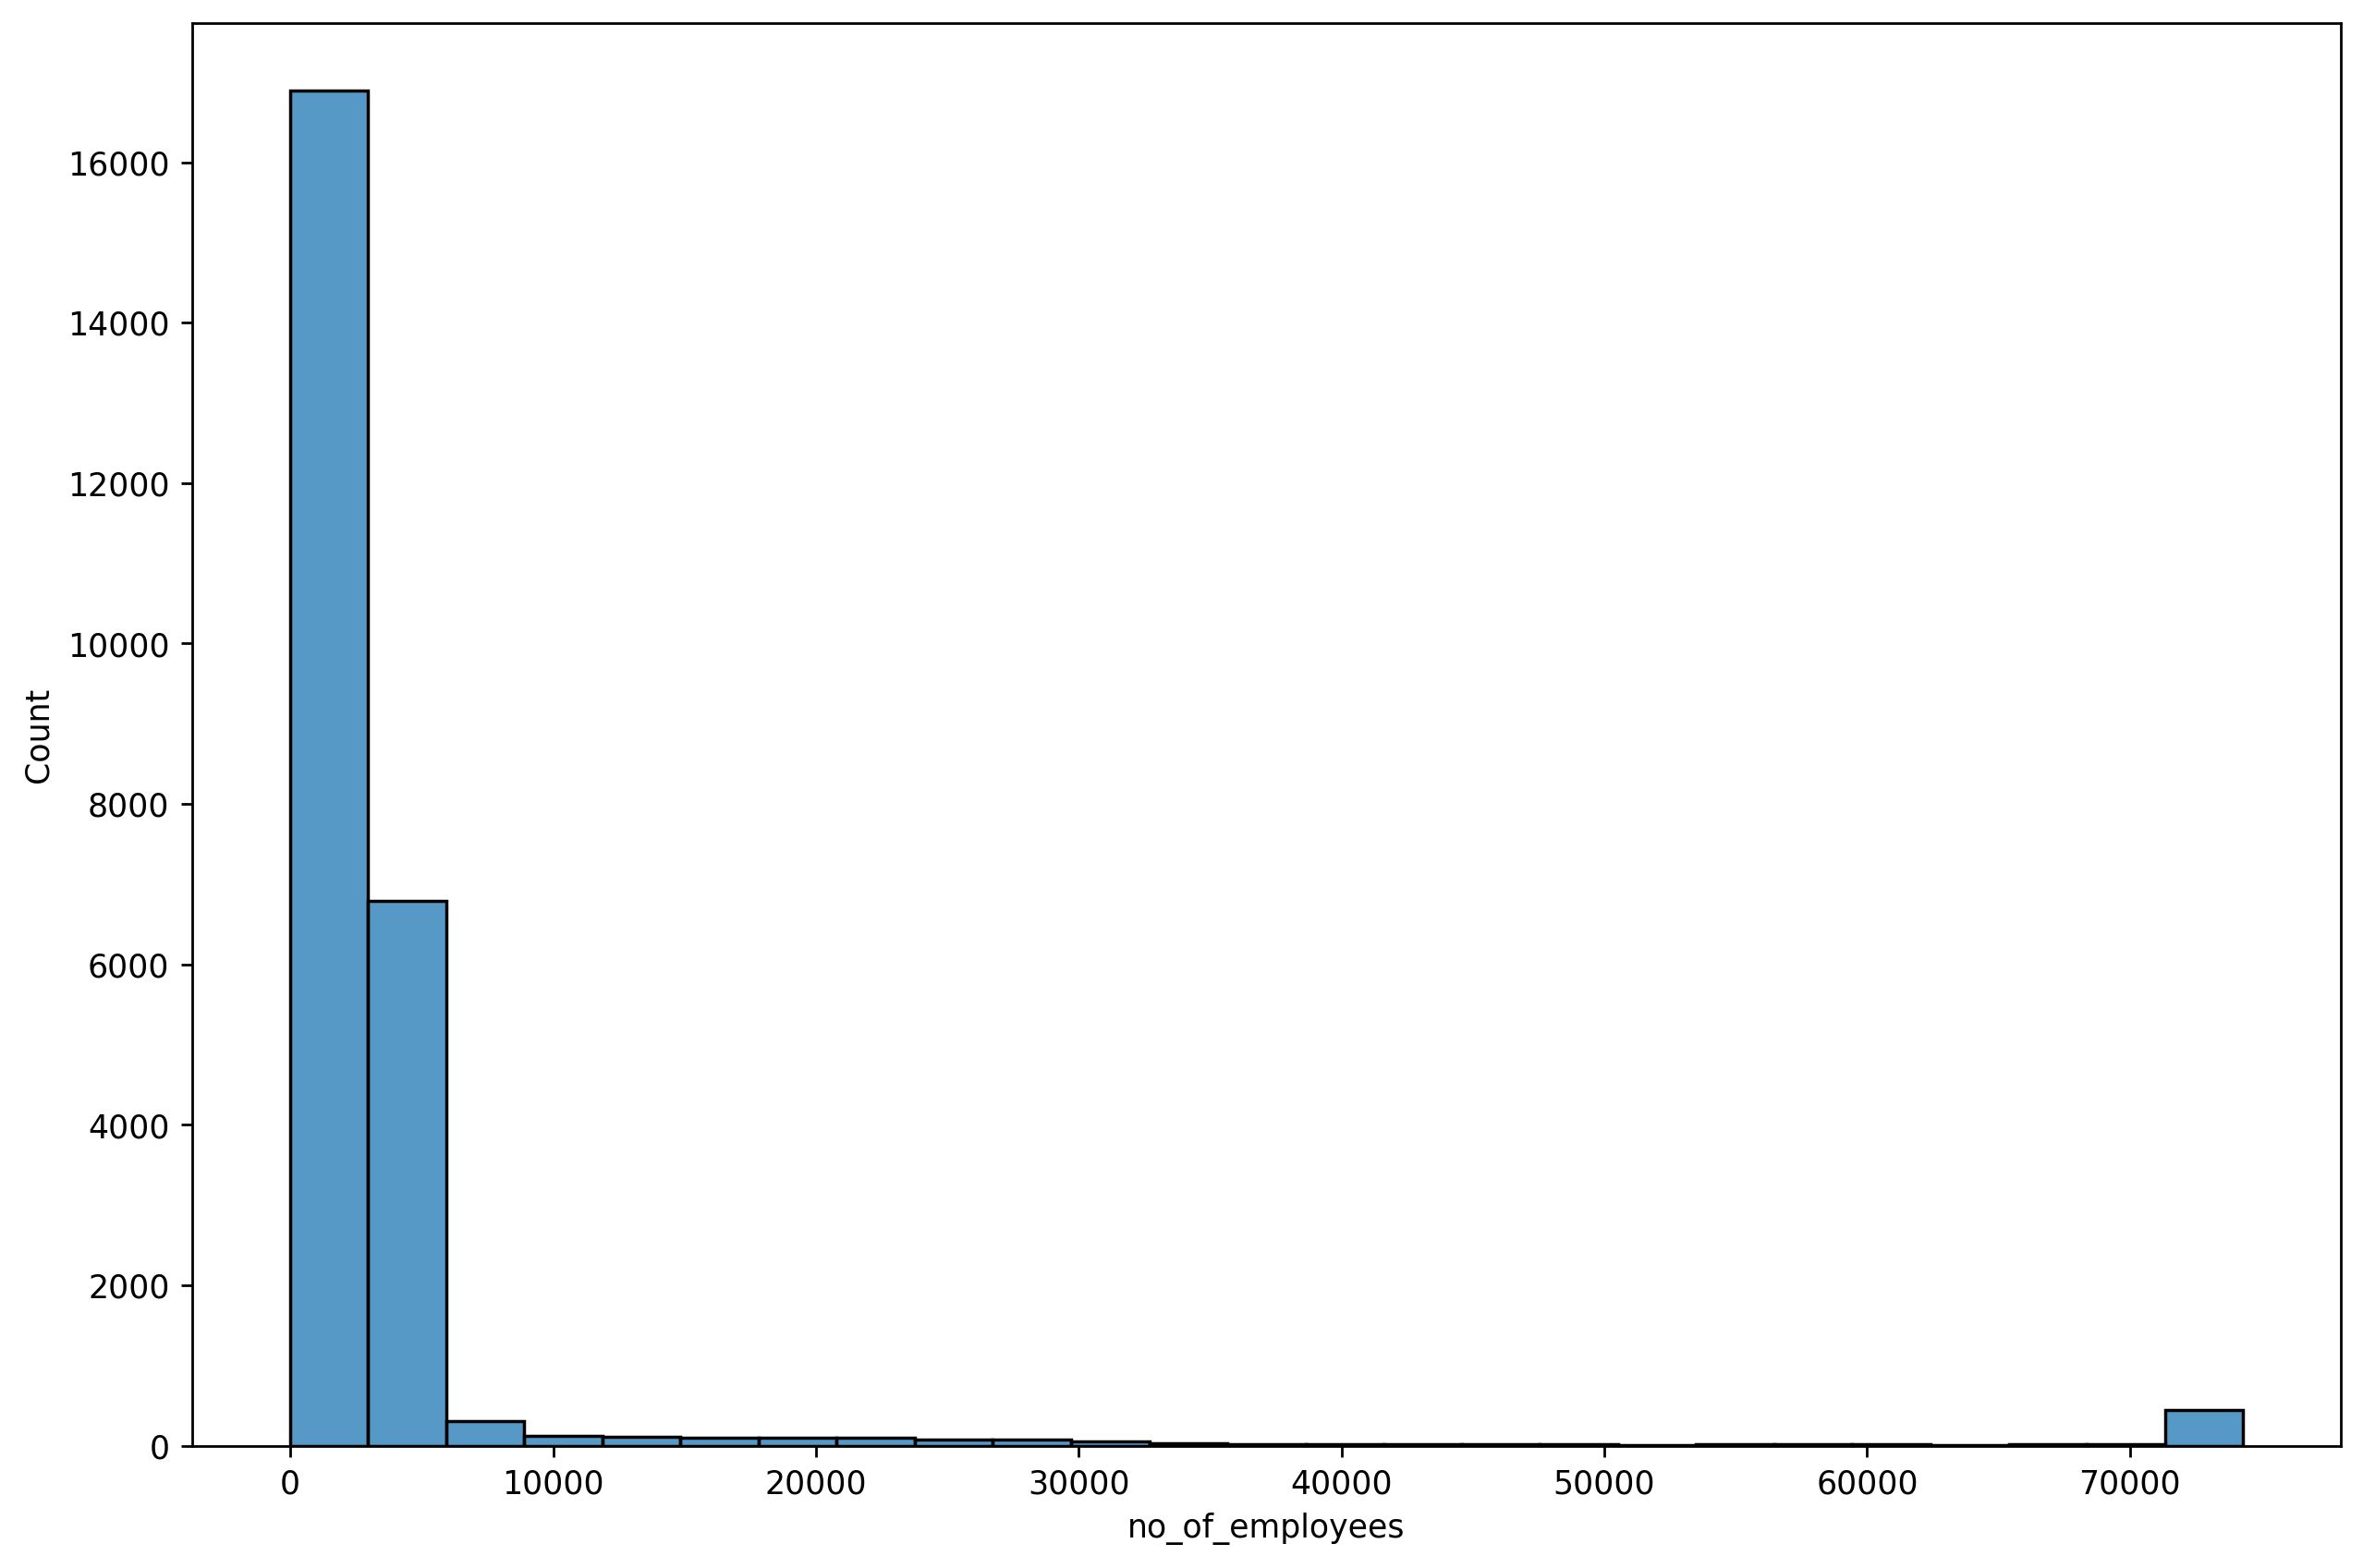

In [88]:
plt.figure(figsize=(12,8), dpi=250)
sns.histplot(tree_df['no_of_employees'], bins=25, kde=False)

<Axes: xlabel='prevailing_wage', ylabel='Count'>

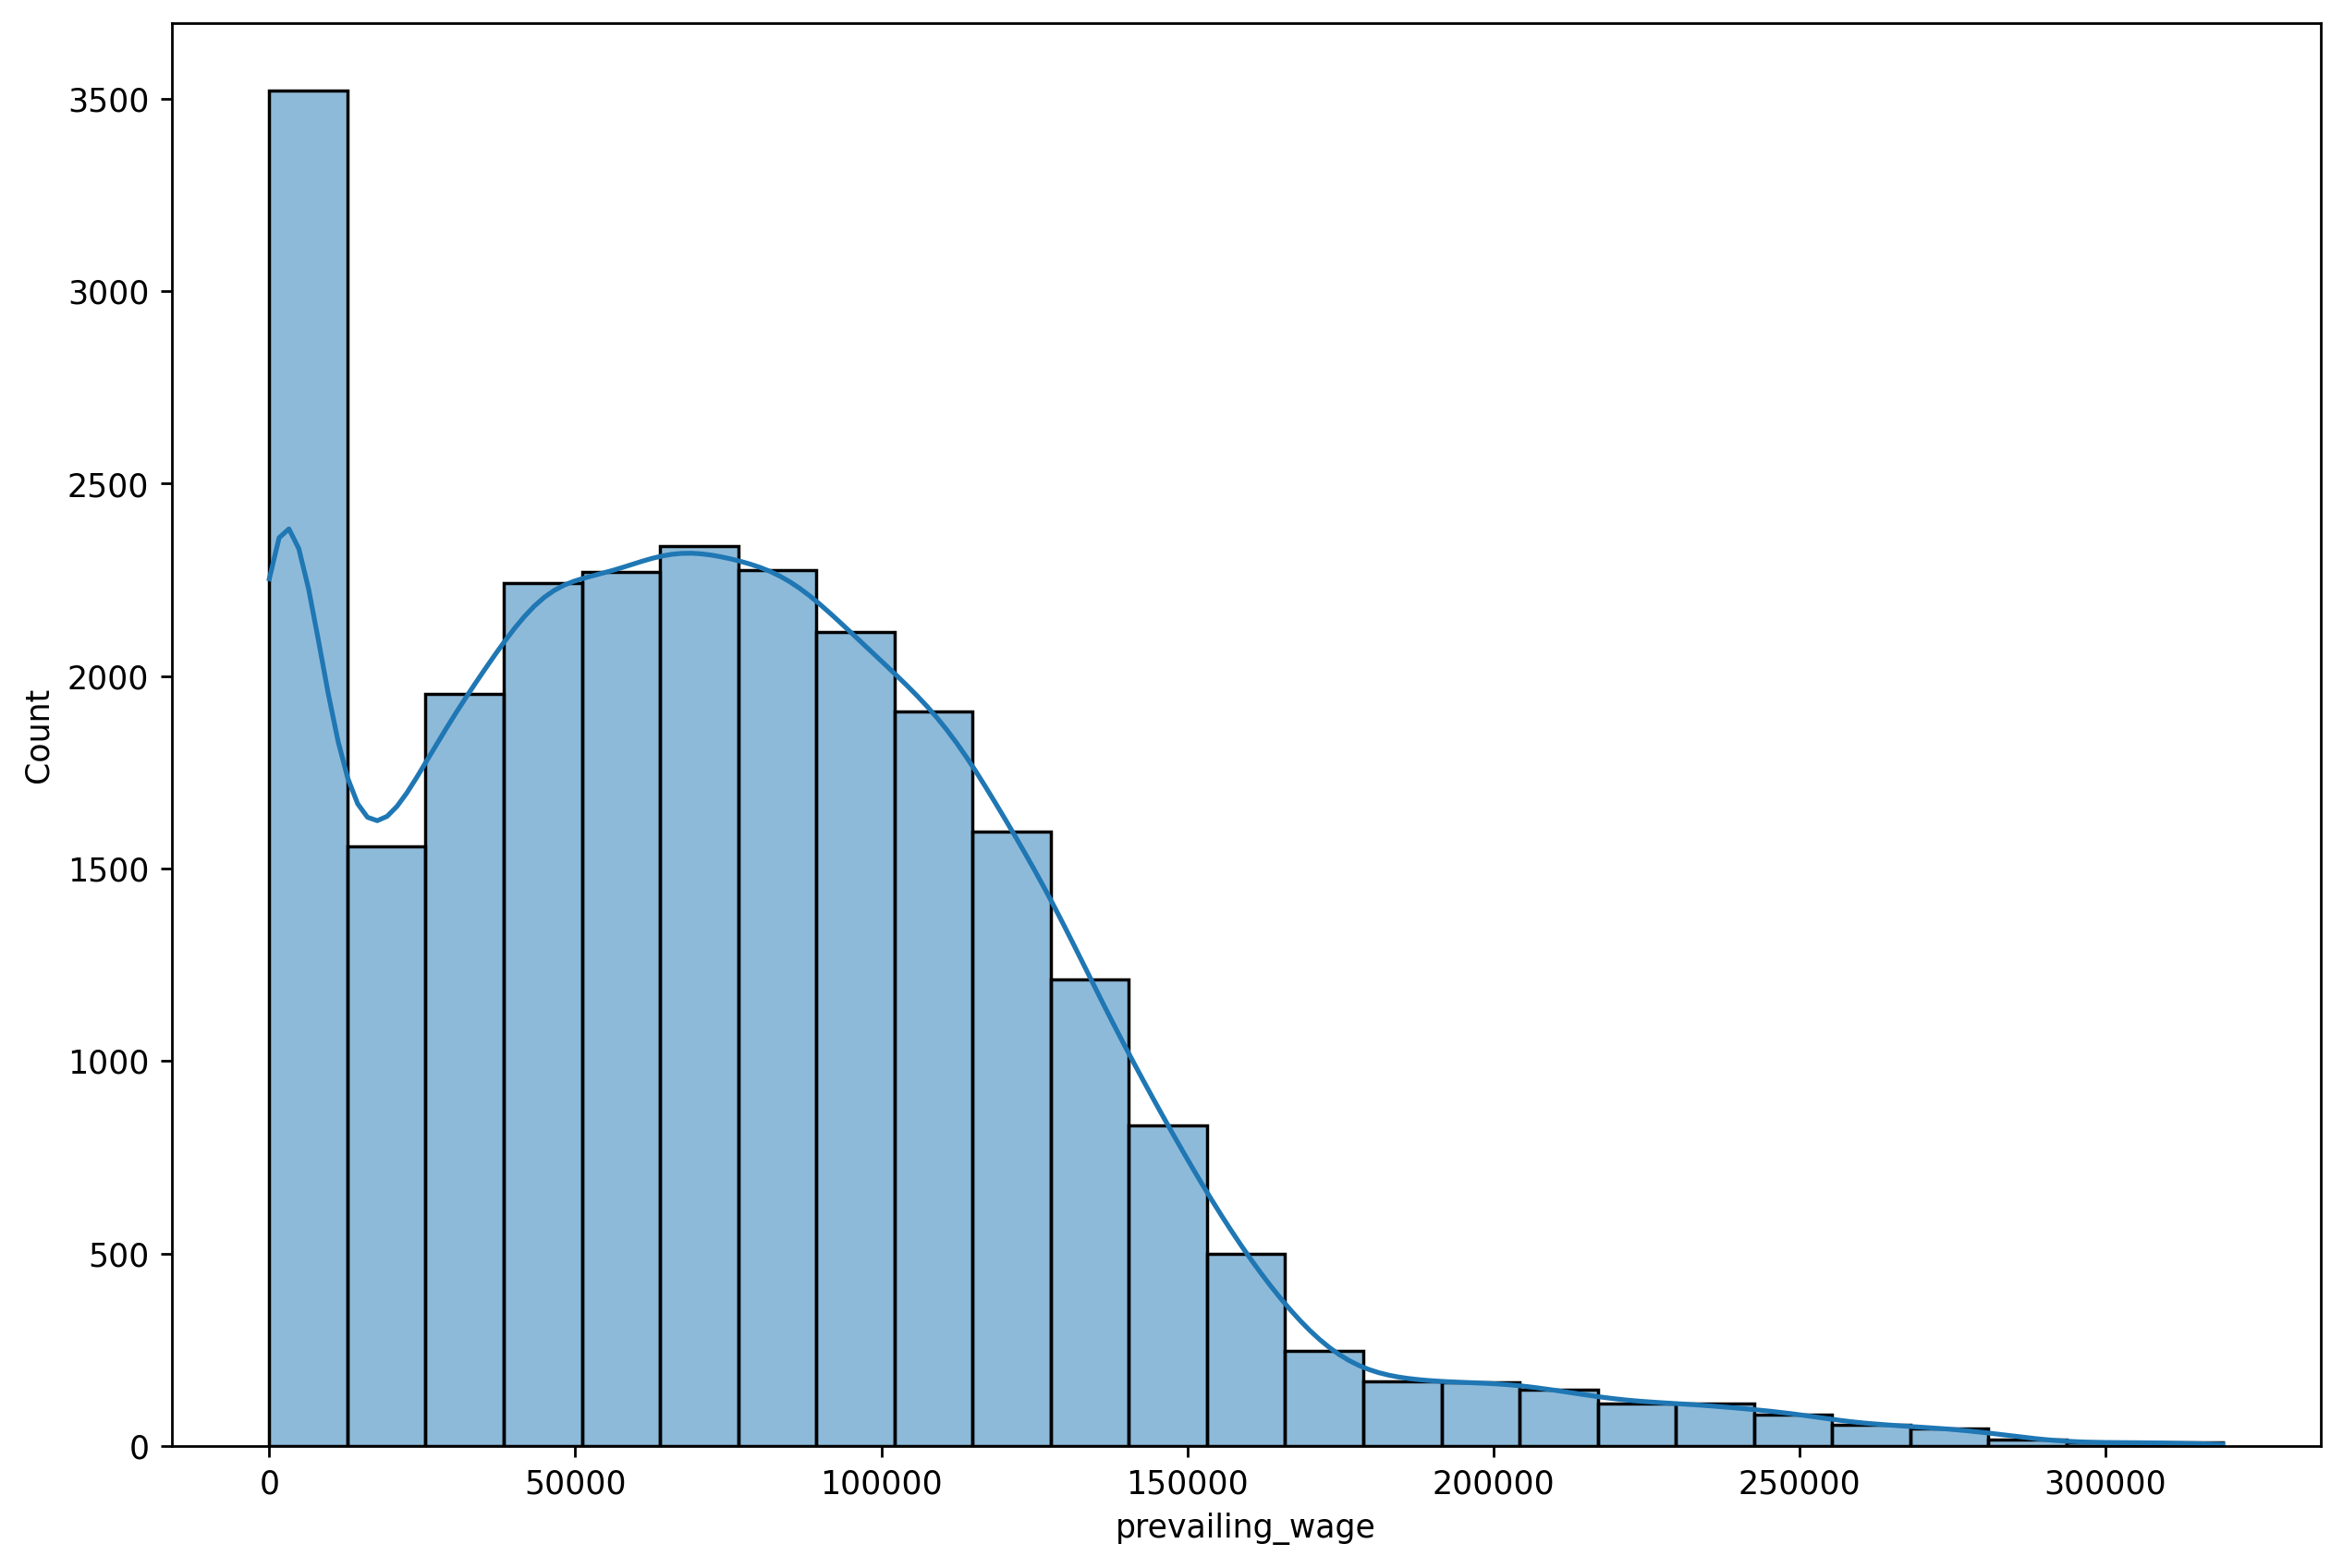

In [89]:
plt.figure(figsize=(12,8), dpi=250)
sns.histplot(raw_df['prevailing_wage'], bins=25, kde=True)

#### Data Spliting

In [91]:
X = tree_df.drop('case_status', axis=1)
y = tree_df['case_status']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63, stratify=y, shuffle=True)

## Building bagging and boosting models

#### Decision Tree Classifier

In [95]:
DTClass = DecisionTreeClassifier(random_state=11)
DTCModel = DTClass.fit(X_train, y_train)

In [96]:
DTC_ypred = DTCModel.predict(X_test)

In [97]:
print("Test Accuracy:", accuracy_score(y_test, DTC_ypred))

Test Accuracy: 0.6652276295133438


In [98]:
def get_metrics_score2(model, X_train, X_test, y_train, y_test, flag=True):
    '''
    model : classifier to predict values of X
    X_train, X_test : feature data for training and testing
    y_train, y_test : target values for training and testing
    flag : if True, print the metrics
    '''
    # Making predictions for train and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # pred_test = np.array([0 if label == 'Certified' else 1 for label in pred_test_A])
    # print(pred_test)

    # Calculating accuracy for train and test sets
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
       
    # Calculating recall for train and test sets
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    # Calculating precision for train and test sets
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    # Defining the score list with all calculated metrics
    score_list = [train_acc, test_acc, train_recall, test_recall, train_precision, test_precision]
        
    # If the flag is set to True, print the metrics
    if flag:
        print("Accuracy on training set : ", train_acc)
        print("Accuracy on test set : ", test_acc)
        print("Recall on training set : ", train_recall)
        print("Recall on test set : ", test_recall)
        print("Precision on training set : ", train_precision)
        print("Precision on test set : ", test_precision)
    
    # return score_list  # Returning the list with train and test scores

In [99]:
get_metrics_score2(DTCModel, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.6652276295133438
Recall on training set :  1.0
Recall on test set :  0.49822695035460995
Precision on training set :  1.0
Precision on test set :  0.4958823529411765


In [100]:
print("Classification Report:\n", classification_report(y_test, DTC_ypred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      3404
           1       0.50      0.50      0.50      1692

    accuracy                           0.67      5096
   macro avg       0.62      0.62      0.62      5096
weighted avg       0.67      0.67      0.67      5096



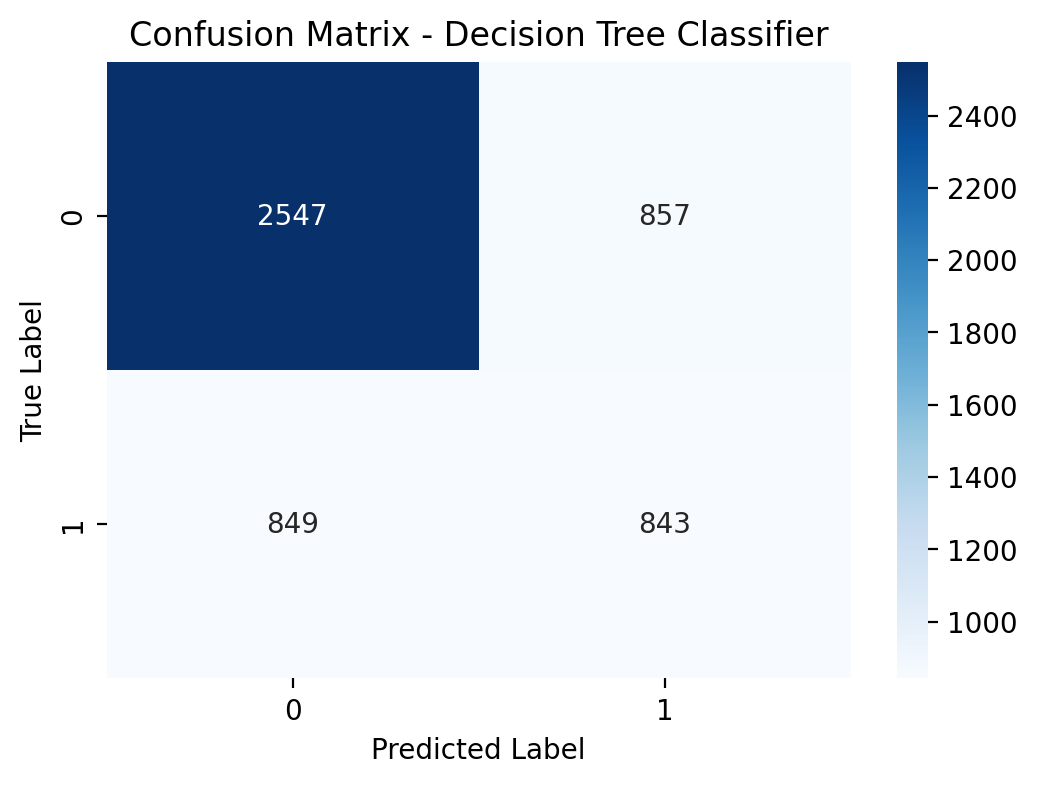

In [101]:
cm = confusion_matrix(y_test, DTC_ypred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Classifier");

The decision tree classifier is not peforming well and is overfit.

#### Bagging Classifier

In [104]:
BagClass = BaggingClassifier(random_state=11)
BagClassModel = BagClass.fit(X_train, y_train)

In [105]:
Bag_Class_y_pred = BagClassModel.predict(X_test)

In [106]:
print("Bag Classifier Test Accuracy:", accuracy_score(y_test, Bag_Class_y_pred))

Bag Classifier Test Accuracy: 0.7062401883830455


In [107]:
get_metrics_score2(BagClassModel, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.9777276295133438
Accuracy on test set :  0.7062401883830455
Recall on training set :  0.9387001477104875
Recall on test set :  0.43498817966903075
Precision on training set :  0.9939005317485142
Precision on test set :  0.5763508222396241


In [108]:
print("Classification Report:\n", classification_report(y_test, Bag_Class_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      3404
           1       0.58      0.43      0.50      1692

    accuracy                           0.71      5096
   macro avg       0.66      0.64      0.64      5096
weighted avg       0.69      0.71      0.69      5096



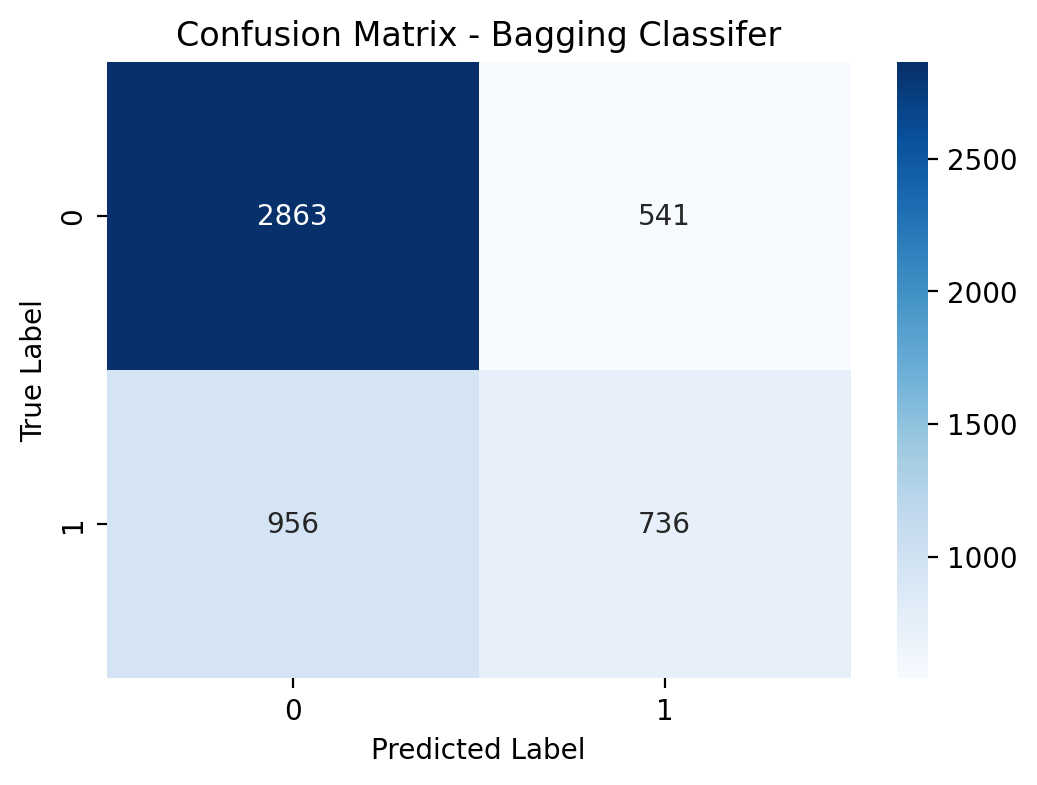

In [109]:
cm = confusion_matrix(y_test, Bag_Class_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bagging Classifer");

#### Random Forest Classifier

In [111]:
RFClassifier = RandomForestClassifier(random_state=11)
RFClassModel = RFClassifier.fit(X_train, y_train)

In [112]:
RF_Class_y_pred = RFClassModel.predict(X_test)
RF_Class_y_pred_train = RFClassModel.predict(X_train)

In [113]:
print("Random Forest Classifier Test Accuracy:", accuracy_score(y_test, RF_Class_y_pred))

Random Forest Classifier Test Accuracy: 0.7197802197802198


In [114]:
get_metrics_score2(RFClassModel, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.7197802197802198
Recall on training set :  1.0
Recall on test set :  0.4958628841607565
Precision on training set :  1.0
Precision on test set :  0.5933521923620934


In [115]:
print("Random Forest Classification Report:\n", classification_report(y_test, RF_Class_y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      3404
           1       0.59      0.50      0.54      1692

    accuracy                           0.72      5096
   macro avg       0.68      0.66      0.67      5096
weighted avg       0.71      0.72      0.71      5096



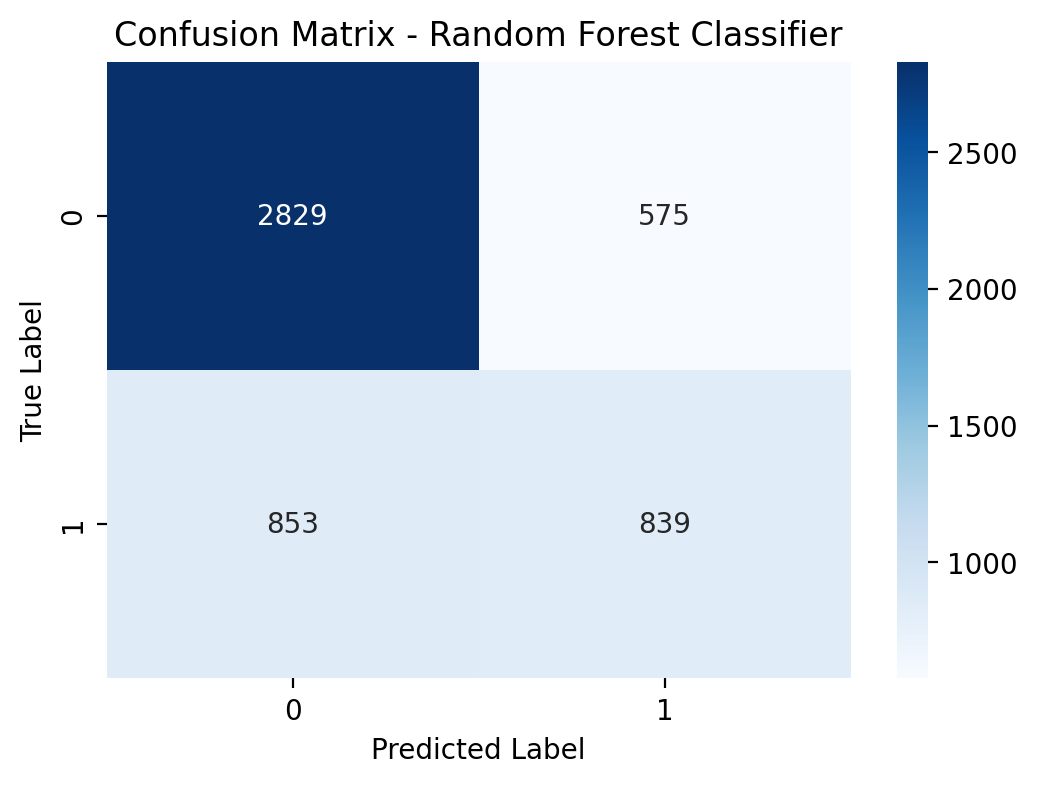

In [116]:
cm = confusion_matrix(y_test, RF_Class_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier");

#### AdaBoost Classifier

In [118]:
adaclass = AdaBoostClassifier(random_state=11)
adaclassmodel = adaclass.fit(X_train, y_train)

In [119]:
adaclass_pred = adaclassmodel.predict(X_test)

In [120]:
get_metrics_score2(adaclassmodel, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7377354788069074
Accuracy on test set :  0.7370486656200942
Recall on training set :  0.43559822747415067
Recall on test set :  0.4521276595744681
Precision on training set :  0.6591417076441662
Precision on test set :  0.6494057724957555


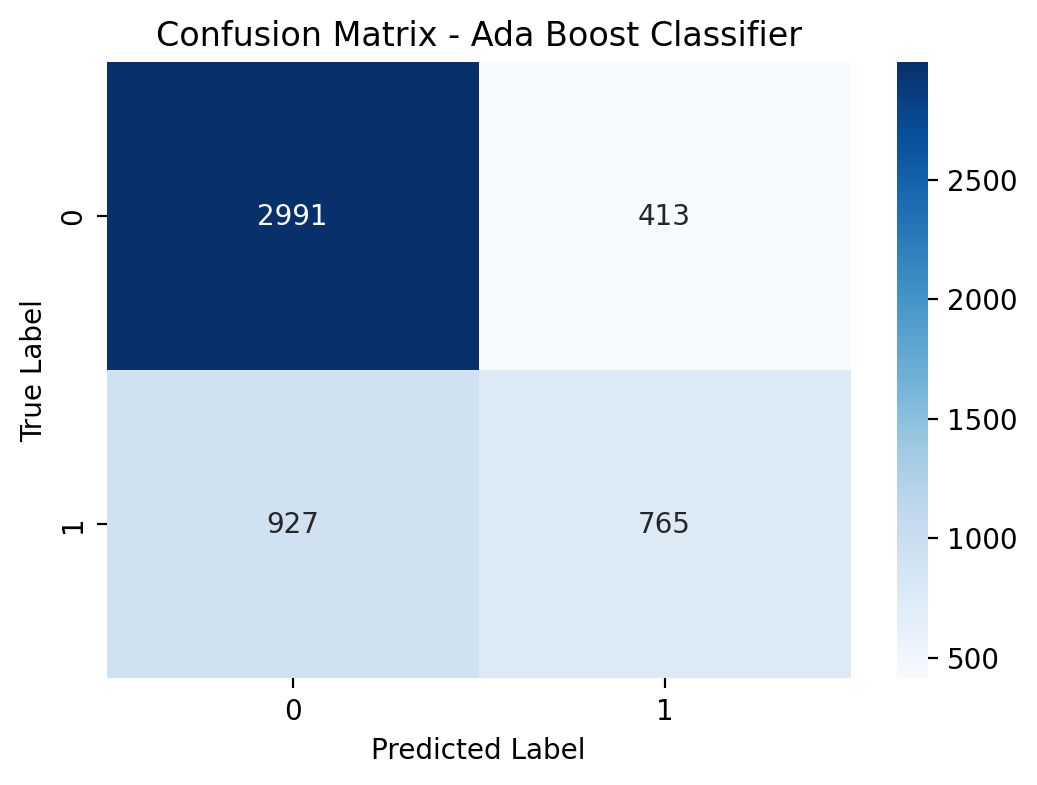

In [121]:
cm = confusion_matrix(y_test, adaclass_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ada Boost Classifier");

The ADA Boost model is not overfit, but performance is a bit low depending on the application

#### Gradient Boosting Classifier

In [124]:
GBC_Class = GradientBoostingClassifier(random_state=11)
GBC_Model = GBC_Class.fit(X_train, y_train)

In [125]:
GBC_Class_pred = GBC_Model.predict(X_test)

In [126]:
get_metrics_score2(GBC_Model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7535321821036107
Accuracy on test set :  0.7498037676609105
Recall on training set :  0.506056129985229
Recall on test set :  0.5070921985815603
Precision on training set :  0.6709753231492362
Precision on test set :  0.6605080831408776


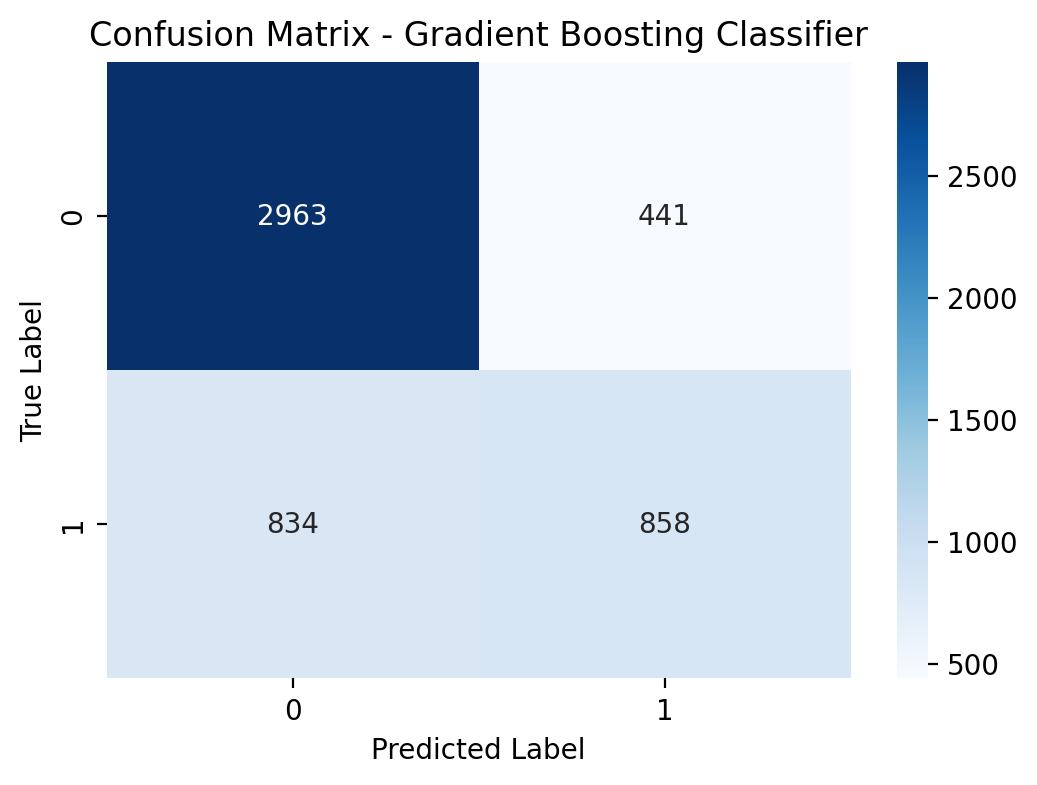

In [127]:
cm = confusion_matrix(y_test, GBC_Class_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting Classifier");

#### Stacking Classifier

In [377]:
StackingClassifier

sklearn.ensemble._stacking.StackingClassifier

In [379]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=11)),
    ('GBC', GradientBoostingClassifier(random_state=11)),
    ('ada', AdaBoostClassifier(random_state=11))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=AdaBoostClassifier(random_state=11)
)

stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=11)),
                               ('GBC',
                                GradientBoostingClassifier(random_state=11)),
                               ('ada', AdaBoostClassifier(random_state=11))],
                   final_estimator=AdaBoostClassifier(random_state=11))

In [380]:
stacking_clf_pred = stacking_clf.predict(X_test)

In [132]:
get_metrics_score2(stacking_clf, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7679062009419152
Accuracy on test set :  0.7470565149136578
Recall on training set :  0.5282127031019203
Recall on test set :  0.5088652482269503
Precision on training set :  0.6993937023274007
Precision on test set :  0.6527672479150872


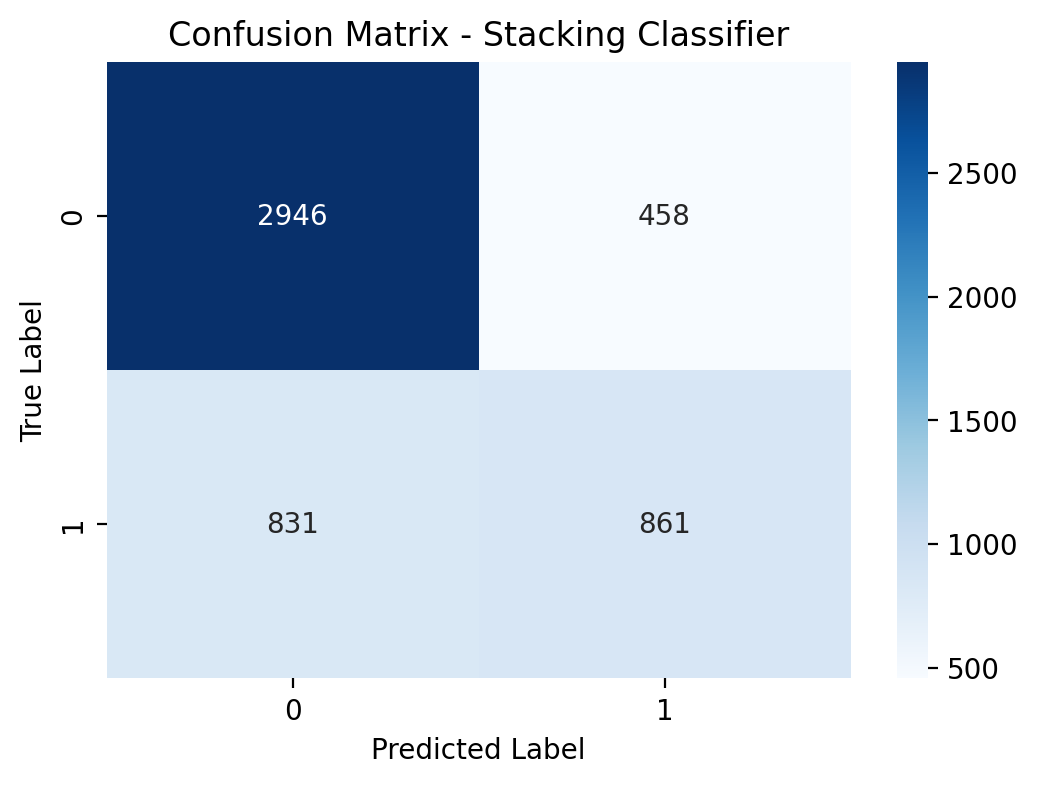

In [133]:
cm = confusion_matrix(y_test, stacking_clf_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier");

In [385]:
base_estimators = stacking_clf.estimators_

In [389]:
print(base_estimators)

[RandomForestClassifier(n_estimators=10, random_state=11), GradientBoostingClassifier(random_state=11), AdaBoostClassifier(random_state=11)]


#### XGBClassifier

In [135]:
xbg_df = svc_df.copy()

In [136]:
xbg_df['case_status_encoded'] = label_encoder.fit_transform(xbg_df['case_status'])
xgb_df = xbg_df.drop(['case_status'], axis=1)

In [137]:
xgb_df.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_Bachelor's,...,region_Island,region_Midwest,region_Northeast,region_South,region_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,case_status_encoded
0,14513.0,2007,592.2029,False,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,1
1,2412.0,2002,83425.6500,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2,44444.0,2008,122996.8600,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,1
3,98.0,1897,83434.0300,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,1
4,1082.0,2005,149907.3900,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,0


In [138]:
X = xgb_df.drop('case_status_encoded', axis=1)
y = xgb_df['case_status_encoded']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63, stratify=y, shuffle=True)

In [140]:
XGB_class = XGBClassifier(random_state=11)
XGB_Model = XGB_class.fit(X_train, y_train)

In [141]:
XGB_Class_y_pred = XGB_Model.predict(X_test)

In [142]:
print("Bag Classifier Test Accuracy:", accuracy_score(y_test, XGB_Class_y_pred))

Bag Classifier Test Accuracy: 0.7356750392464678


In [143]:
get_metrics_score2(XGB_Model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.8326628728414442
Accuracy on test set :  0.7356750392464678
Recall on training set :  0.6443131462333825
Recall on test set :  0.5059101654846335
Precision on training set :  0.8130475302889096
Precision on test set :  0.626188734455011


In [144]:
print("Classification Report:\n", classification_report(y_test, XGB_Class_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81      3404
           1       0.63      0.51      0.56      1692

    accuracy                           0.74      5096
   macro avg       0.70      0.68      0.69      5096
weighted avg       0.73      0.74      0.73      5096



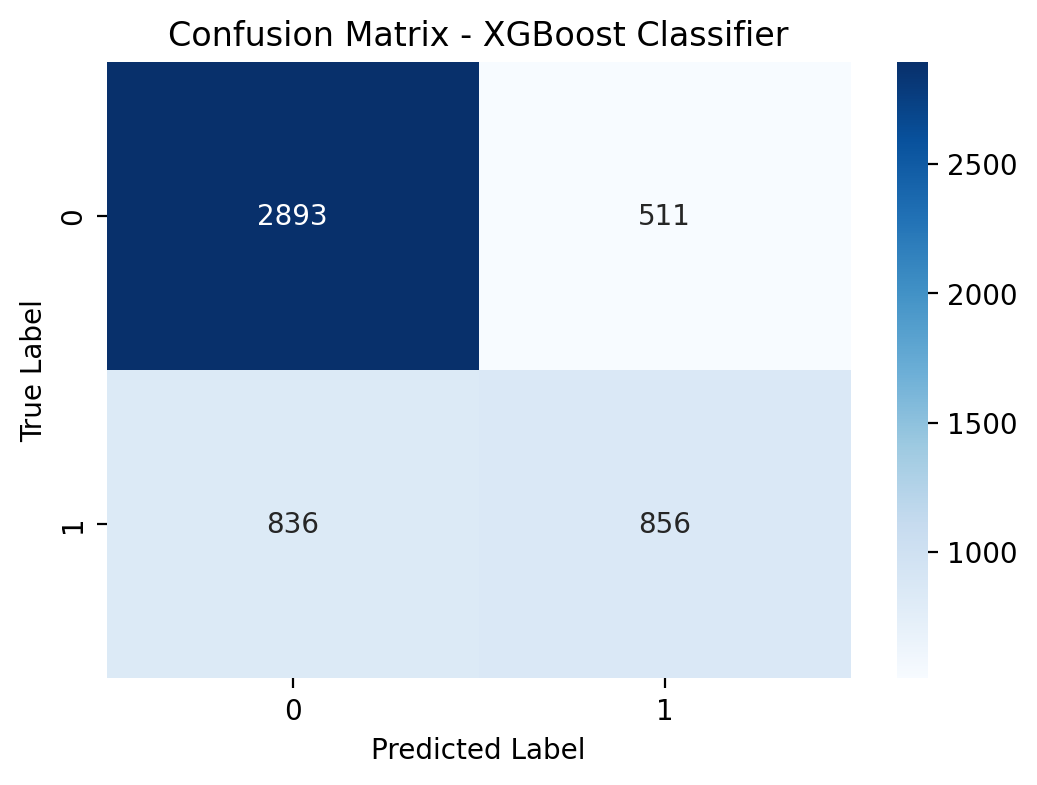

In [145]:
cm = confusion_matrix(y_test, XGB_Class_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost Classifier");

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##  Will tuning the hyperparameters improve the model performance?
The models perofrmance and tendency to overfit indicate that tuning the hyperparamters is needed. I would think that  most models should be tuned if ionly to see if they can be improved. Lets take a look. 

### Tuned Gradient Boosting Classifiers

In [149]:
GBC_Model_2 = GradientBoostingClassifier(random_state=11)

In [150]:
param_grid = {
    # "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

In [151]:
grid_search = GridSearchCV(estimator=GBC_Model_2, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=11),
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_features': [0.5, 0.7, 1],
                         'n_estimators': array([ 50,  75, 100]),
                         'subsample': [0.7, 0.9]},
             scoring='recall')

In [152]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(best_model)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      3404
           1       0.66      0.51      0.58      1692

    accuracy                           0.75      5096
   macro avg       0.72      0.69      0.70      5096
weighted avg       0.74      0.75      0.74      5096

GradientBoostingClassifier(max_features=0.5, random_state=11, subsample=0.9)


In [153]:
get_metrics_score2(grid_search, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.5081240768094535
Accuracy on test set :  0.5094562647754137
Recall on training set :  0.5081240768094535
Recall on test set :  0.5094562647754137
Precision on training set :  0.669260700389105
Precision on test set :  0.660536398467433


In [154]:
GBC2_y_pred = grid_search.predict(X_test)

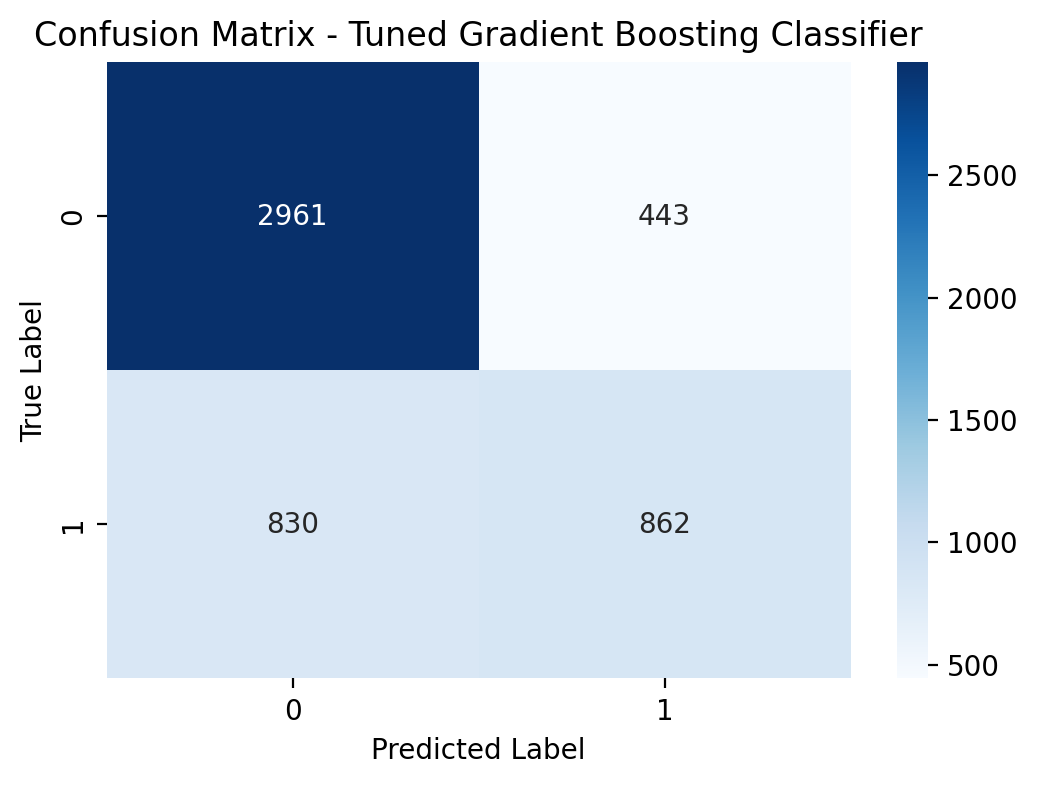

In [155]:
cm = confusion_matrix(y_test, GBC2_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Gradient Boosting Classifier");

In [156]:
feature_importances = best_model.feature_importances_

Text(0.5, 1.0, 'Feature Importance for Tuned Gradient Boosting Classifier')

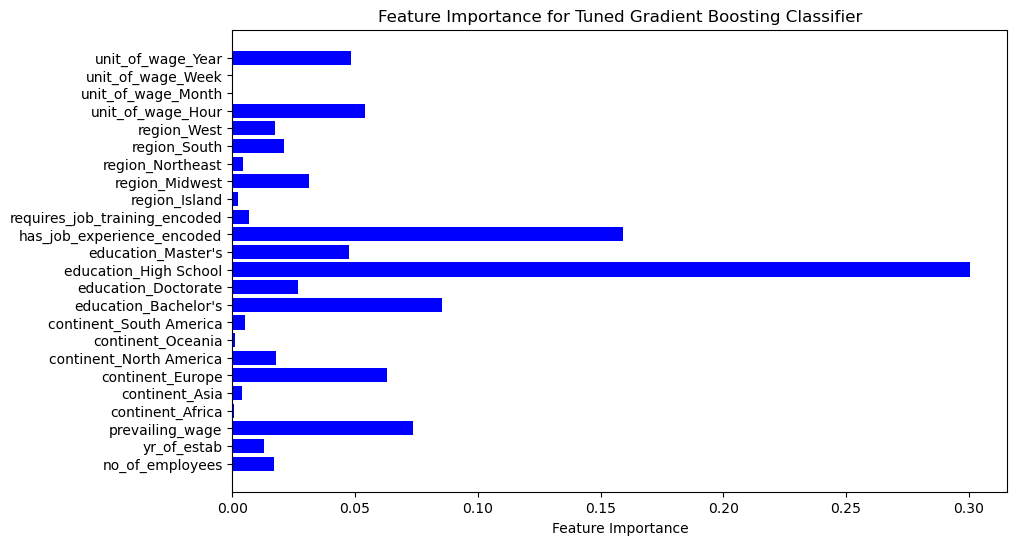

In [157]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Tuned Gradient Boosting Classifier')

With tuning the Gradient Boosting Classifier in no longer overfitting the performance is very low.

### Tuned AdaBoost Classifier

In [160]:
base_estimator = DecisionTreeClassifier(max_depth=3) 

In [161]:
ada_boost = AdaBoostClassifier(estimator = base_estimator )

In [162]:
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

In [163]:
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3)),
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=2,
                                                              random_state=1),
                                       DecisionTreeClassifier(max_depth=3,
                                                              random_state=1)],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': array([ 50,  75, 100])},
             scoring='recall')

In [164]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(best_model)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      3404
           1       0.67      0.49      0.57      1692

    accuracy                           0.75      5096
   macro avg       0.72      0.69      0.70      5096
weighted avg       0.74      0.75      0.74      5096

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)


In [165]:
get_metrics_score2(grid_search, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.4980797636632201
Accuracy on test set :  0.4940898345153664
Recall on training set :  0.4980797636632201
Recall on test set :  0.4940898345153664
Precision on training set :  0.6781979082864039
Precision on test set :  0.6650755767700876


In [166]:
Ada_Tuned_y_pred = grid_search.predict(X_test)

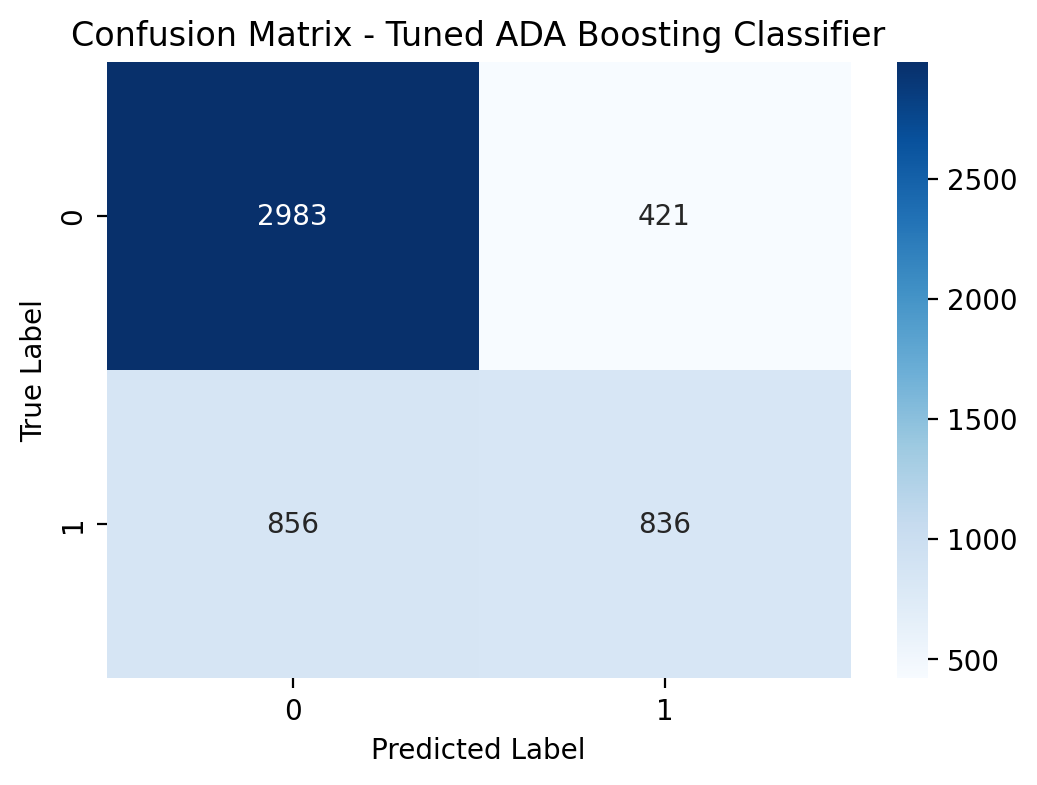

In [167]:
cm = confusion_matrix(y_test, Ada_Tuned_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned ADA Boosting Classifier");

In [168]:
feature_importances = best_model.feature_importances_

Text(0.5, 1.0, 'Feature Importance for Tuned ADA Boosting Classifier')

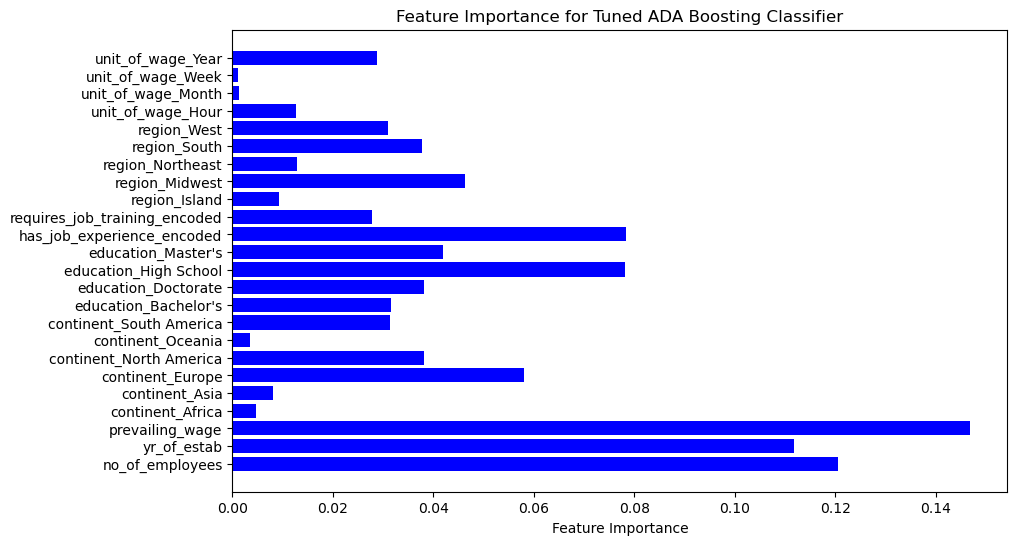

In [169]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Tuned ADA Boosting Classifier')

Tuning the ADA Boost Model gave a slight increase in performance with out overfitting. 

### Bagging Classifier

In [172]:
Tuned_Bag_Class = BaggingClassifier(random_state=11)


In [173]:
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

In [174]:
grid_search = GridSearchCV(estimator=Tuned_Bag_Class, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=11),
             param_grid={'max_features': [0.7, 0.8, 0.9],
                         'max_samples': [0.8, 0.9, 1],
                         'n_estimators': [30, 50, 70]},
             scoring='recall')

In [175]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(best_model)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3404
           1       0.62      0.49      0.55      1692

    accuracy                           0.73      5096
   macro avg       0.70      0.67      0.68      5096
weighted avg       0.72      0.73      0.72      5096

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=11)


In [176]:
get_metrics_score2(grid_search, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.9991137370753324
Accuracy on test set :  0.4946808510638298
Recall on training set :  0.9991137370753324
Recall on test set :  0.4946808510638298
Precision on training set :  0.9997044043748152
Precision on test set :  0.6232315711094565


In [177]:
Ada_Tuned_y_pred = grid_search.predict(X_test)

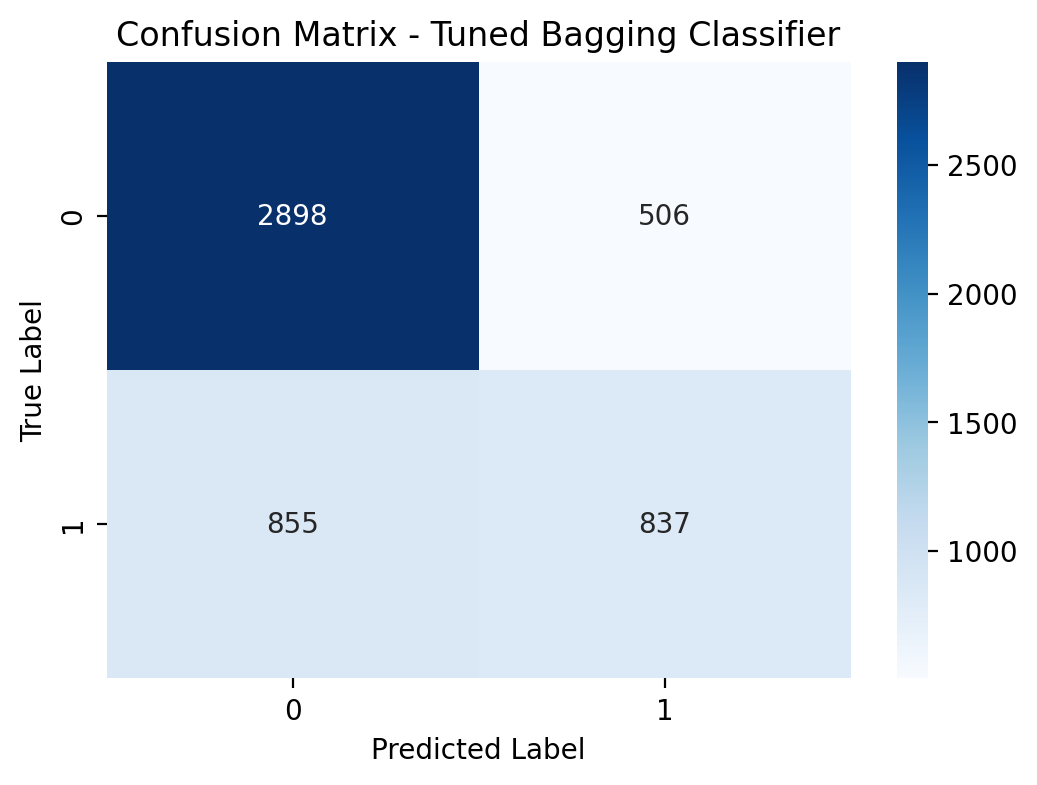

In [178]:
cm = confusion_matrix(y_test, Ada_Tuned_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Bagging Classifier");

### Tuned Random Forest

In [180]:
Tuned_RF = RandomForestClassifier(random_state=11)
Tuned_RF_Model = RFClassifier.fit(X_train, y_train)

In [181]:
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

In [182]:
grid_search = GridSearchCV(estimator=Tuned_RF_Model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_features': [array([0.3, 0.4, 0.5]), 'sqrt'],
                         'max_samples': array([0.4, 0.5, 0.6]),
                         'min_samples_leaf': array([1, 2, 3]),
                         'n_estimators': [50, 110, 25]},
             scoring='recall')

In [183]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(best_model)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3404
           1       0.65      0.51      0.57      1692

    accuracy                           0.74      5096
   macro avg       0.71      0.68      0.69      5096
weighted avg       0.74      0.74      0.74      5096

RandomForestClassifier(max_samples=0.4, min_samples_leaf=2, n_estimators=110,
                       random_state=11)


In [184]:
get_metrics_score2(Tuned_RF_Model, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.7197802197802198
Recall on training set :  1.0
Recall on test set :  0.4958628841607565
Precision on training set :  1.0
Precision on test set :  0.5933521923620934


In [185]:
Tuned_RF_y_pred = grid_search.predict(X_test)

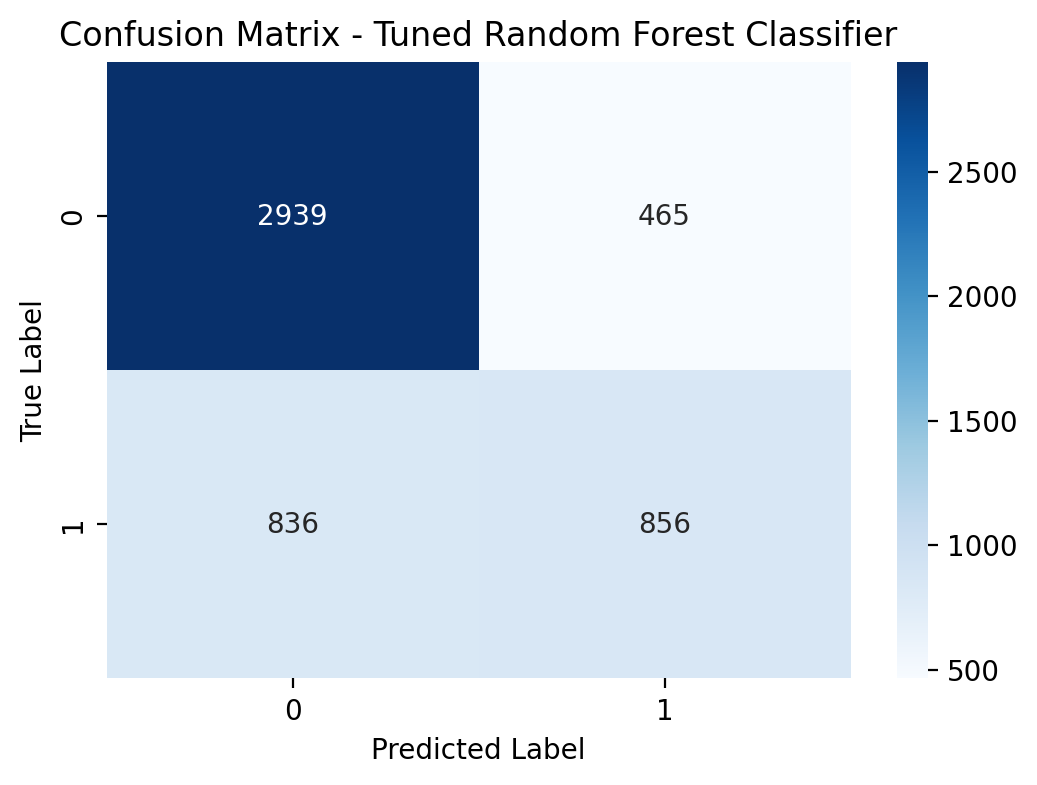

In [186]:
cm = confusion_matrix(y_test, Tuned_RF_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Random Forest Classifier");

In [187]:
feature_importances = best_model.feature_importances_

Text(0.5, 1.0, 'Feature Importance for Tuned Random Forest Classifier')

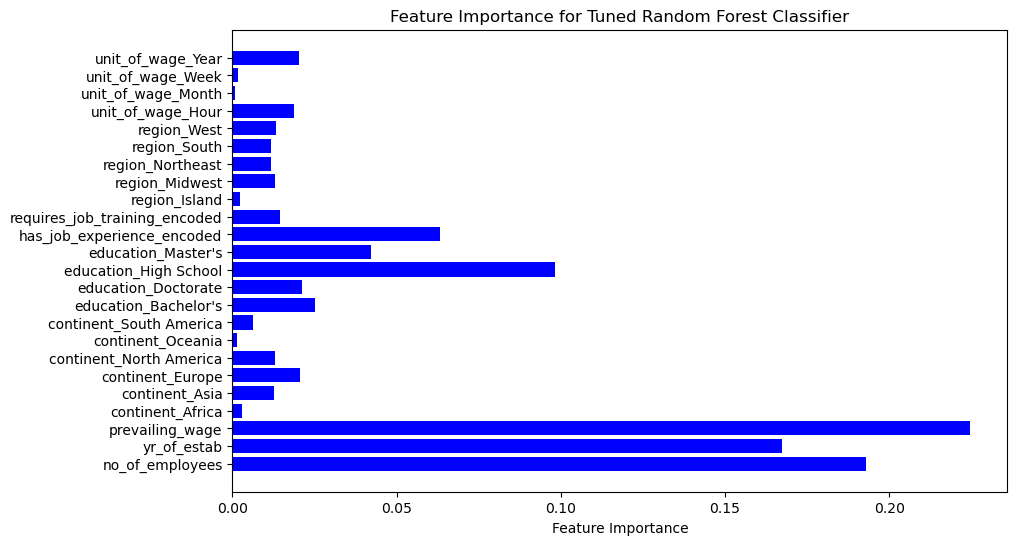

In [188]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Tuned Random Forest Classifier')

### Tuned Decision Trees

In [190]:
Tuned_DTClass = DecisionTreeClassifier(random_state=11)
Tuned_DTCModel = DTClass.fit(X_train, y_train)

In [191]:
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

In [192]:
grid_search = GridSearchCV(estimator=Tuned_DTCModel, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': array([2, 3, 4, 5]),
                         'max_leaf_nodes': [10, 15],
                         'min_impurity_decrease': [0.0001, 0.001],
                         'min_samples_leaf': [1, 4, 7]},
             scoring='recall')

In [193]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(best_model)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      3404
           1       0.66      0.39      0.49      1692

    accuracy                           0.73      5096
   macro avg       0.70      0.64      0.65      5096
weighted avg       0.72      0.73      0.71      5096

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=11)


In [194]:
get_metrics_score2(Tuned_DTCModel, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.6652276295133438
Recall on training set :  1.0
Recall on test set :  0.49822695035460995
Precision on training set :  1.0
Precision on test set :  0.4958823529411765


In [195]:
Tuned_DTC_y_pred = grid_search.predict(X_test)

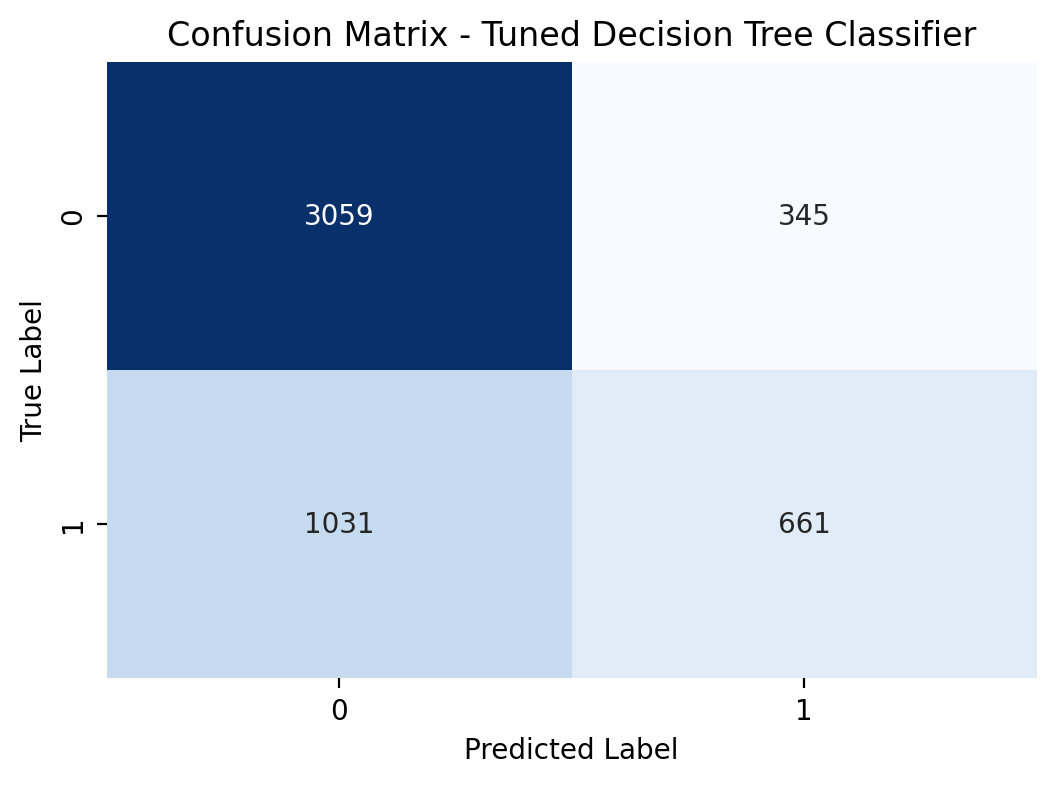

In [196]:
cm = confusion_matrix(y_test, Tuned_DTC_y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Decision Tree Classifier");

In [197]:
feature_importances = best_model.feature_importances_

Text(0.5, 1.0, 'Feature Importance for Tuned Random Forest Classifier')

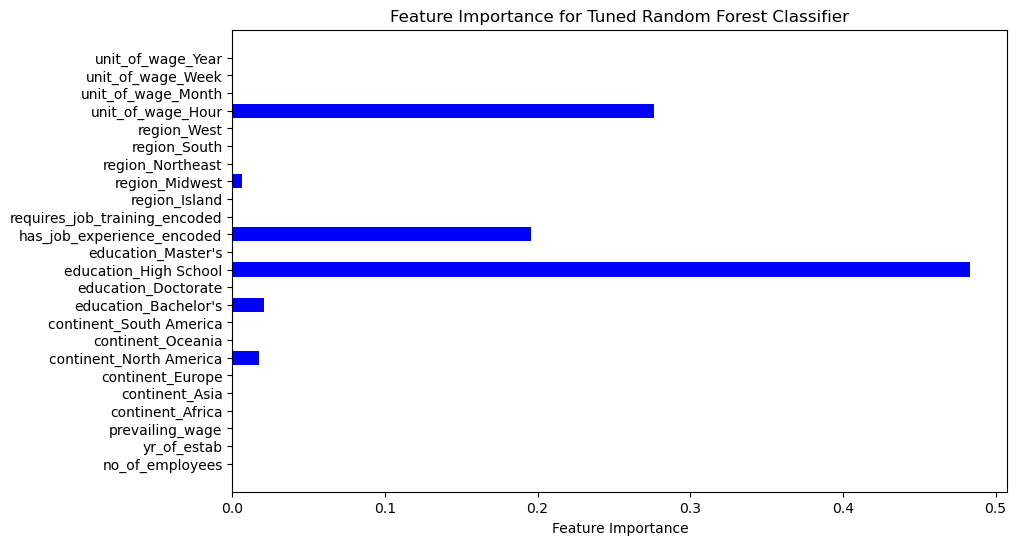

In [198]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Tuned Random Forest Classifier')

### Tuned XGBoost Classifier

In [200]:
X = xgb_df.drop('case_status_encoded', axis=1)
y = xgb_df['case_status_encoded']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63, stratify=y, shuffle=True)

In [202]:
Tuned_XGB_class = XGBClassifier(random_state=11)
Tuned_XGB_Model = XGB_class.fit(X_train, y_train)

In [203]:
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }

In [204]:
grid_search = GridSearchCV(estimator=Tuned_XGB_Model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=11, ...),
             param_grid={'gamma': [1, 3], 'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': array([ 50,  75, 100]),
                         'scale_pos_weight': [1, 2, 5],
                         'subsample': [0.7, 0.9]},
             scoring='recall')

In [205]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(best_model)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.06      0.10      3404
           1       0.34      1.00      0.51      1692

    accuracy                           0.37      5096
   macro avg       0.66      0.53      0.31      5096
weighted avg       0.77      0.37      0.24      5096

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
           

In [206]:
get_metrics_score2(Tuned_DTCModel, X_train, X_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.6652276295133438
Recall on training set :  1.0
Recall on test set :  0.49822695035460995
Precision on training set :  1.0
Precision on test set :  0.4958823529411765


In [207]:
Tuned_XGB_y_pred = grid_search.predict(X_test)

In [208]:
feature_importances = best_model.feature_importances_

Text(0.5, 1.0, 'Feature Importance for Tuned XGBoost Classifier')

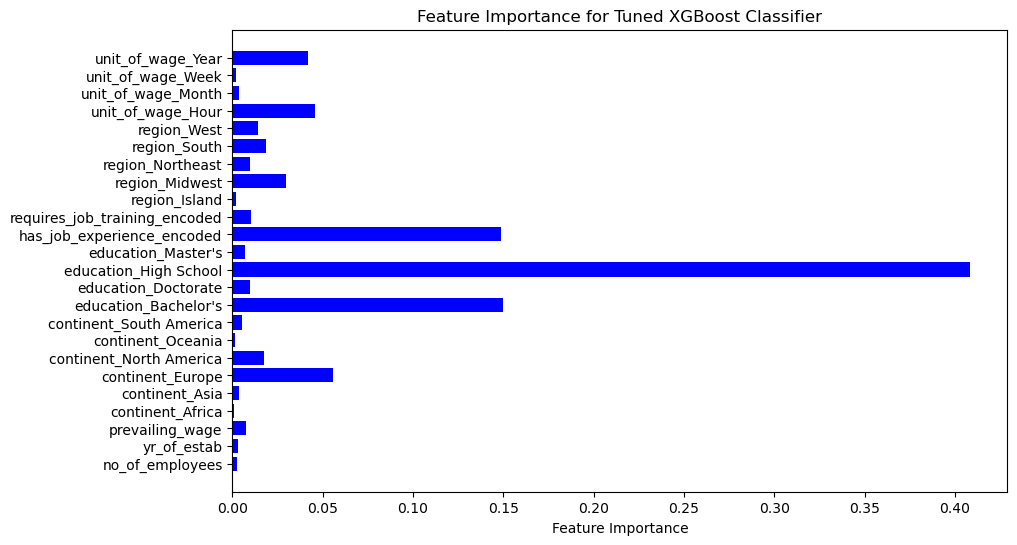

In [209]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Tuned XGBoost Classifier')

## Model Performance Comparison and Conclusions

None of the well, but my best model is the Stacked Claassifier. I thought that tuning the hyperparameters would provide a solid increase in performance. It did not. While there was a reduction in overfiting in some models, the performance of these models do not seem adequate. Also the models with grid search and cross validation took a long time run. 


## Actionable Insights and Recommendations

To screen the applicants, the agency should screen the applicants for further screening by choosing those that match on:
 - Have the required education for the position targeted.
 - Any with no high school education should dropped.
 - Has relevant job should be moved forward.
 - Also companies with a larger number of employees and have been longer established should be given priority

Going forward the agency should collect more data, such as employee performance and other data for future models. 